In [ ]:
# with condition label?
# with publication?
# with spatially variable gene annotation?
# with replicate?
# with cell annotation (each experiment)


# num_features vs num_spots color: biotech type/biotech category
# data sparsity

In [1]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [26]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp2 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
cmp_tissue = palettable.cartocolors.qualitative.Prism_10.mpl_colors
cmp_omics = palettable.colorbrewer.qualitative.Set2_7.mpl_colors
cmp_omics = [cmp_omics[3],cmp_omics[4],cmp_omics[0],cmp_omics[1],cmp_omics[2]]
cmp_biotech = palettable.colorbrewer.qualitative.Pastel1_9.mpl_colors
# trans_color = cmp_omics[2]
cmp_tf = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
# prote_color = cmp_omics[3]

In [3]:
df = pd.read_feather('data.feather')

In [12]:
df

ID                              Name Biotech_ID Dataset_ID  \
0        0         GSM4202309_0719aL_protein         22         76   
1        1      GSM4202310_0725e10aL_protein         22         76   
2        2                    E11_lower_body         22         76   
3        3               E10_whole_gene_best         22         76   
4        4                E10_eye_and_nearby         22         76   
...    ...                               ...        ...        ...   
2179  2179  H20.30.001.STG.250.unexpand.rep1          3         92   
2180  2180   H22.26.401.MTG.4000.expand.rep2          3         92   
2181  2181  H22.26.401.MTG.250.unexpand.rep1          3         92   
2182  2182   mouse1.AUD_TEA_VIS.242.unexpand          3         92   
2183  2183   H20.30.001.STG.4000.expand.rep3          3         92   

                                              H5ad_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
...                                                 ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   

                                          GeneList_Path Histology_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
...                                                 ...            ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   

     Species  Tissue N_Unit N_Gene Zip_Path with_control with_replicate  \
0      MOUSE  EMBRYO   2500     22     None            0              1   
1      MOUSE  EMBRYO    936     22     None            0              1   
2      MOUSE  EMBRYO   1662  21890     None            0              1   
3      MOUSE  EMBRYO    936  22802     None            0              1   
4      MOUSE  EMBRYO   2500  22969     None            0              1   
...      ...     ...    ...    ...      ...          ...            ...   
2179   HUMAN  CORTEX  14174    250     None            1              1   
2180   HUMAN  CORTEX   3512   4000     None            1              1   
2181   HUMAN  CORTEX   5891    250     None            1              1   
2182   MOUSE  CORTEX  13222    242     None            1              1   
2183   HUMAN  CORTEX   3918   4000     None            1              1   

     with_annotation with_publication biotech_name             biotech_type  \
0                  0                1     DBiT-seq       Spatial MultiOmics   
1                  0                1     DBiT-seq       Spatial MultiOmics   
2                  0                1     DBiT-seq       Spatial MultiOmics   
3                  0                1     DBiT-seq       Spatial MultiOmics   
4                  0                1     DBiT-seq       Spatial MultiOmics   
...              ...              ...          ...                      ...   
2179               0                1      MERFISH  Spatial Transcriptomics   
2180               0                

In [29]:
labels

array(['ARABIDOPSIS', 'CELL LINE', 'CHICKEN', 'DROSOPHILA', 'HUMAN',
       'MOUSE', 'NONE', 'ZEBRAFISH'], dtype=object)

## Species

In [30]:
labels

['MOUSE',
 'HUMAN',
 'CHICKEN',
 'ZEBRAFISH',
 'CELL LINE',
 'ARABIDOPSIS',
 'DROSOPHILA']

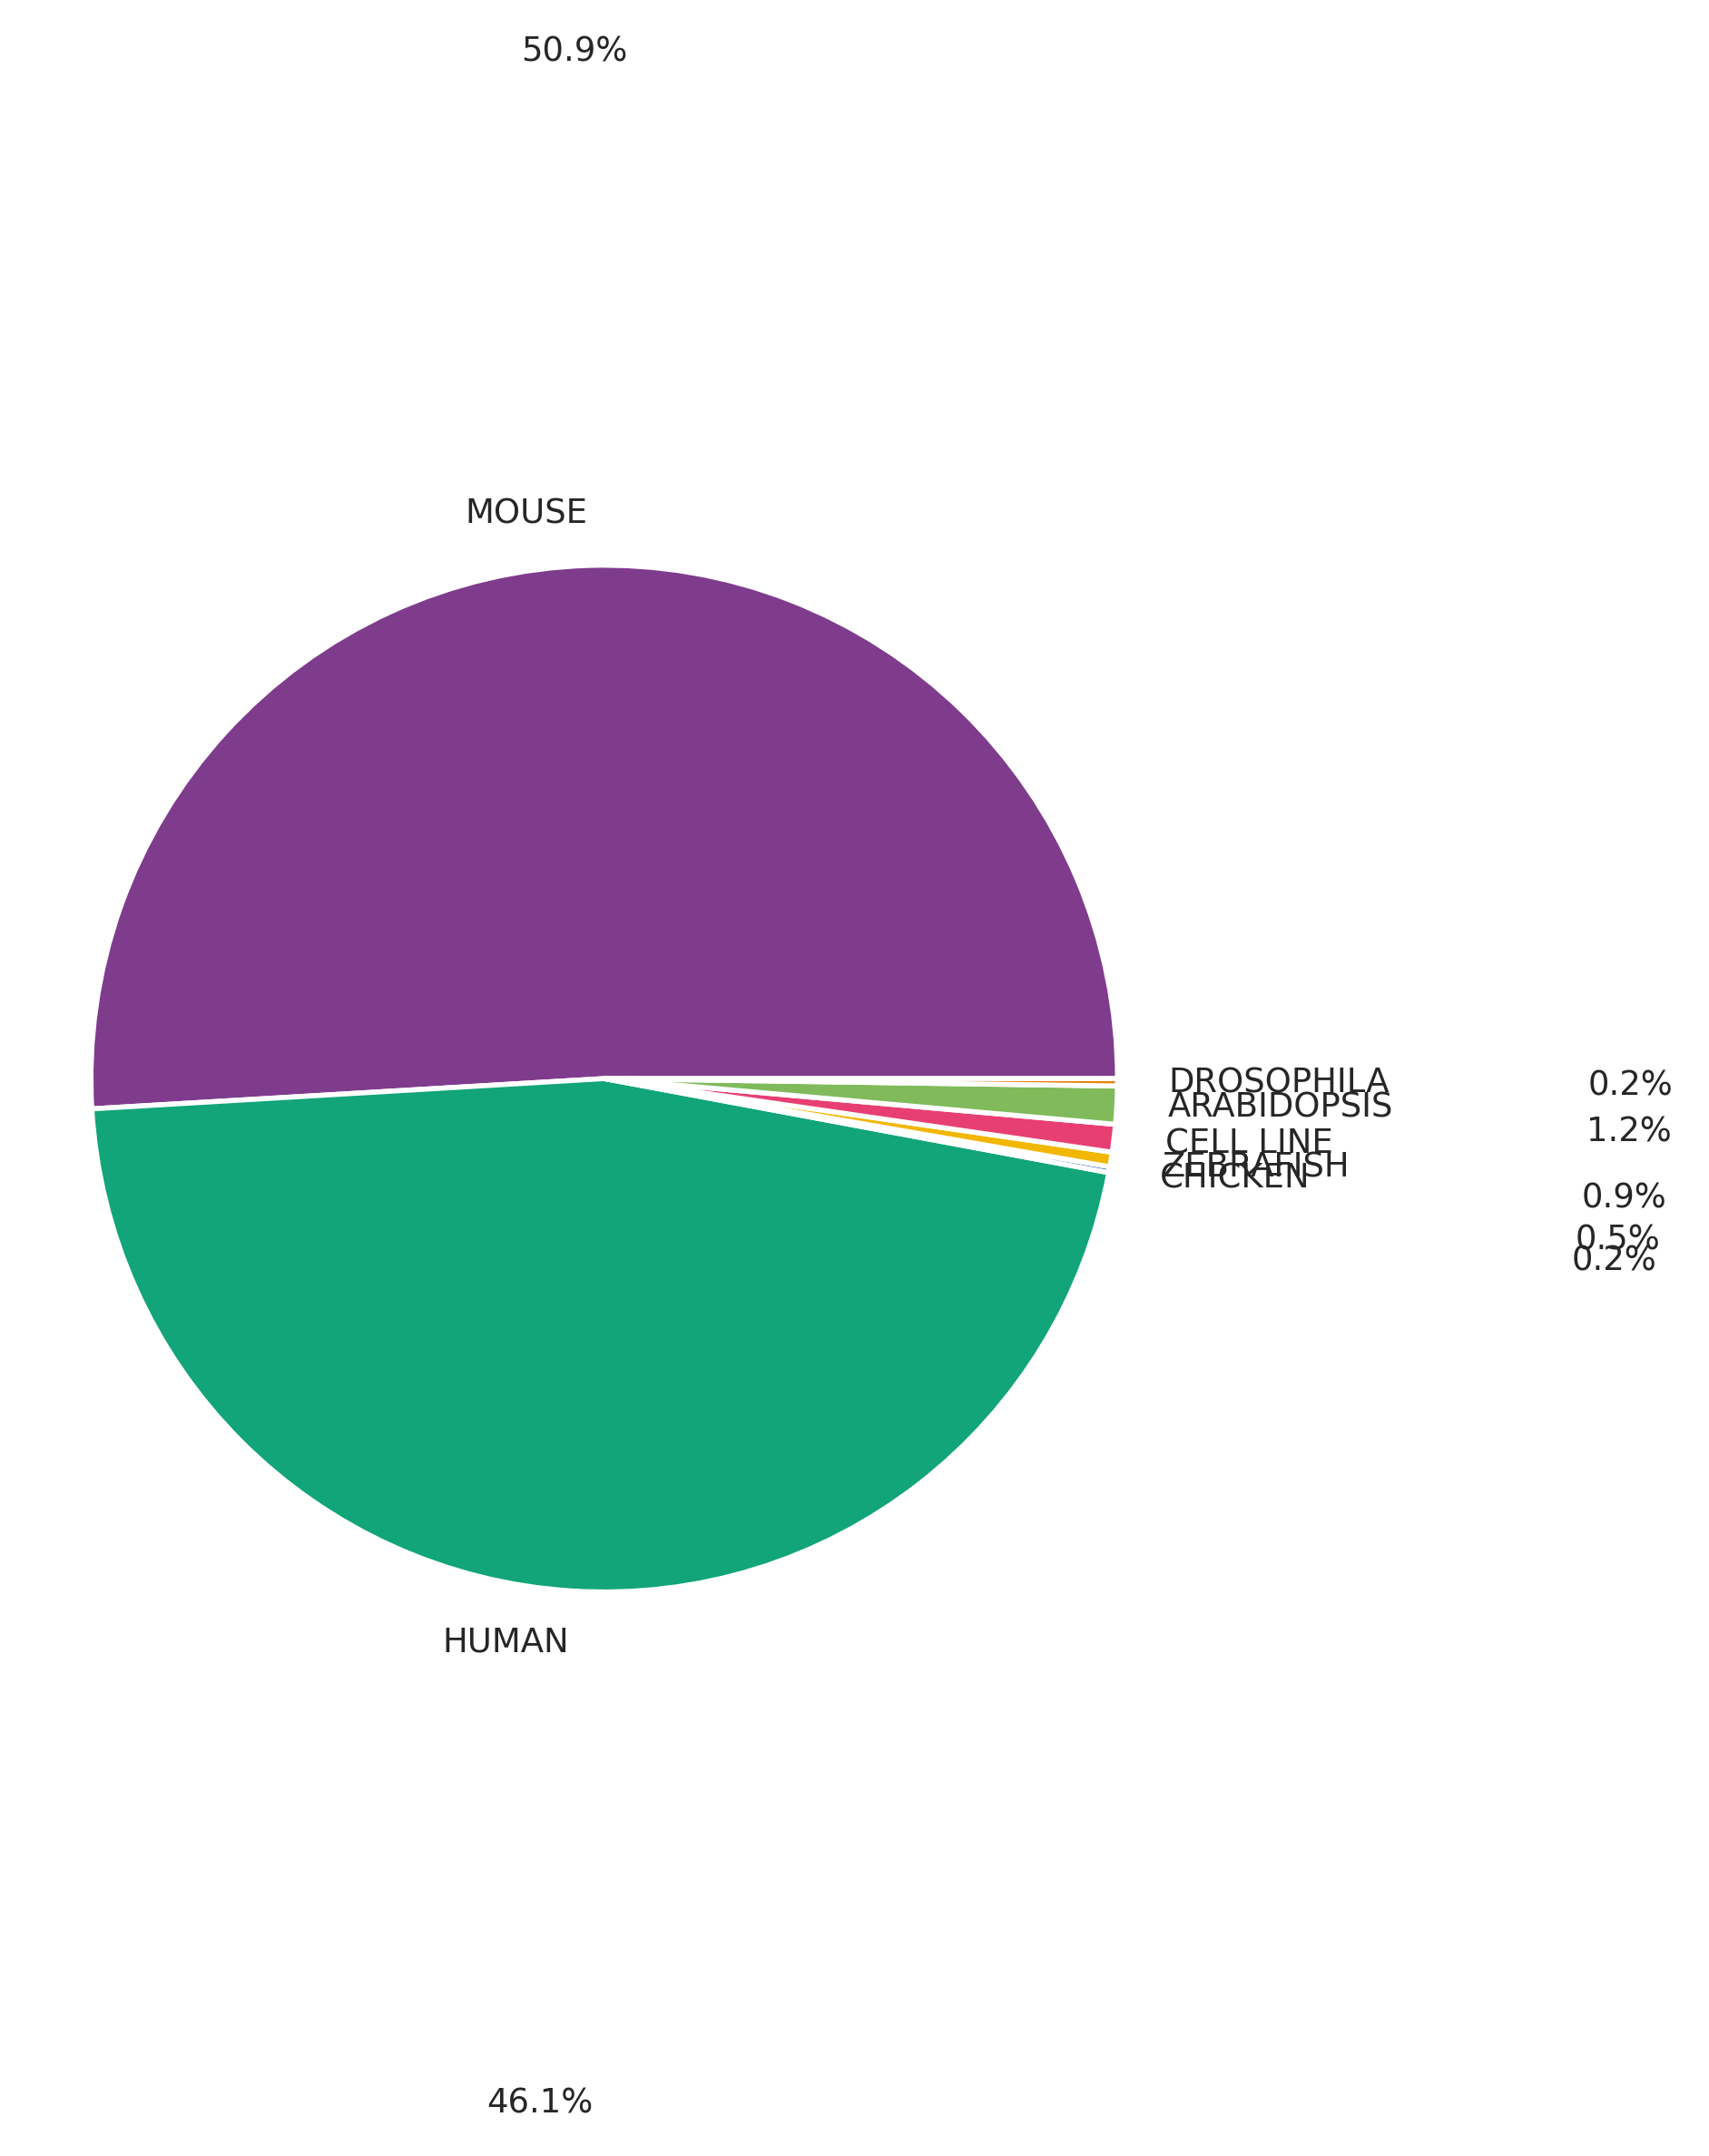

In [29]:
df_feature = 'Species'
labels,sizes = np.unique(df[df_feature],return_counts=1)
labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        pctdistance = 2,
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

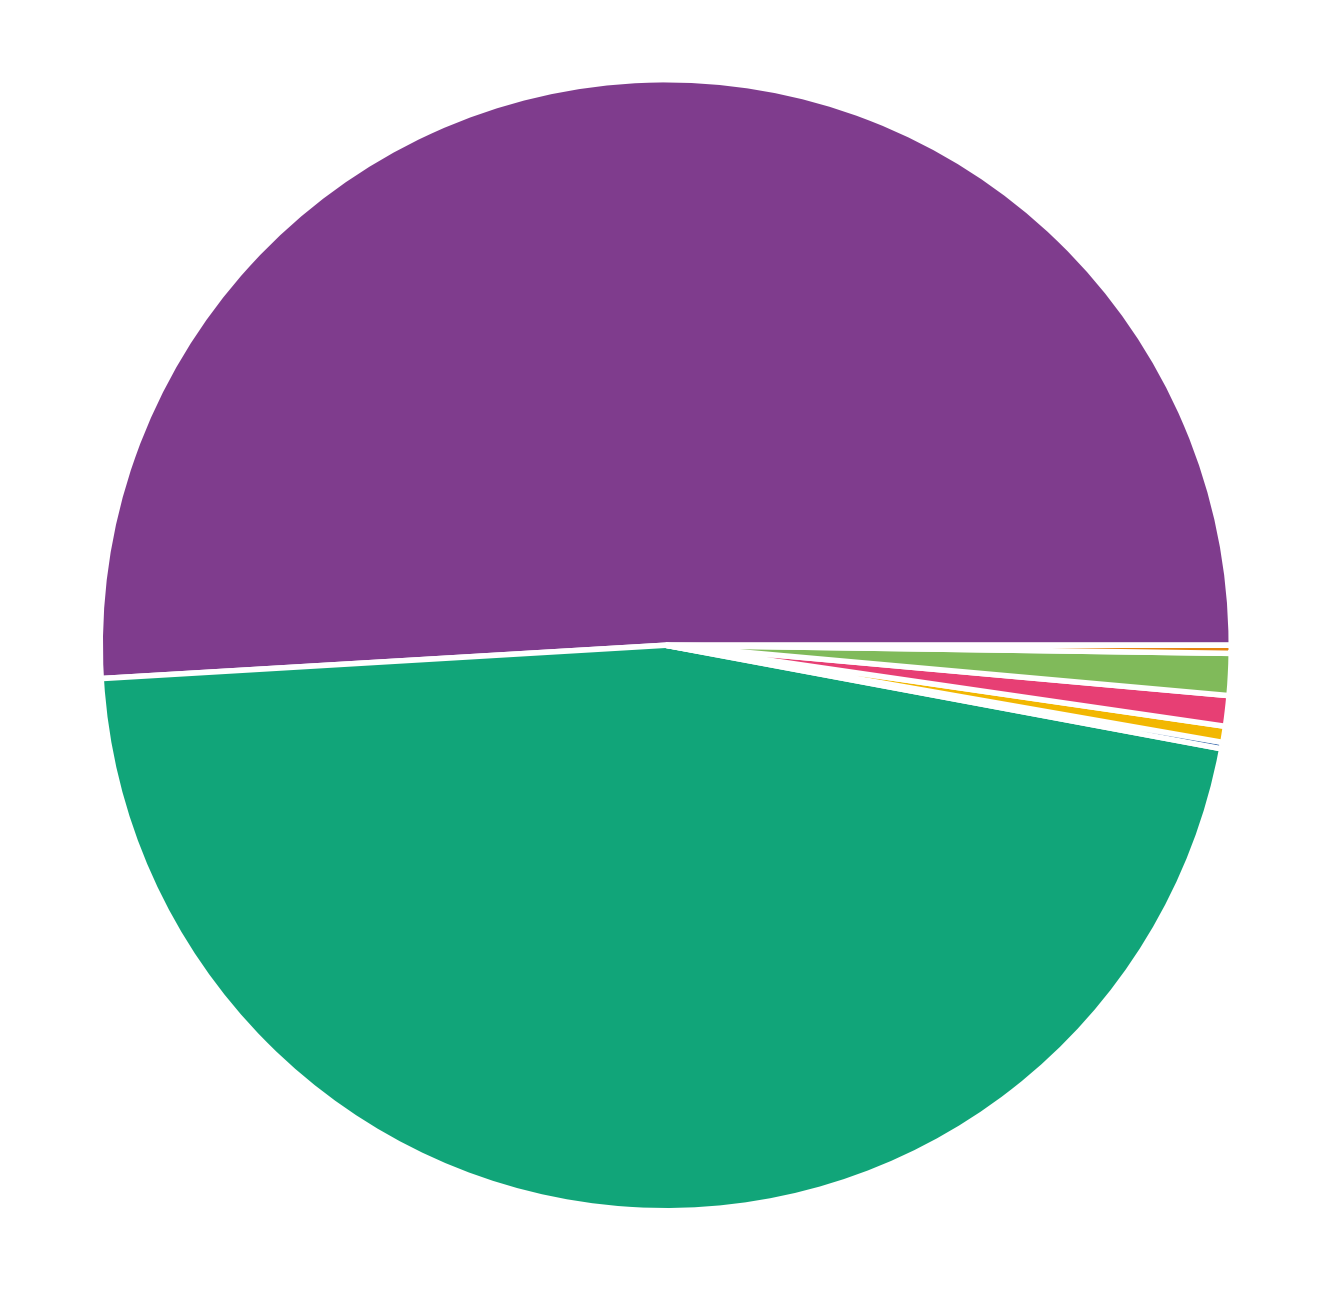

In [161]:
df_feature = 'Species'
labels,sizes = np.unique(df[df_feature],return_counts=1)
labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## with_replicate

In [94]:
df

ID                              Name Biotech_ID Dataset_ID  \
0        0         GSM4202309_0719aL_protein         22         76   
1        1      GSM4202310_0725e10aL_protein         22         76   
2        2                    E11_lower_body         22         76   
3        3               E10_whole_gene_best         22         76   
4        4                E10_eye_and_nearby         22         76   
...    ...                               ...        ...        ...   
2179  2179  H20.30.001.STG.250.unexpand.rep1          3         92   
2180  2180   H22.26.401.MTG.4000.expand.rep2          3         92   
2181  2181  H22.26.401.MTG.250.unexpand.rep1          3         92   
2182  2182   mouse1.AUD_TEA_VIS.242.unexpand          3         92   
2183  2183   H20.30.001.STG.4000.expand.rep3          3         92   

                                              H5ad_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
...                                                 ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   

                                          GeneList_Path Histology_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
...                                                 ...            ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   

     Species  Tissue N_Unit N_Gene Zip_Path with_control with_replicate  \
0      MOUSE  EMBRYO   2500     22     None            0              1   
1      MOUSE  EMBRYO    936     22     None            0              1   
2      MOUSE  EMBRYO   1662  21890     None            0              1   
3      MOUSE  EMBRYO    936  22802     None            0              1   
4      MOUSE  EMBRYO   2500  22969     None            0              1   
...      ...     ...    ...    ...      ...          ...            ...   
2179   HUMAN  CORTEX  14174    250     None            1              1   
2180   HUMAN  CORTEX   3512   4000     None            1              1   
2181   HUMAN  CORTEX   5891    250     None            1              1   
2182   MOUSE  CORTEX  13222    242     None            1              1   
2183   HUMAN  CORTEX   3918   4000     None            1              1   

     with_annotation with_publication biotech_name             biotech_type  \
0                  0                1     DBiT-seq       Spatial MultiOmics   
1                  0                1     DBiT-seq       Spatial MultiOmics   
2                  0                1     DBiT-seq       Spatial MultiOmics   
3                  0                1     DBiT-seq       Spatial MultiOmics   
4                  0                1     DBiT-seq       Spatial MultiOmics   
...              ...              ...          ...                      ...   
2179               0                1      MERFISH  Spatial Transcriptomics   
2180               0                

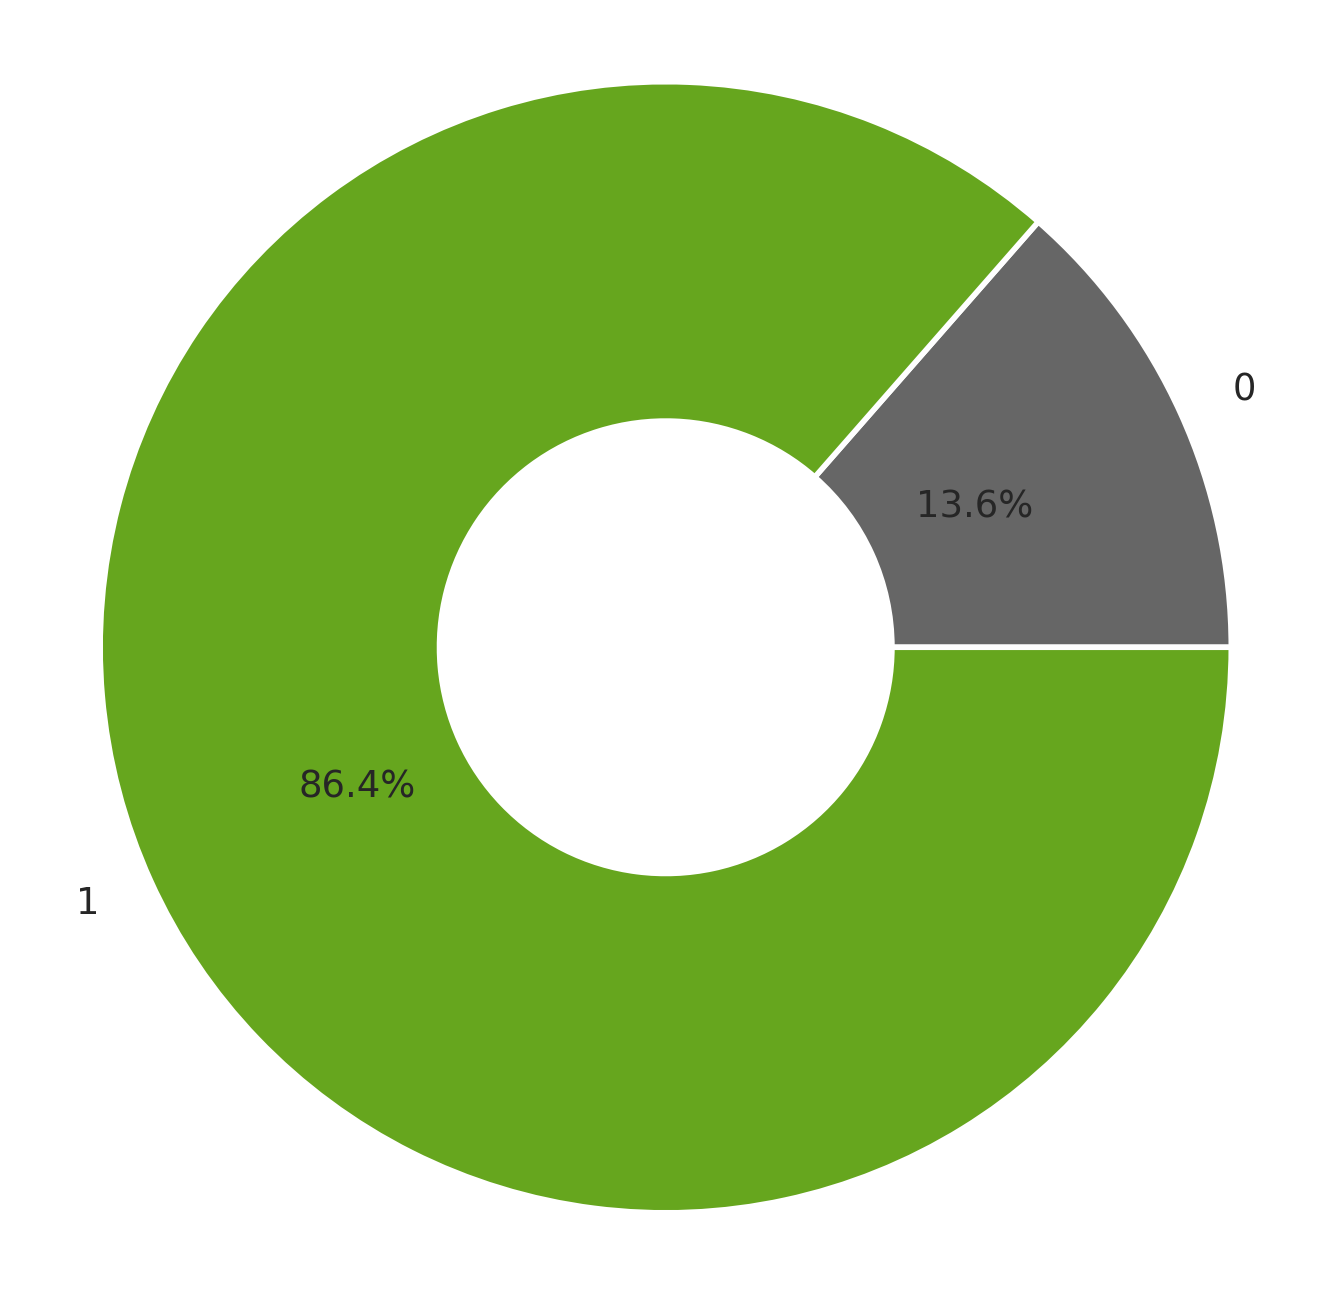

In [95]:
df_feature = 'with_replicate'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[4],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

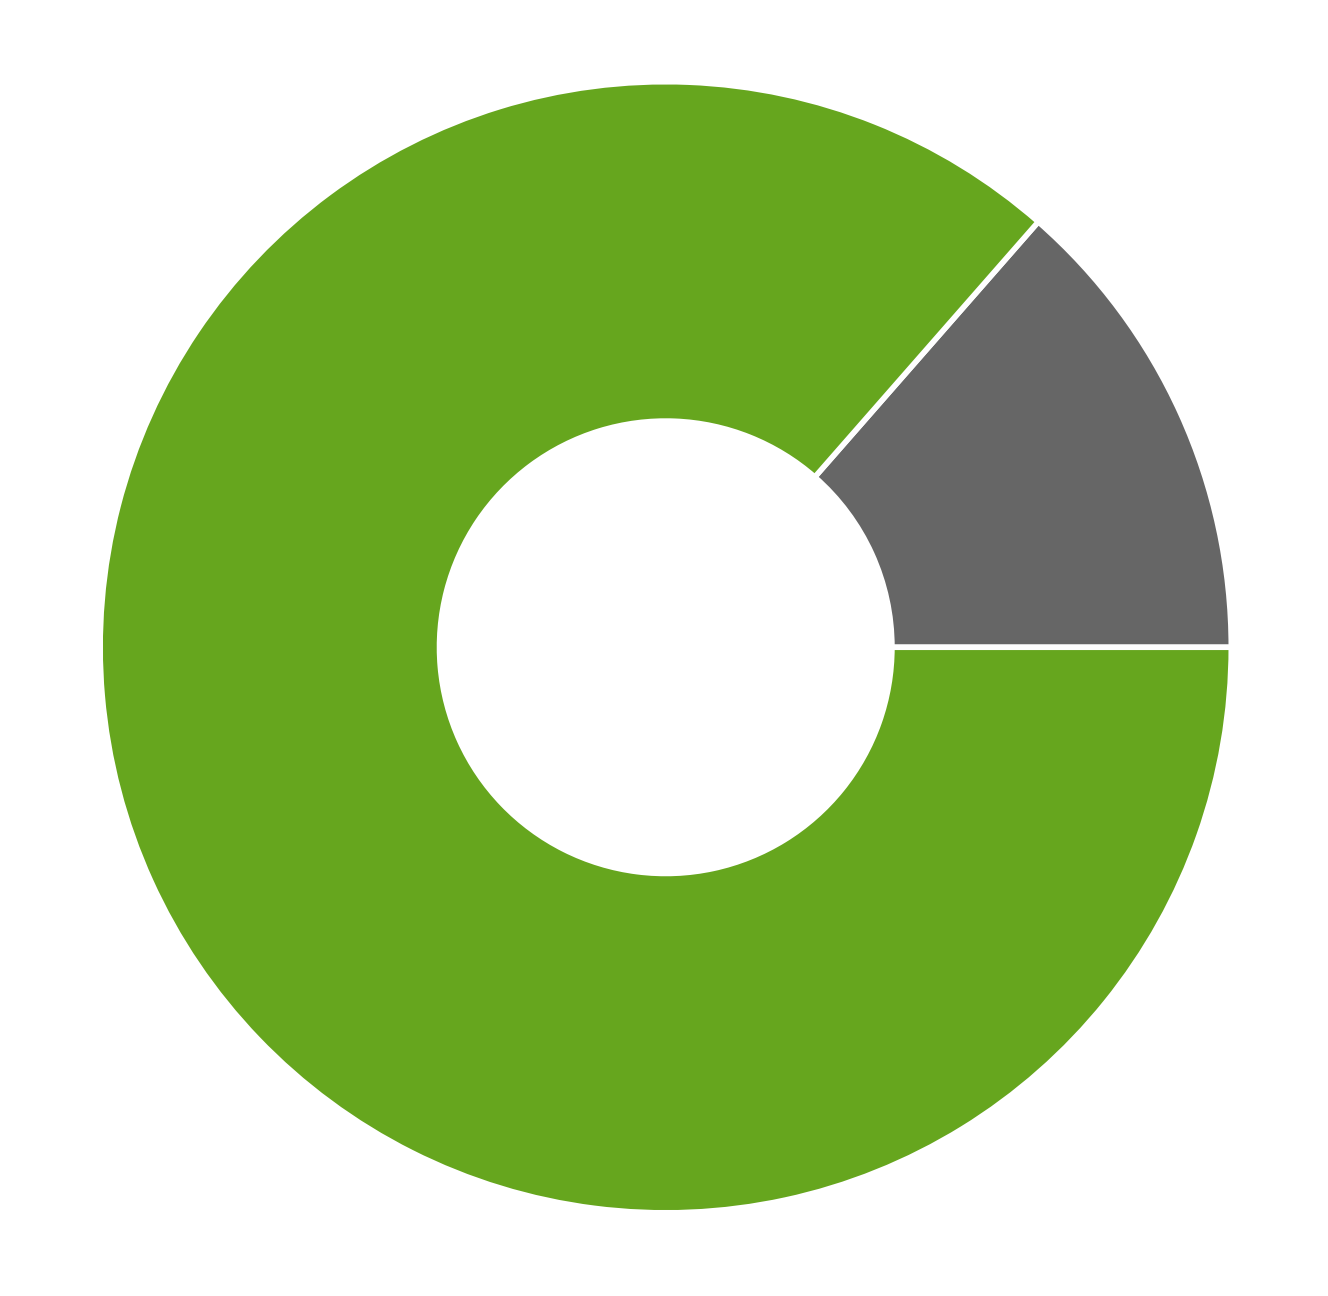

In [97]:
df_feature = 'with_replicate'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[4],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.1f%%',
                                          # textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## with_control

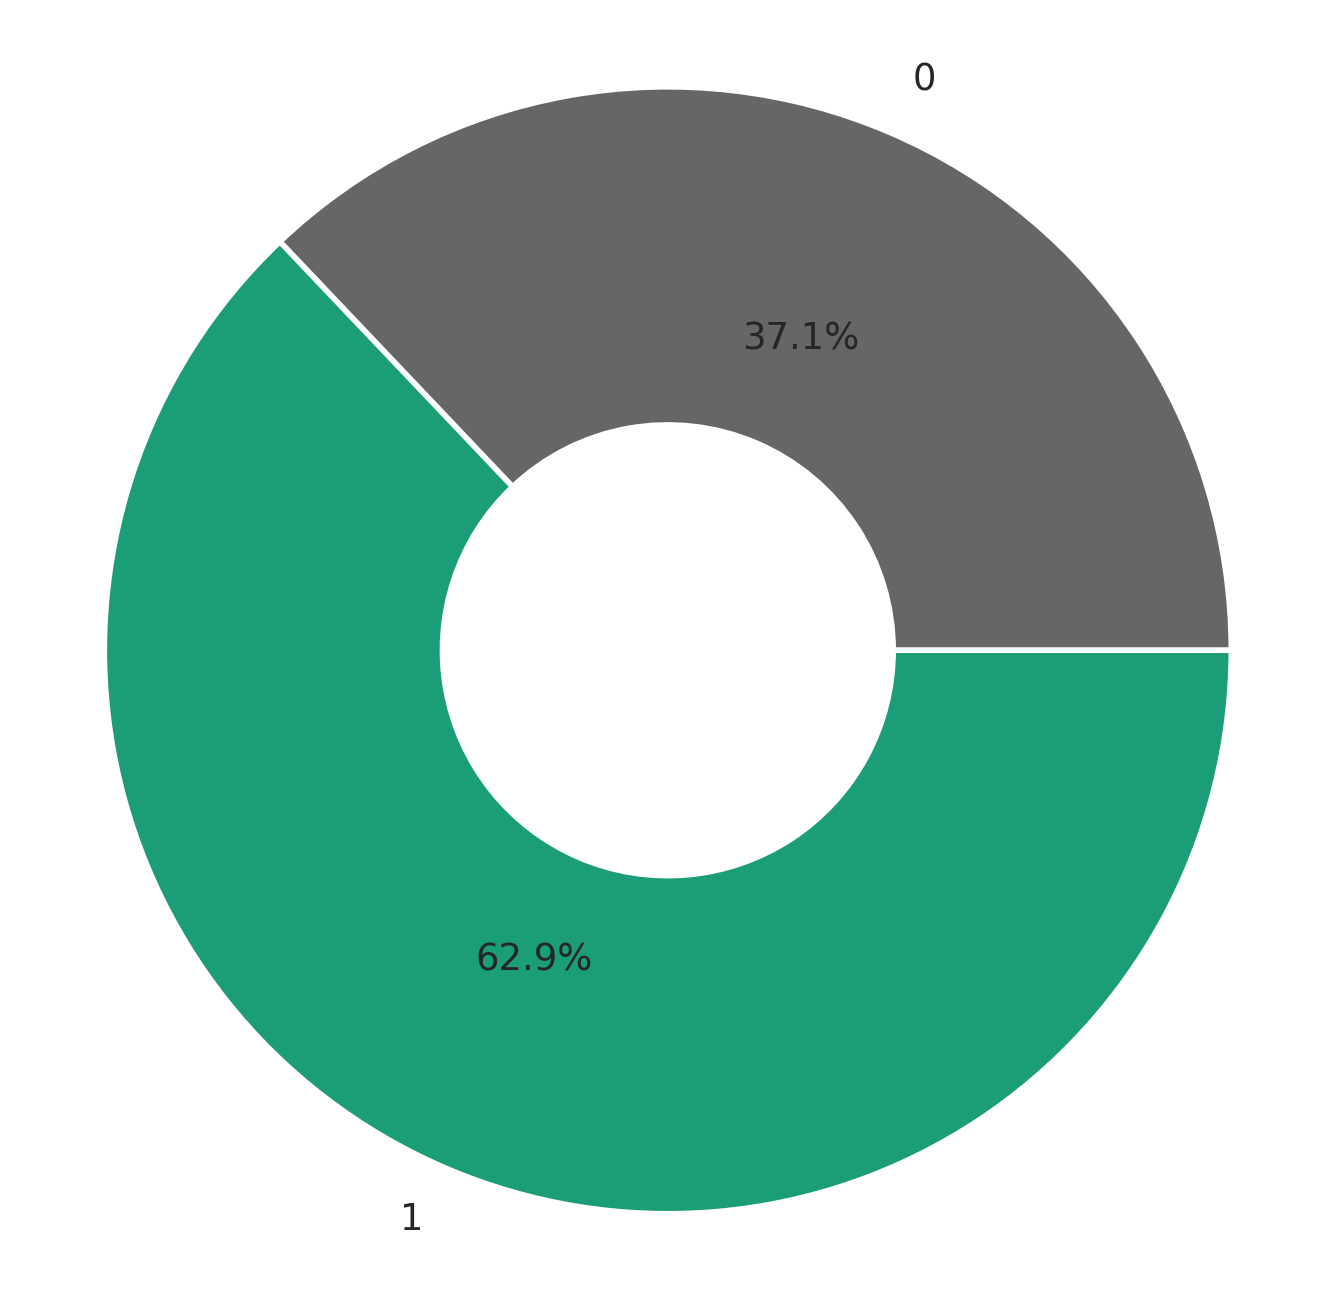

In [37]:
df_feature = 'with_control'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[0],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

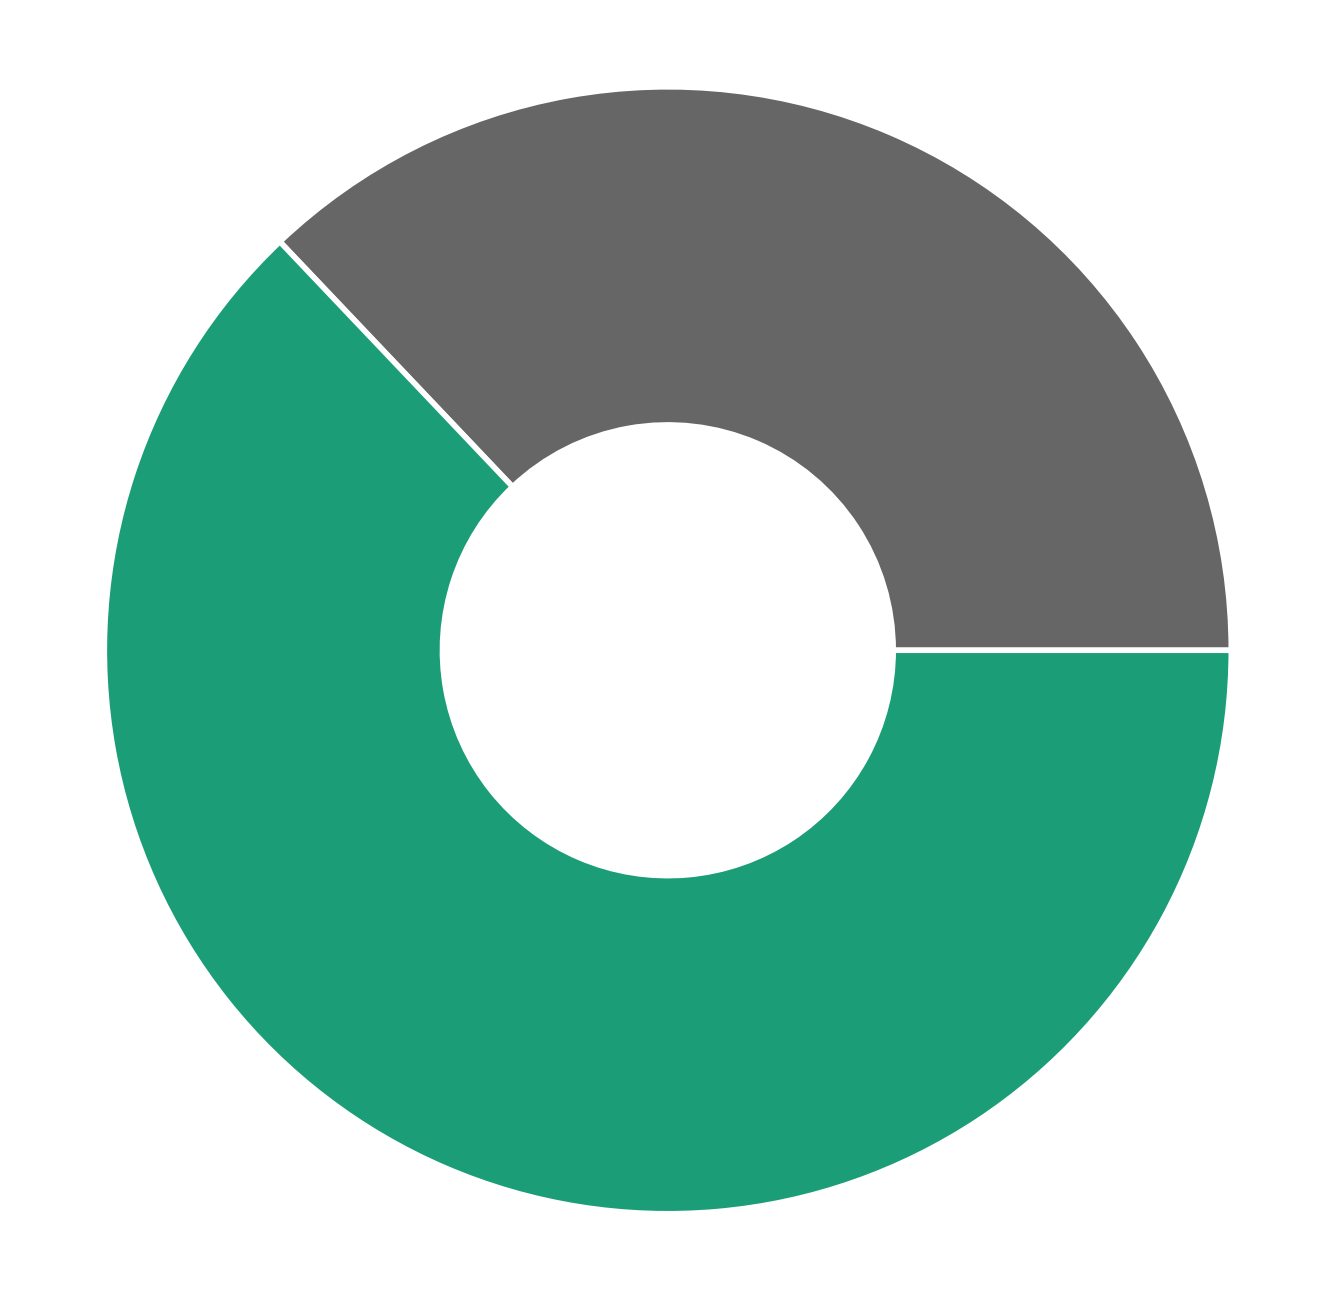

In [163]:
df_feature = 'with_control'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[0],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          # textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## with_annotation

In [51]:
with_replicate,with_annotation,with_publication,with_SEgene_annotation,biotech_type,biotech_name,Tissue

ID                              Name Biotech_ID Dataset_ID  \
0        0         GSM4202309_0719aL_protein         22         76   
1        1      GSM4202310_0725e10aL_protein         22         76   
2        2                    E11_lower_body         22         76   
3        3               E10_whole_gene_best         22         76   
4        4                E10_eye_and_nearby         22         76   
...    ...                               ...        ...        ...   
2179  2179  H20.30.001.STG.250.unexpand.rep1          3         92   
2180  2180   H22.26.401.MTG.4000.expand.rep2          3         92   
2181  2181  H22.26.401.MTG.250.unexpand.rep1          3         92   
2182  2182   mouse1.AUD_TEA_VIS.242.unexpand          3         92   
2183  2183   H20.30.001.STG.4000.expand.rep3          3         92   

                                              H5ad_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
...                                                 ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   

                                          GeneList_Path Histology_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
...                                                 ...            ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   

     Species  Tissue N_Unit N_Gene Zip_Path with_control with_replicate  \
0      MOUSE  EMBRYO   2500     22     None            0              1   
1      MOUSE  EMBRYO    936     22     None            0              1   
2      MOUSE  EMBRYO   1662  21890     None            0              1   
3      MOUSE  EMBRYO    936  22802     None            0              1   
4      MOUSE  EMBRYO   2500  22969     None            0              1   
...      ...     ...    ...    ...      ...          ...            ...   
2179   HUMAN  CORTEX  14174    250     None            1              1   
2180   HUMAN  CORTEX   3512   4000     None            1              1   
2181   HUMAN  CORTEX   5891    250     None            1              1   
2182   MOUSE  CORTEX  13222    242     None            1              1   
2183   HUMAN  CORTEX   3918   4000     None            1              1   

     with_annotation with_publication biotech_name             biotech_type  \
0                  0                1     DBiT-seq       Spatial MultiOmics   
1                  0                1     DBiT-seq       Spatial MultiOmics   
2                  0                1     DBiT-seq       Spatial MultiOmics   
3                  0                1     DBiT-seq       Spatial MultiOmics   
4                  0                1     DBiT-seq       Spatial MultiOmics   
...              ...              ...          ...                      ...   
2179               0                1      MERFISH  Spatial Transcriptomics   
2180               0                

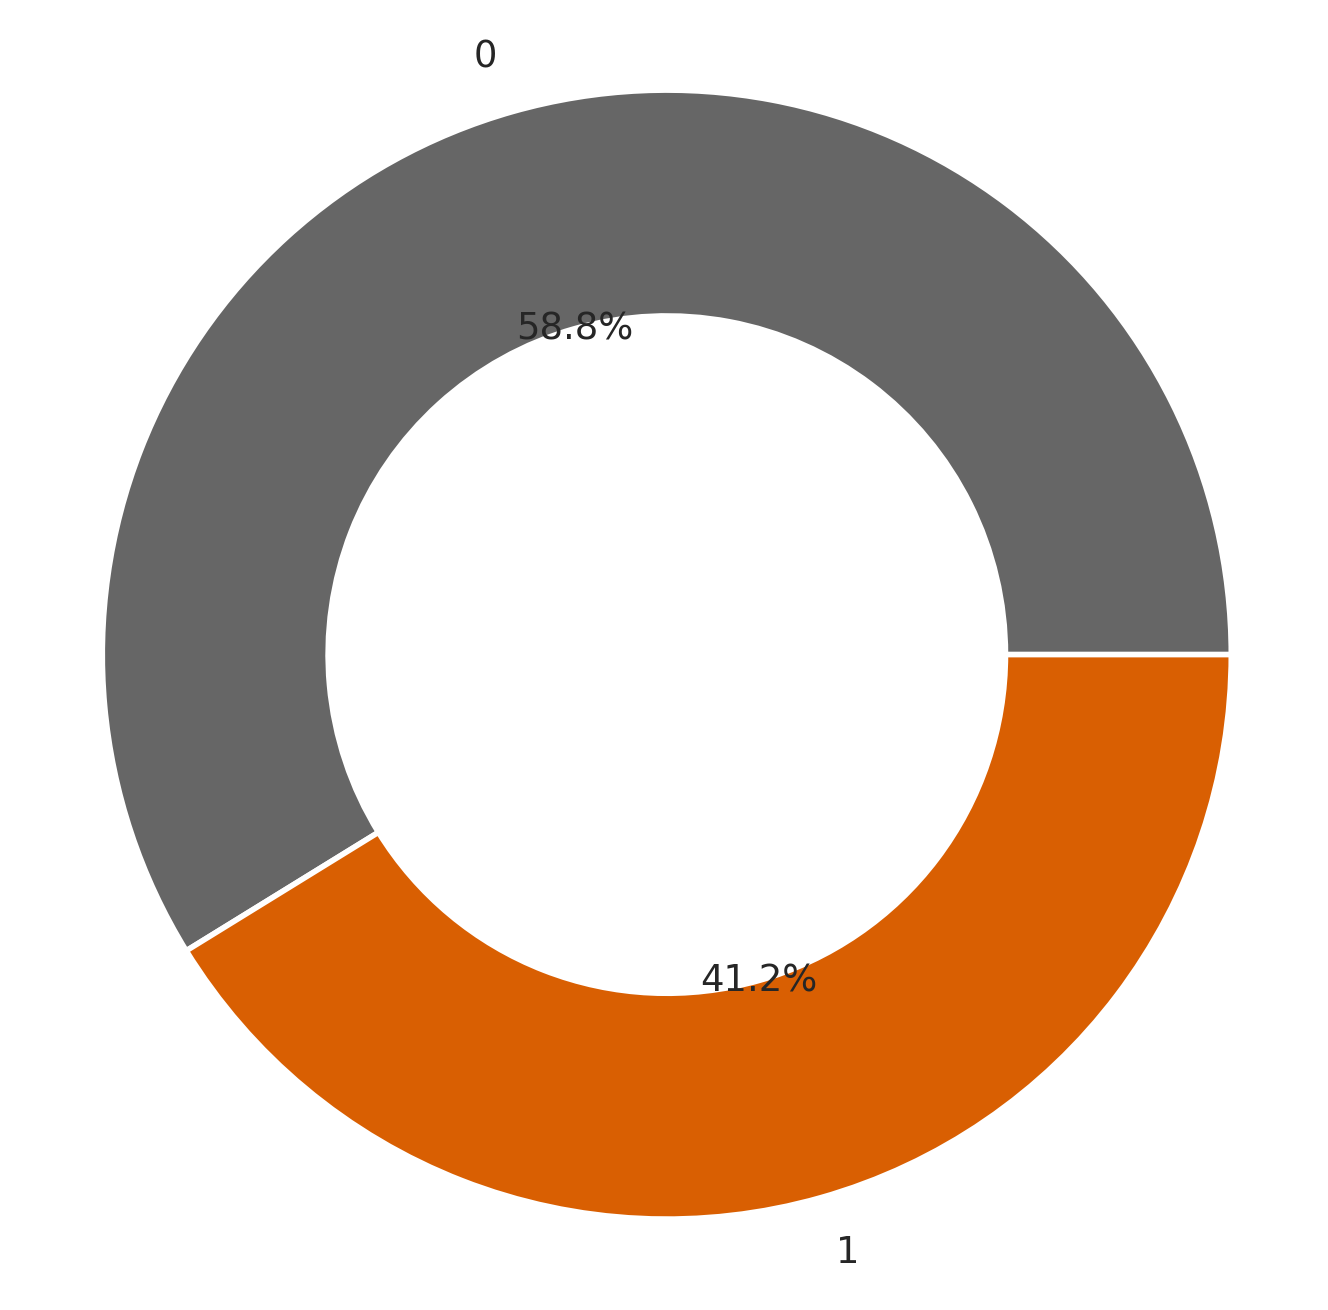

In [38]:
df_feature = 'with_annotation'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[1],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.2, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

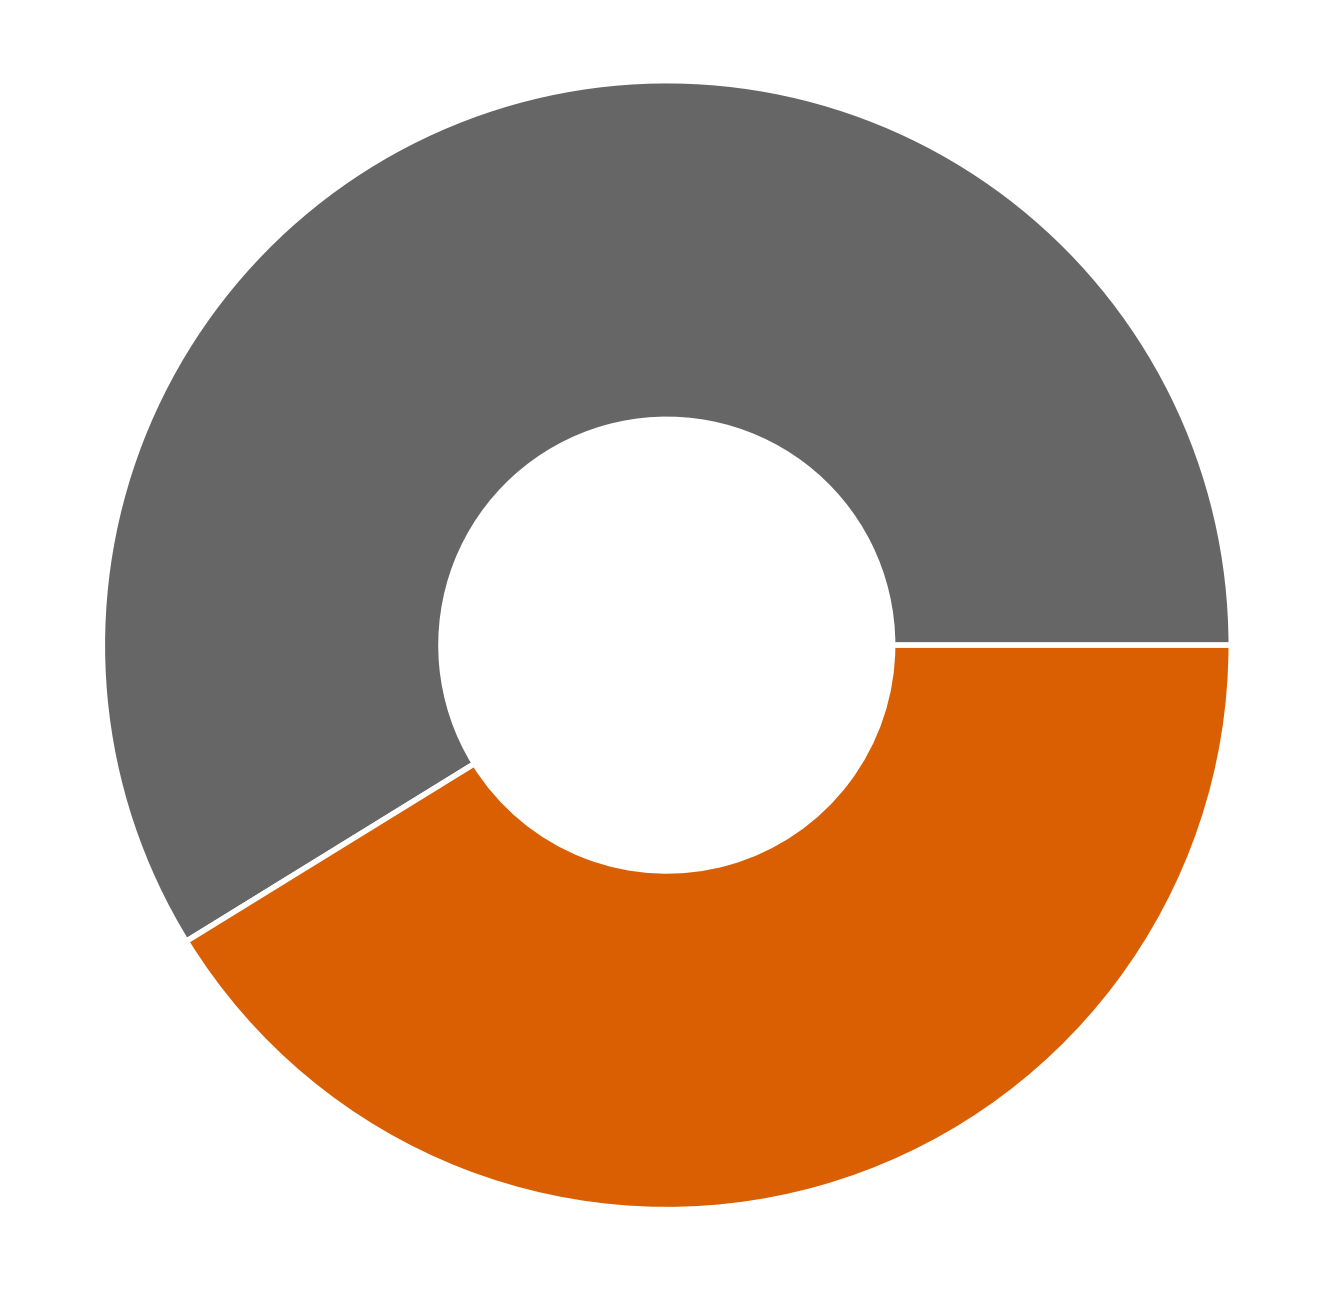

In [164]:
df_feature = 'with_annotation'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[1],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          # textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# with_publication

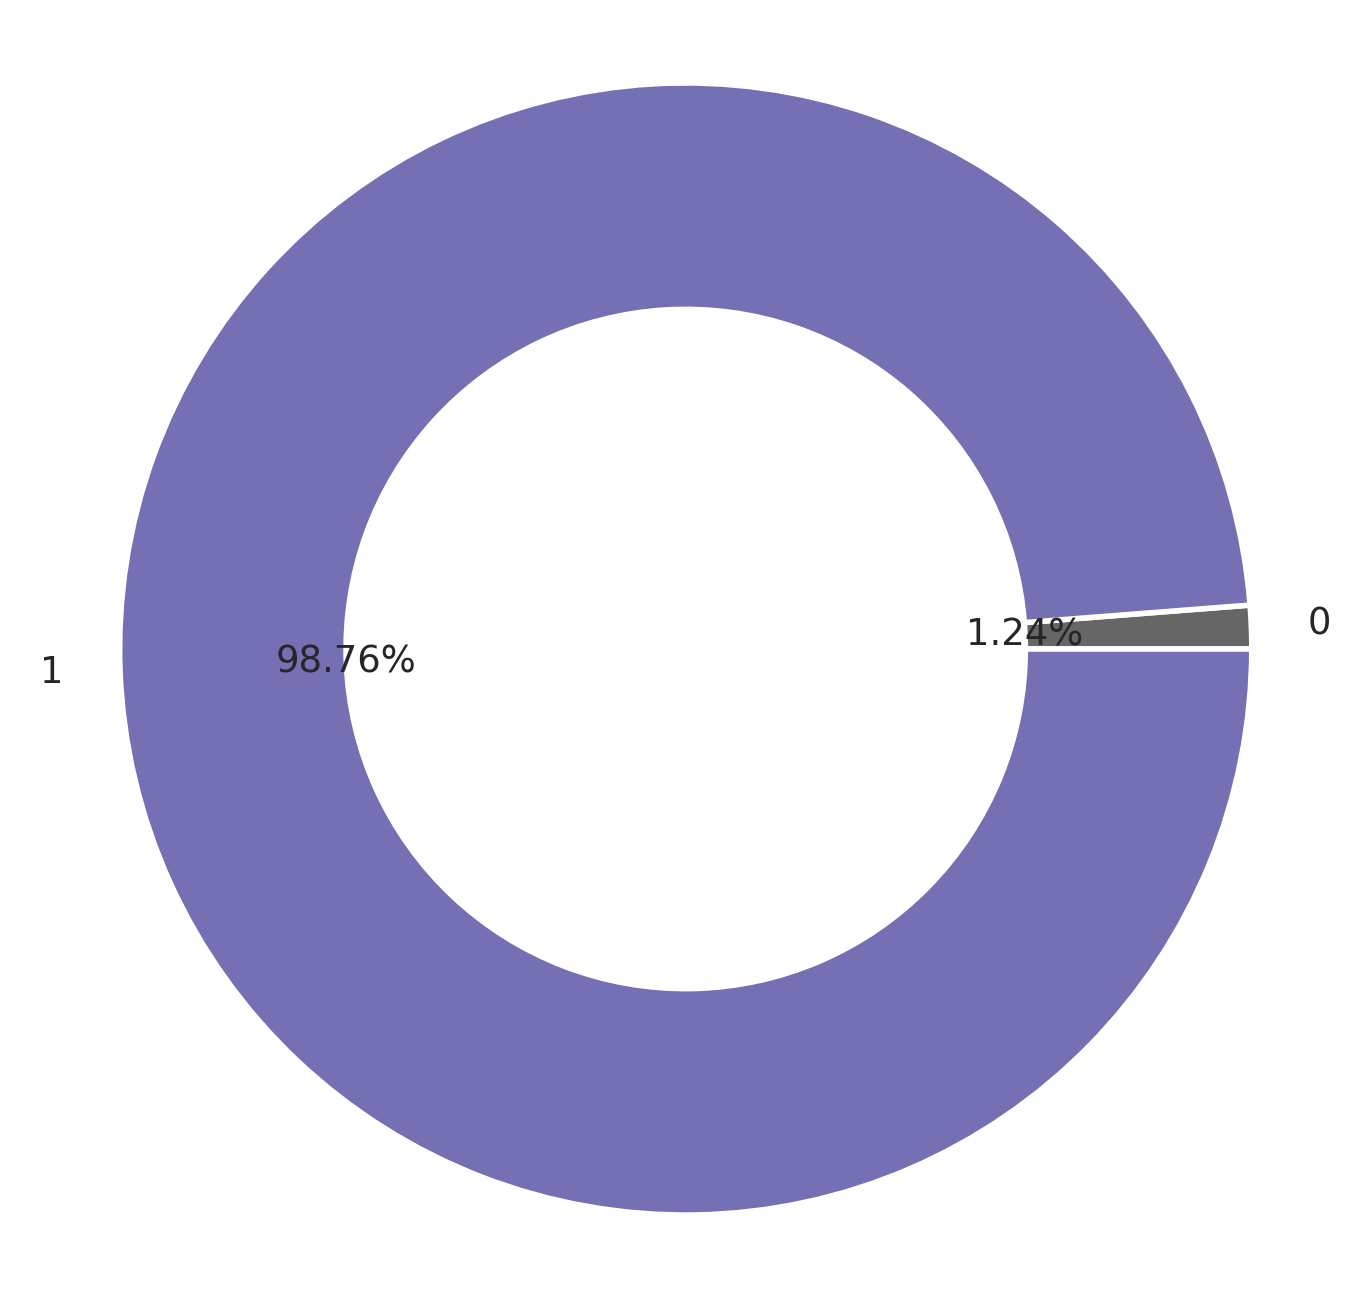

In [67]:
df_feature = 'with_publication'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[2],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.2f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.2, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

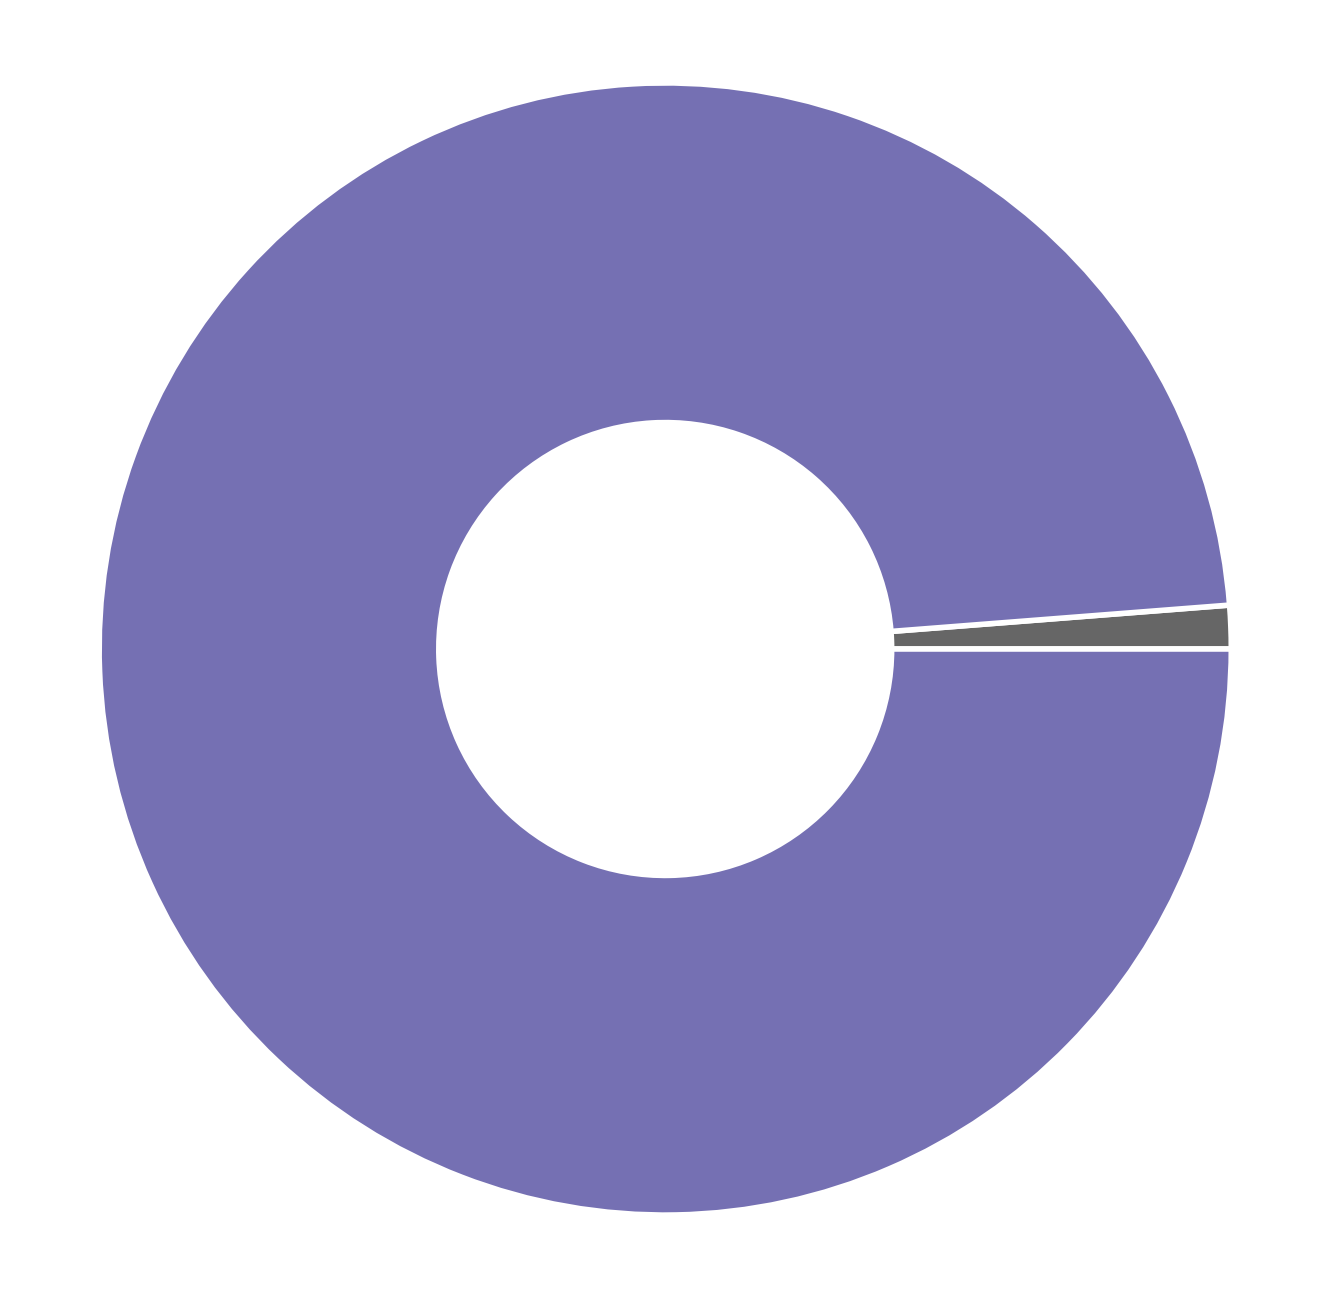

In [165]:
df_feature = 'with_publication'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[2],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          # textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## with_SEgene_annotation

In [39]:
1+1

2

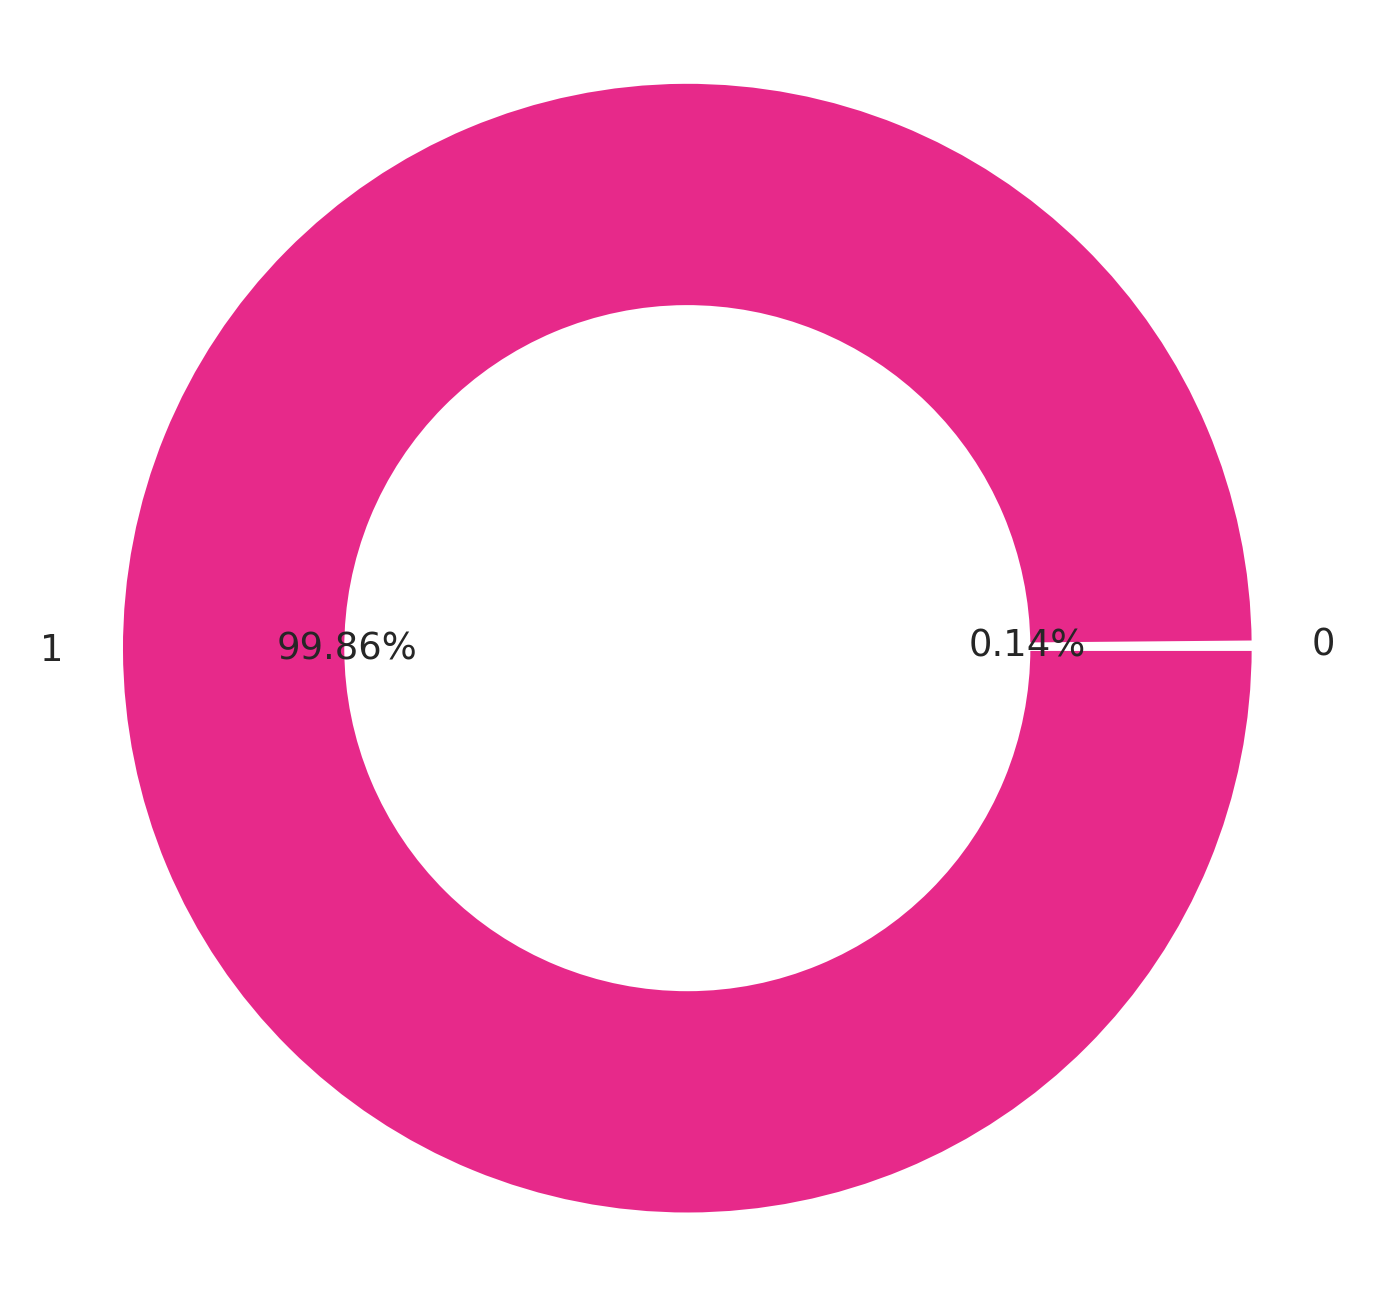

In [68]:
df_feature = 'with_SEgene_annotation'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[3],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.2f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.2, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [63]:
sizes[0]/np.sum(sizes)*100

0.13736263736263737

In [64]:
sizes[1]/np.sum(sizes)*100

99.86263736263736

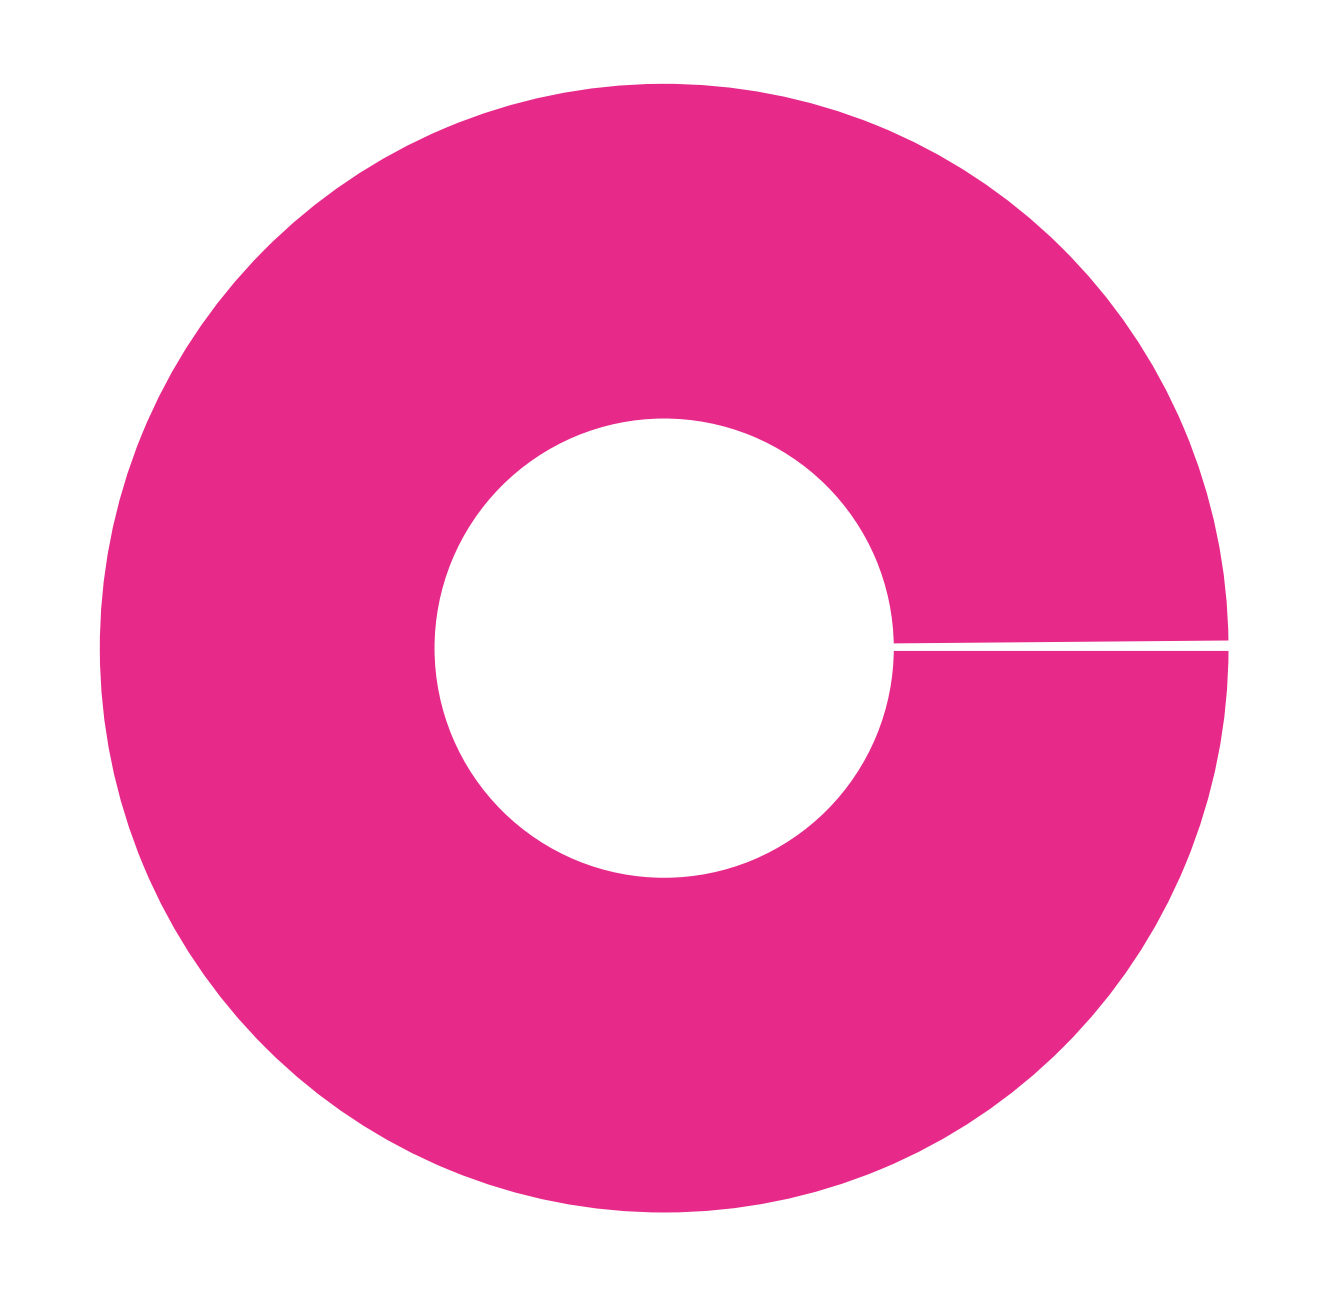

In [166]:
df_feature = 'with_SEgene_annotation'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[3],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          # textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Tissue

In [ ]:
with_replicate,with_annotation,with_publication,with_SEgene_annotation,biotech_type,biotech_name,Tissue

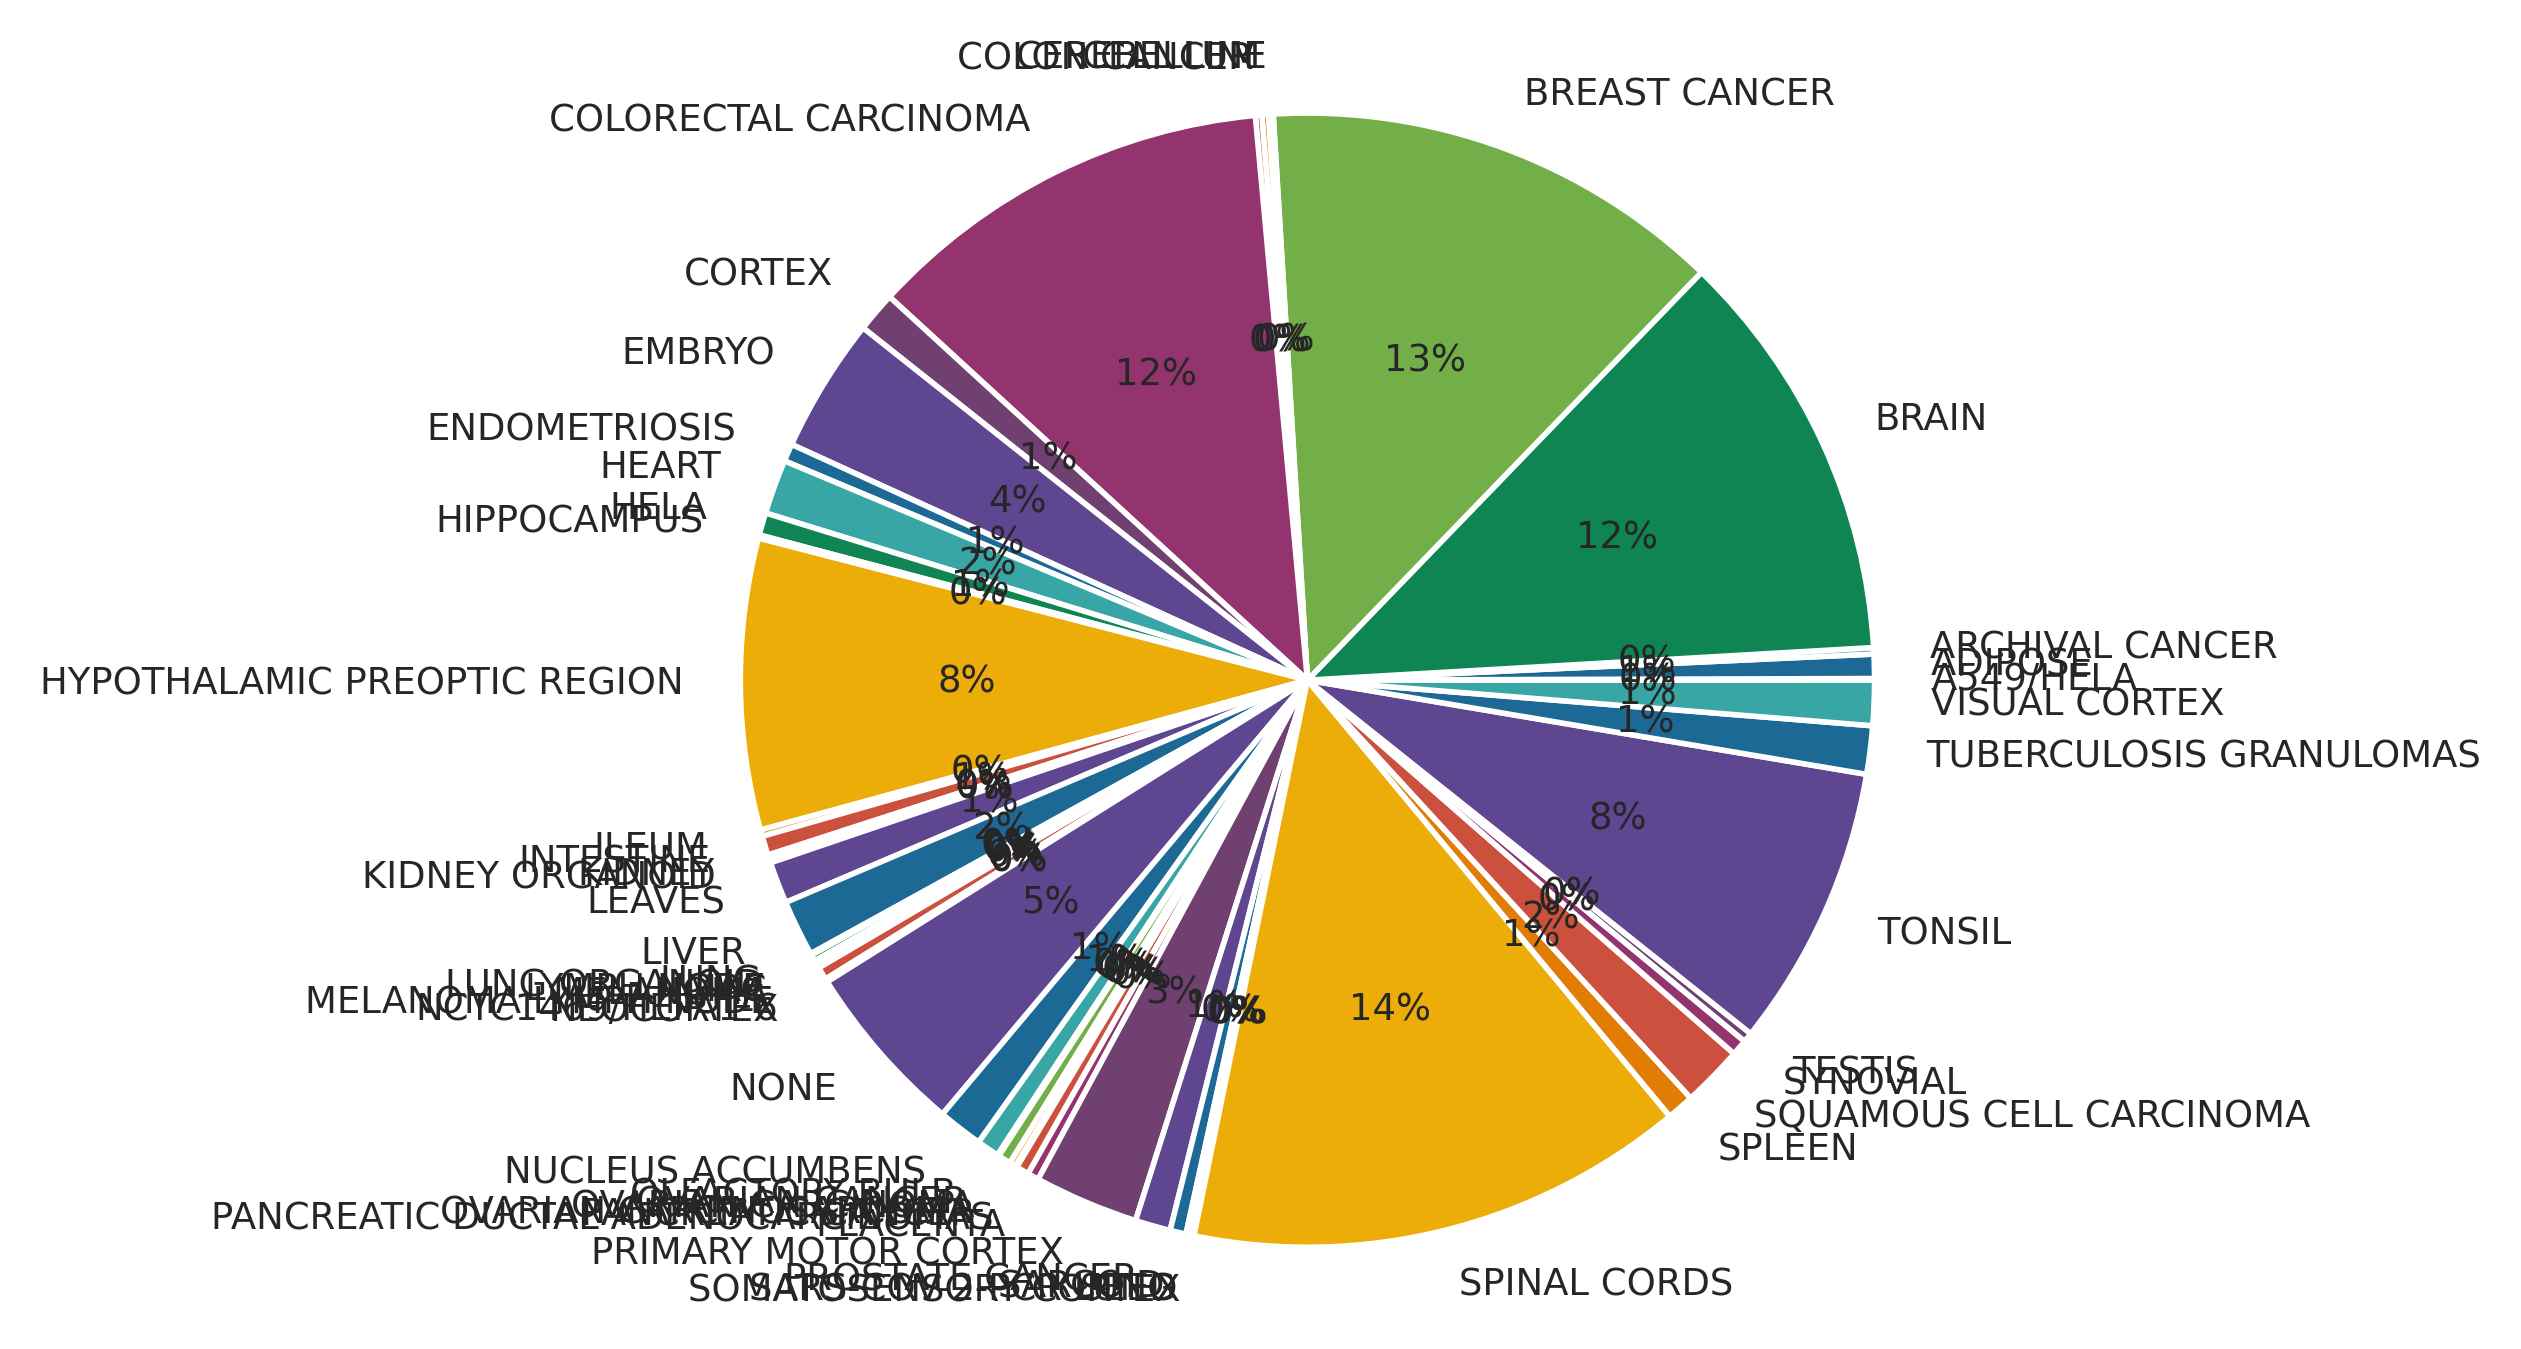

In [34]:
df_feature = 'Tissue'
labels,sizes = np.unique(df[df_feature],return_counts=1)
cmp = cmp_tissue
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        # wedgeprops=dict(width=0.2, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [17]:
for i in range(10):
    print(f'a:{i}')

a:0
a:1
a:2
a:3
a:4
a:5
a:6
a:7
a:8
a:9


In [31]:
a = 'A549/HELA'

In [36]:
for i in range(len(labels)):
    cur_label = labels[i]
    if cur_label=='NONE':
        cur_label = 'Other'
    if cur_label=='HELA':
        cur_label = 'Cell line'
    print(f'{cur_label.title()}:{sizes[i]}')

A549/Hela:1
Adipose:15
Archival Cancer:4
Brain:259
Breast Cancer:288
Cell Line:3
Cerebellum:4
Colon Cancer:4
Colorectal Carcinoma:256
Cortex:25
Embryo:84
Endometriosis:11
Heart:34
Cell Line:14
Hippocampus:2
Hypothalamic Preoptic Region:181
Ileum:4
Intestine:12
Kidney:2
Kidney Organoid:3
Leaves:26
Liver:35
Lung:1
Lung Organoid:4
Lymph Node:1
Mac:1
Melanoma:3
Melanoma Lymph Node:8
Nctc1469/Hepa1-6:1
Neocortex:1
Other:108
Nucleus Accumbens:28
Olfactory Bulb:14
Ovarian Cancer:1
Ovarian Carcinoma:8
Ovarian Carcinosarcoma :4
Pancreatic Cancer :1
Pancreatic Ductal Adenocarcinomas:8
Placenta:7
Primary Motor Cortex:65
Prostate Cancer:22
Sarcoid:10
Sars-Cov-2-Pcr Lung:2
Seed:1
Somatosensory Cortex:2
Spinal Cords :311
Spleen:17
Squamous Cell Carcinoma:38
Synovial:10
Testis:6
Tonsil:176
Tuberculosis Granulomas:30
Visual Cortex:28


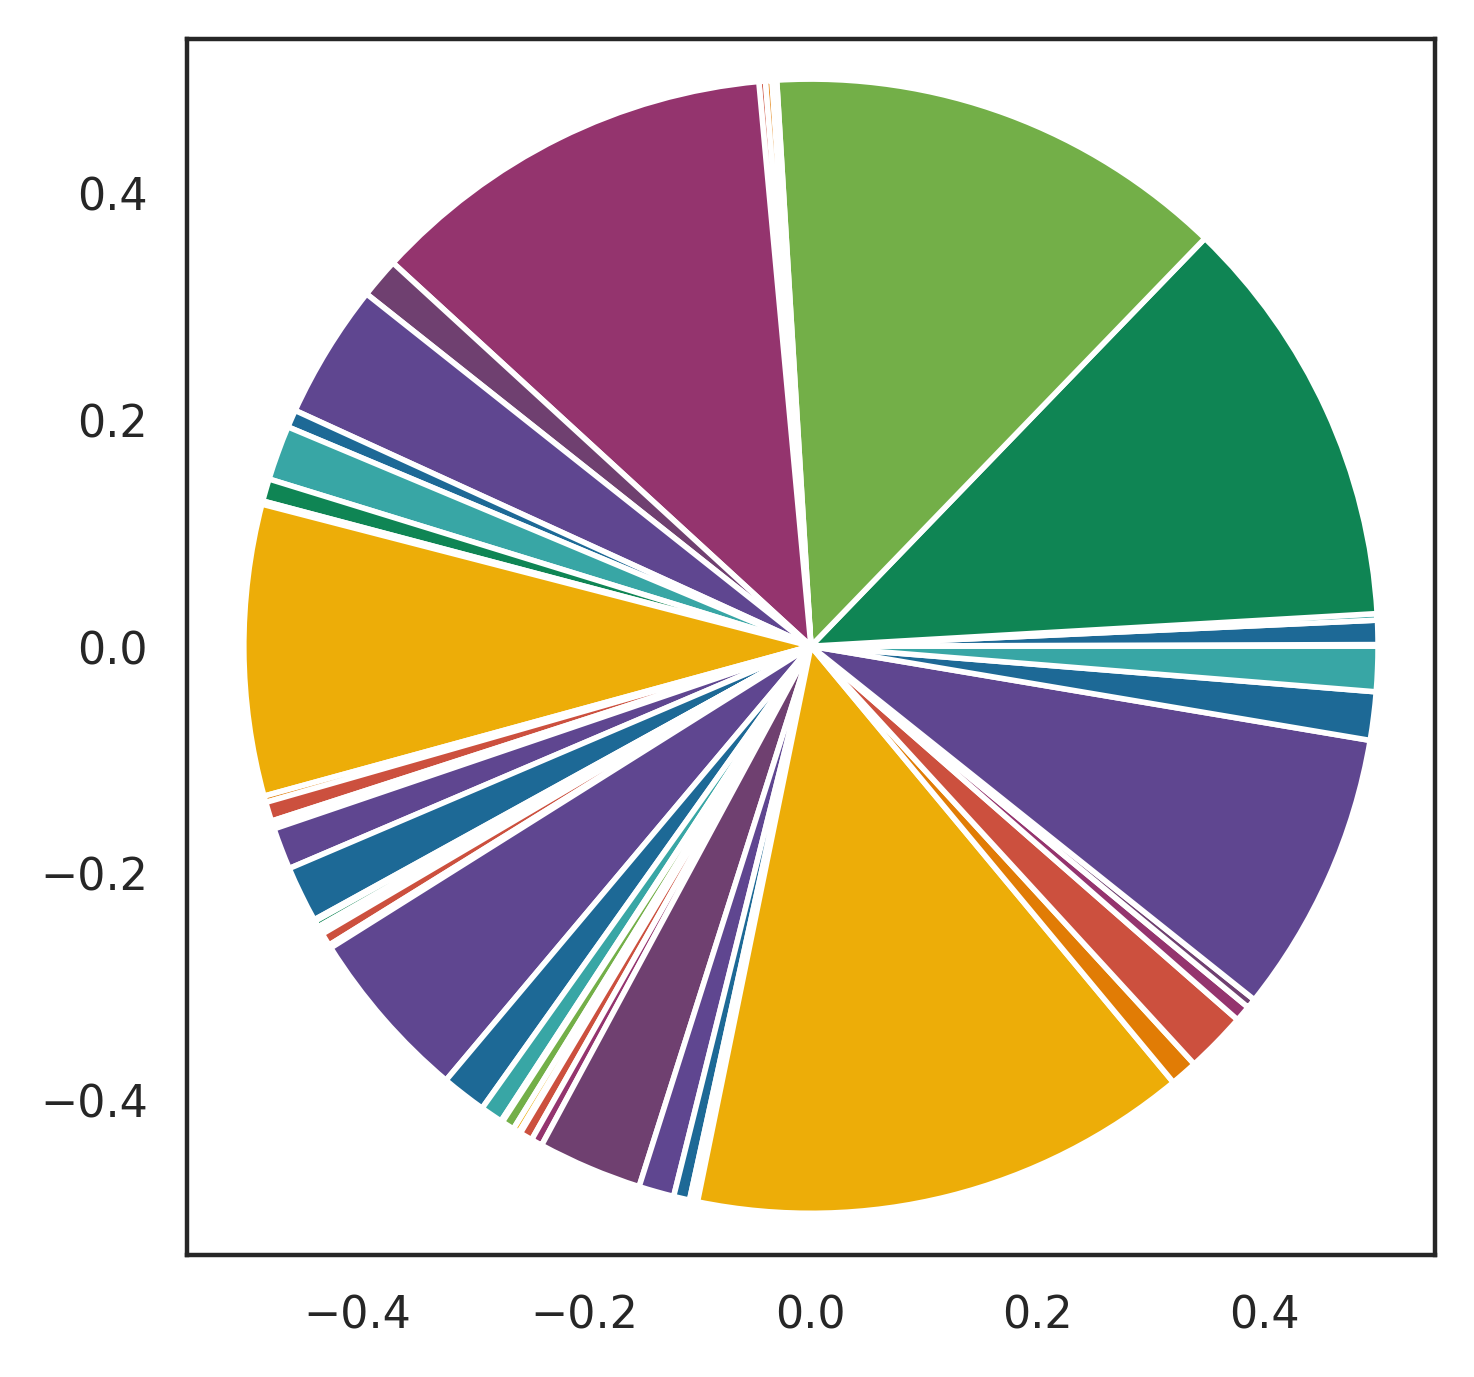

In [86]:
df_feature = 'Tissue'
labels,sizes = np.unique(df[df_feature],return_counts=1)
# cmp = [cmp_tf[-1],cmp_tf[0],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]
cmp = cmp_tissue




fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        # labels=labels,
                                          # autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        # wedgeprops=dict(width=0.2, edgecolor='w'),
        colors=cmp,
        # frame=True
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## biotech_name biotech_type

In [18]:
# biotech_type_name_vales = []
biotech_type_vals = []
biotech_name_vals = []
biotech_type_list = []
biotech_name_list = []
for bt in np.unique(df['biotech_type']):
    cur_df = df[df.biotech_type==bt]
    biotech_type_list.append(bt)


    cur_li = []
    for bn in np.unique(cur_df['biotech_name']):
        cur_df_2 = cur_df[cur_df.biotech_name==bn]
        cur_li.append(cur_df_2.shape[0])
        biotech_name_list.append(bn)
        biotech_name_vals.append(cur_df_2.shape[0])
    biotech_type_vals.append(np.sum(cur_li))
    # biotech_type_name_vales.append(cur_li.copy())


In [19]:
biotech_type_list

['Spatial Genomics',
 'Spatial Metabolomics',
 'Spatial MultiOmics',
 'Spatial Proteomics',
 'Spatial Transcriptomics']

In [20]:
omics_order = ['Spatial Transcriptomics','Spatial Proteomics','Spatial Metabolomics','Spatial Genomics','Spatial MultiOmics']
# pie_omics_color = [cmp_omics[omics_order.index(bt)] for bt in biotech_type_list]
pie_omics_color = [cmp_omics[3],cmp_omics[2],cmp_omics[4],cmp_omics[1],cmp_omics[0],]

In [115]:
biotech_type_list

['Spatial Genomics',
 'Spatial Metabolomics',
 'Spatial Metabolomics',
 'Spatial Metabolomics',
 'Spatial MultiOmics',
 'Spatial Proteomics',
 'Spatial Proteomics',
 'Spatial Proteomics',
 'Spatial Proteomics',
 'Spatial Proteomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics',
 'Spatial Transcriptomics']

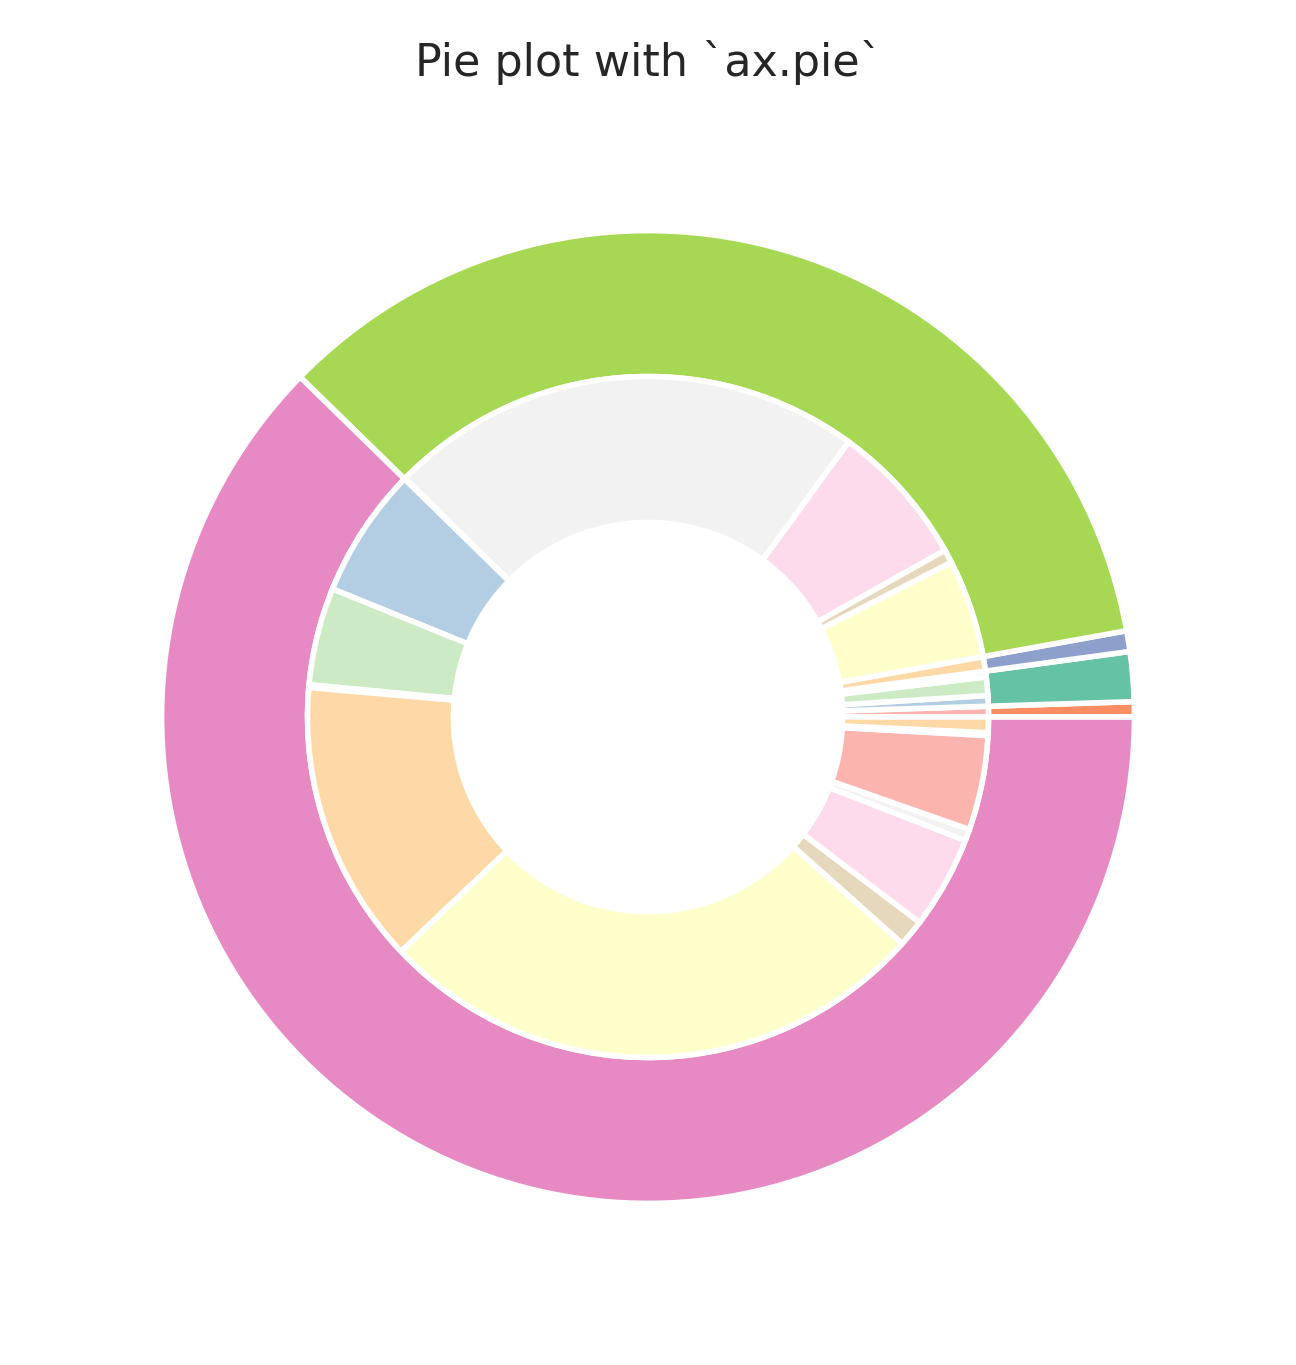

In [21]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

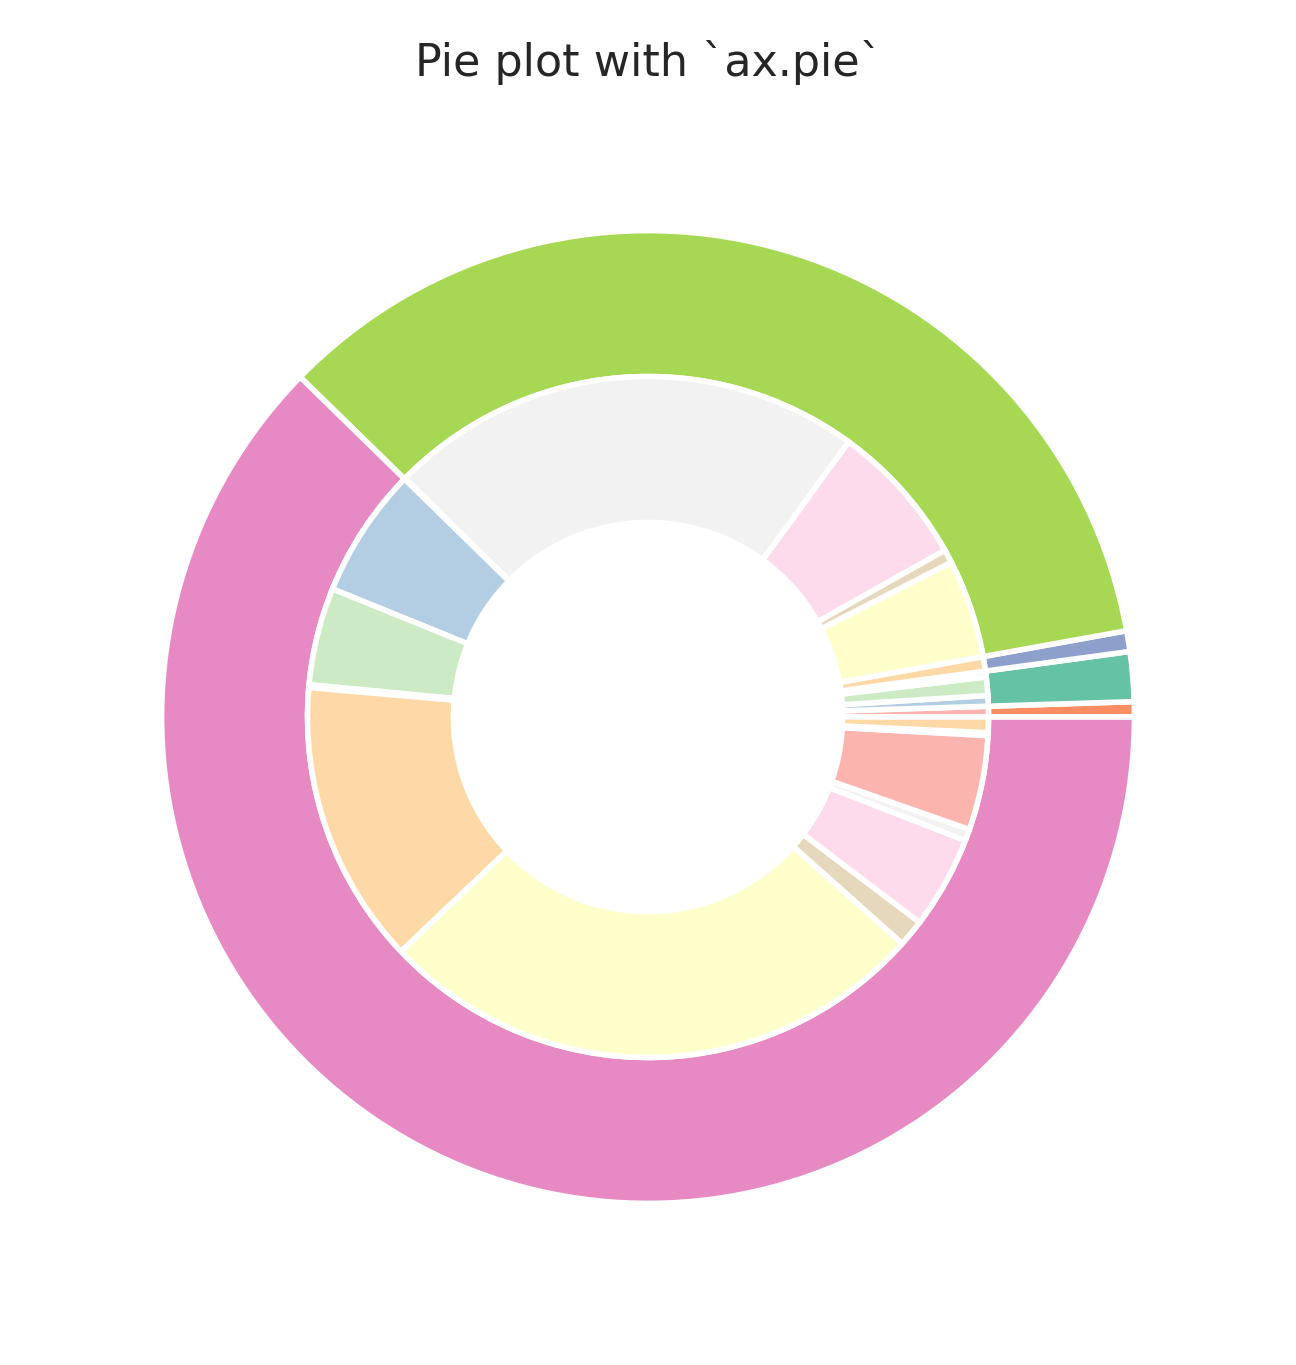

In [119]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [23]:
for i in range(len(biotech_name_vals)):
    print(f'{biotech_name_list[i]}:{biotech_name_vals[i]}')

Slide-DNA-seq:11
DESI:11
MALDI:19
SIMS:6
DBiT-seq:15
3D IMC:102
4i:14
CODEX:149
MIBI:495
t-CyCIF:1
10X Visium:135
EASI-FISH:101
HDST:3
MERFISH:294
ST:575
STARmap:28
Slide-seq:96
Slide-seqV2:12
Stereo-seq:98
osmFISH:1
sciSpace:1
seqFISH:1
seqFISH+:16


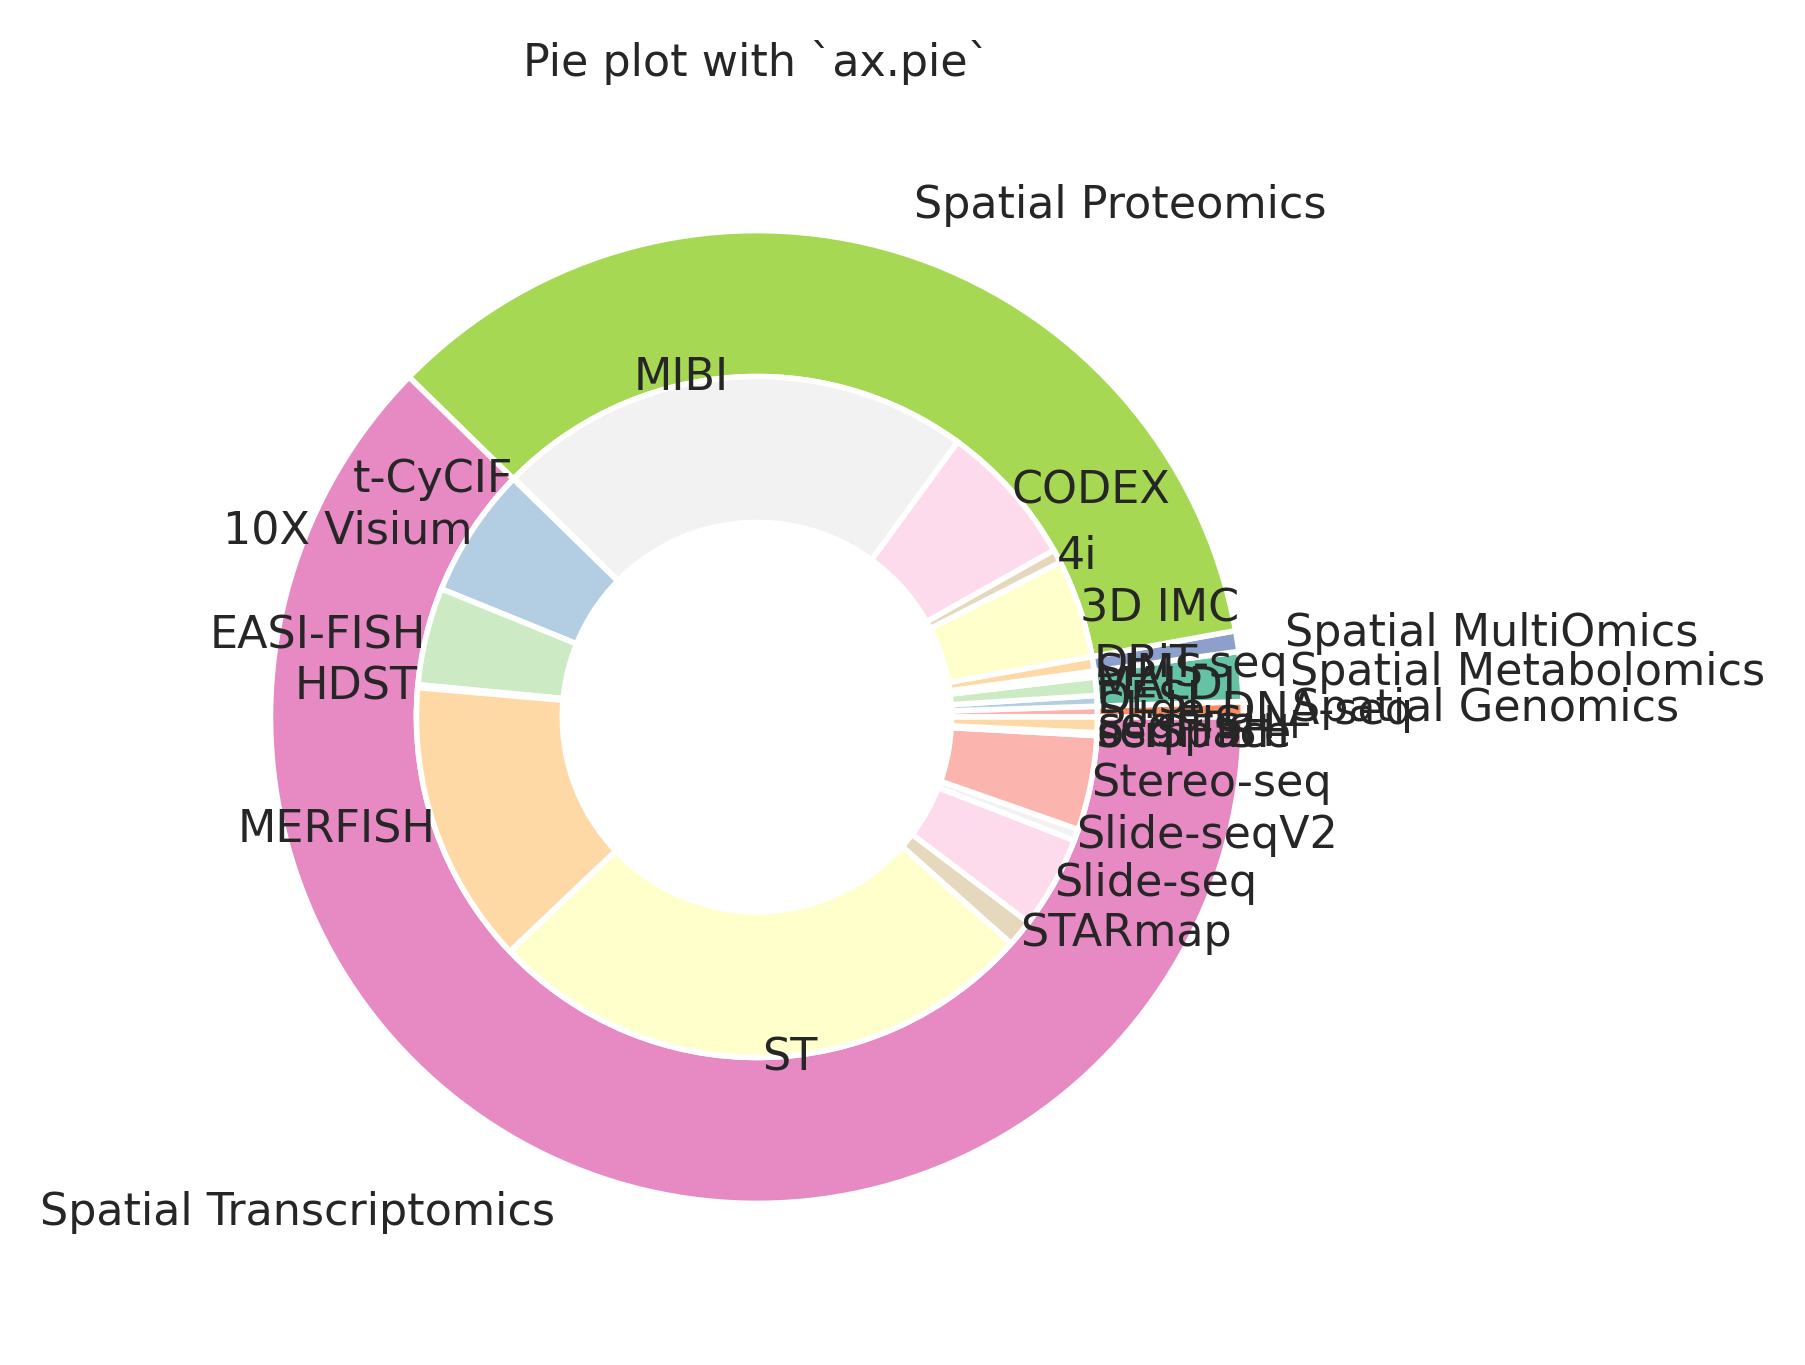

In [128]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1, colors=outer_colors,
       labels=biotech_type_list,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1-size, 
       labeldistance=1,
       colors=inner_colors,
              labels=biotech_name_list,


       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

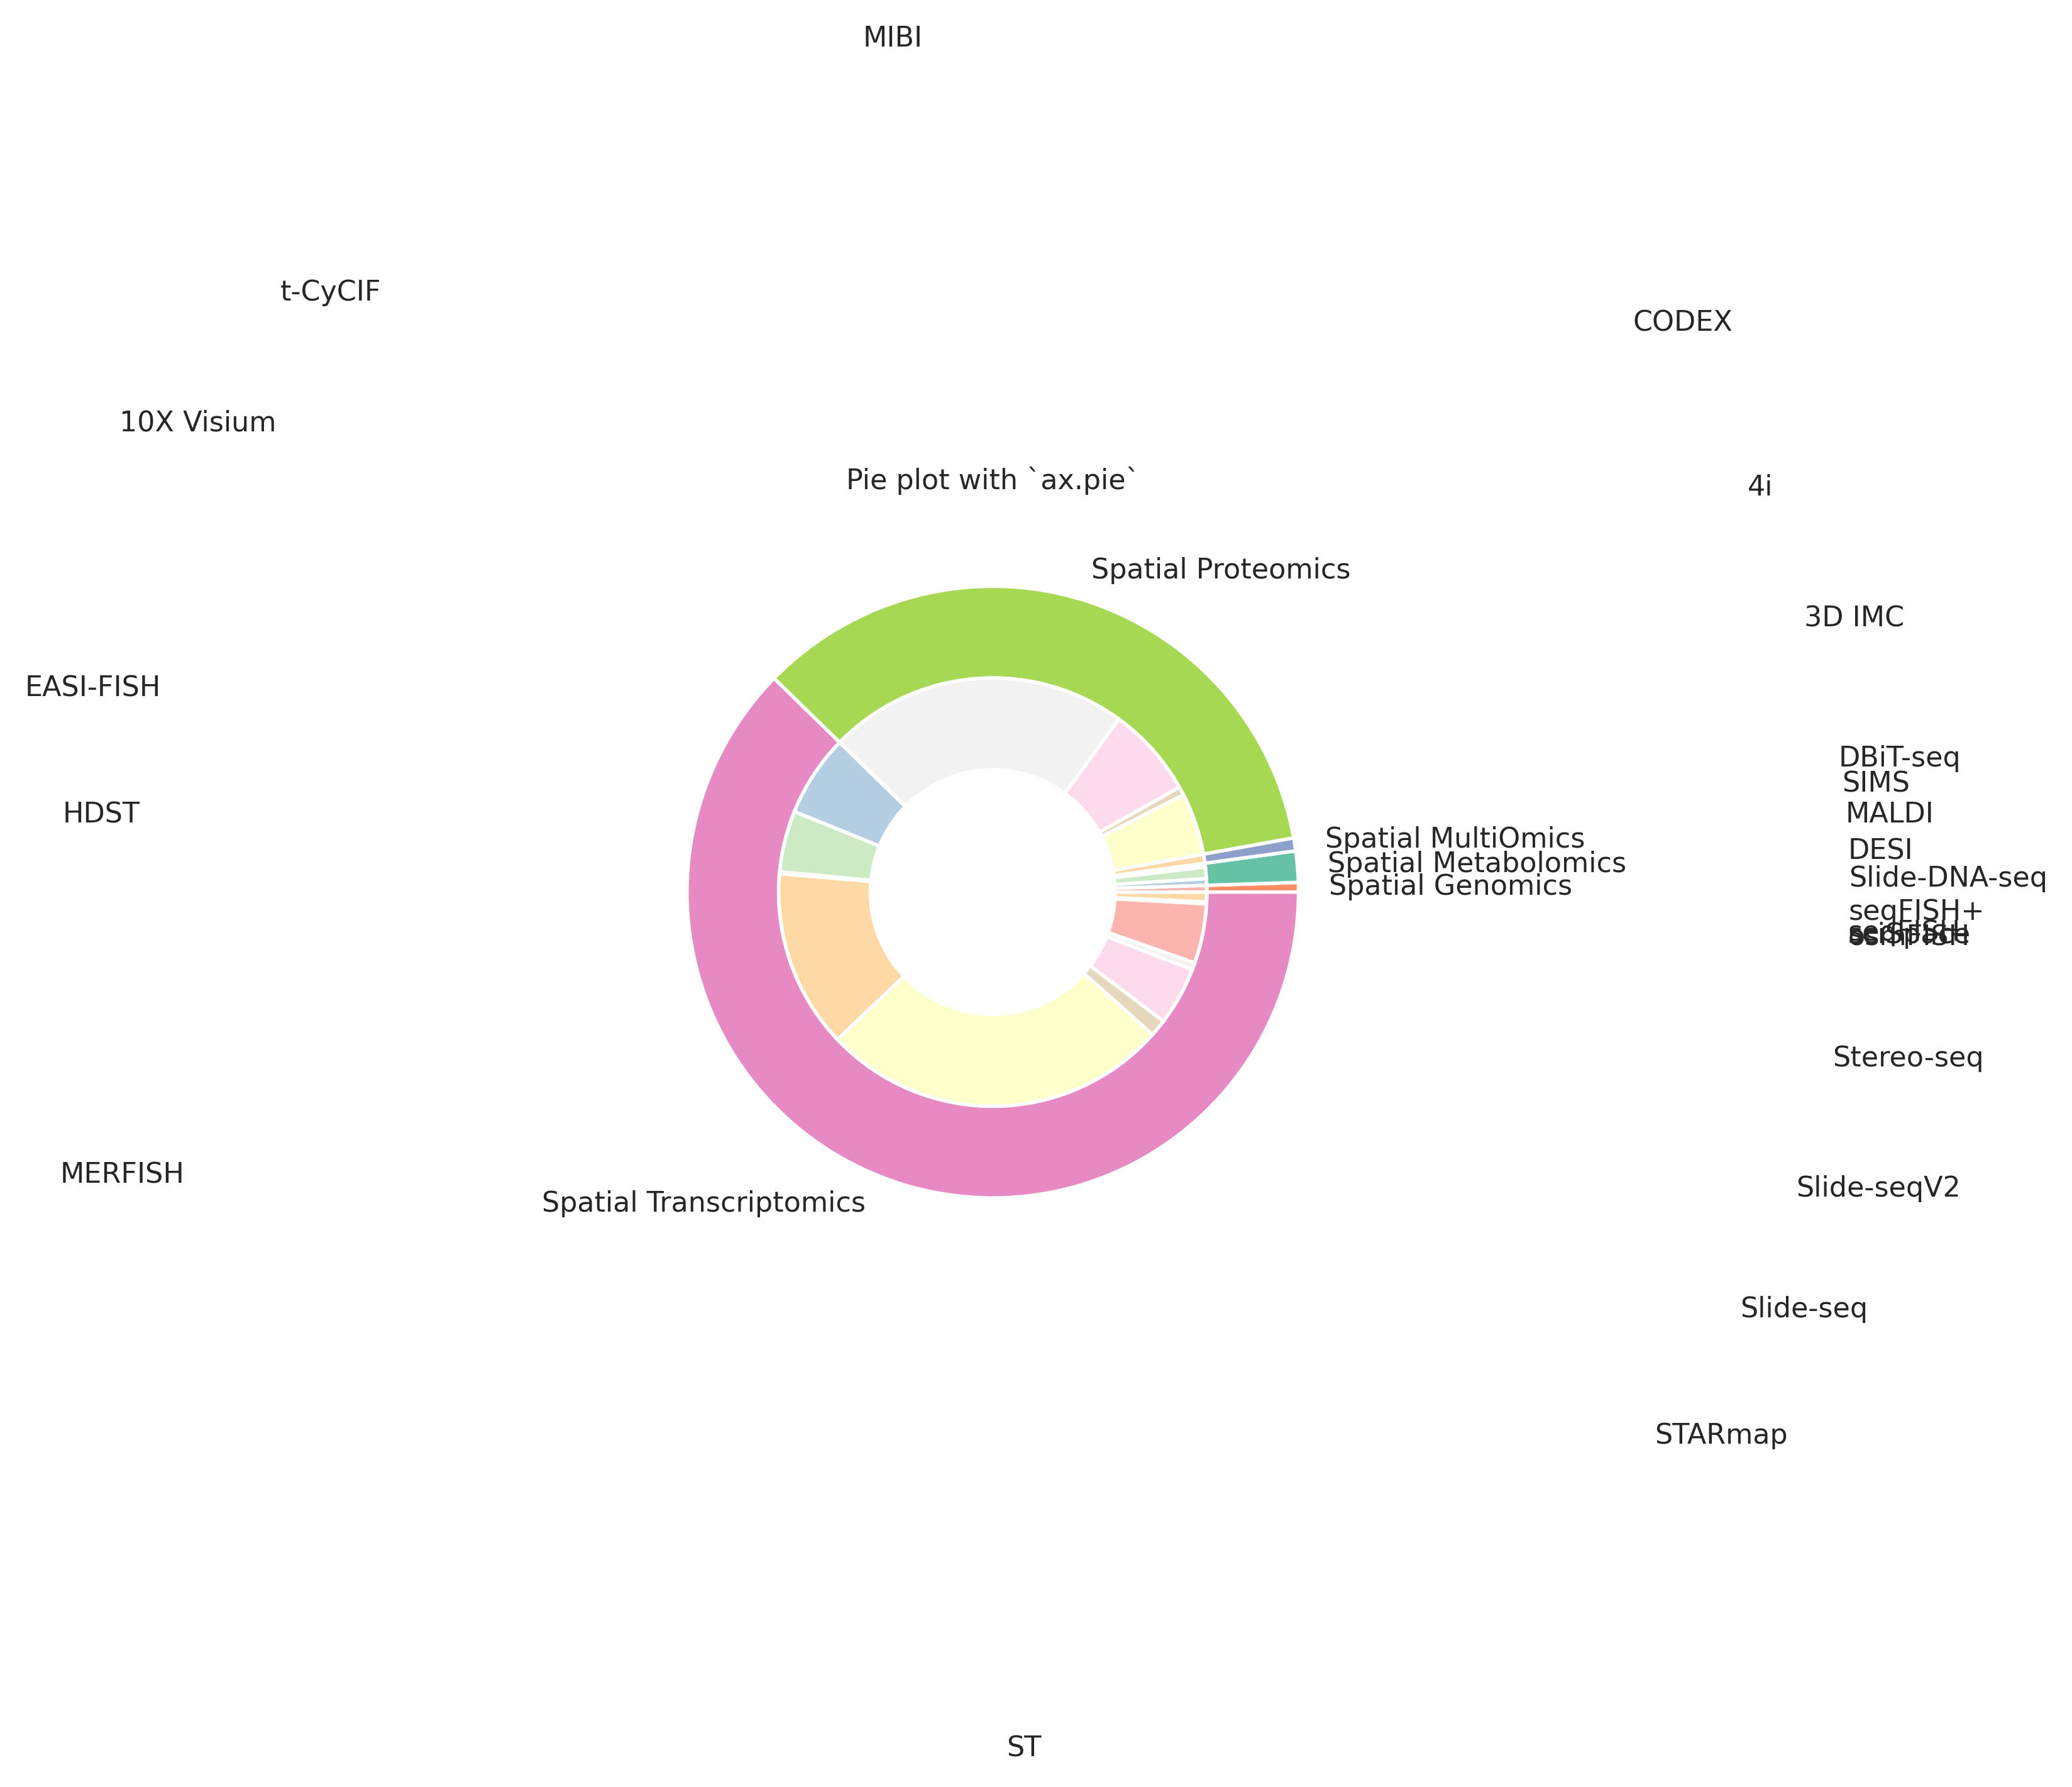

In [124]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1, colors=outer_colors,
       labels=biotech_type_list,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1-size, 
       labeldistance=4,
       colors=inner_colors,
              labels=biotech_name_list,


       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

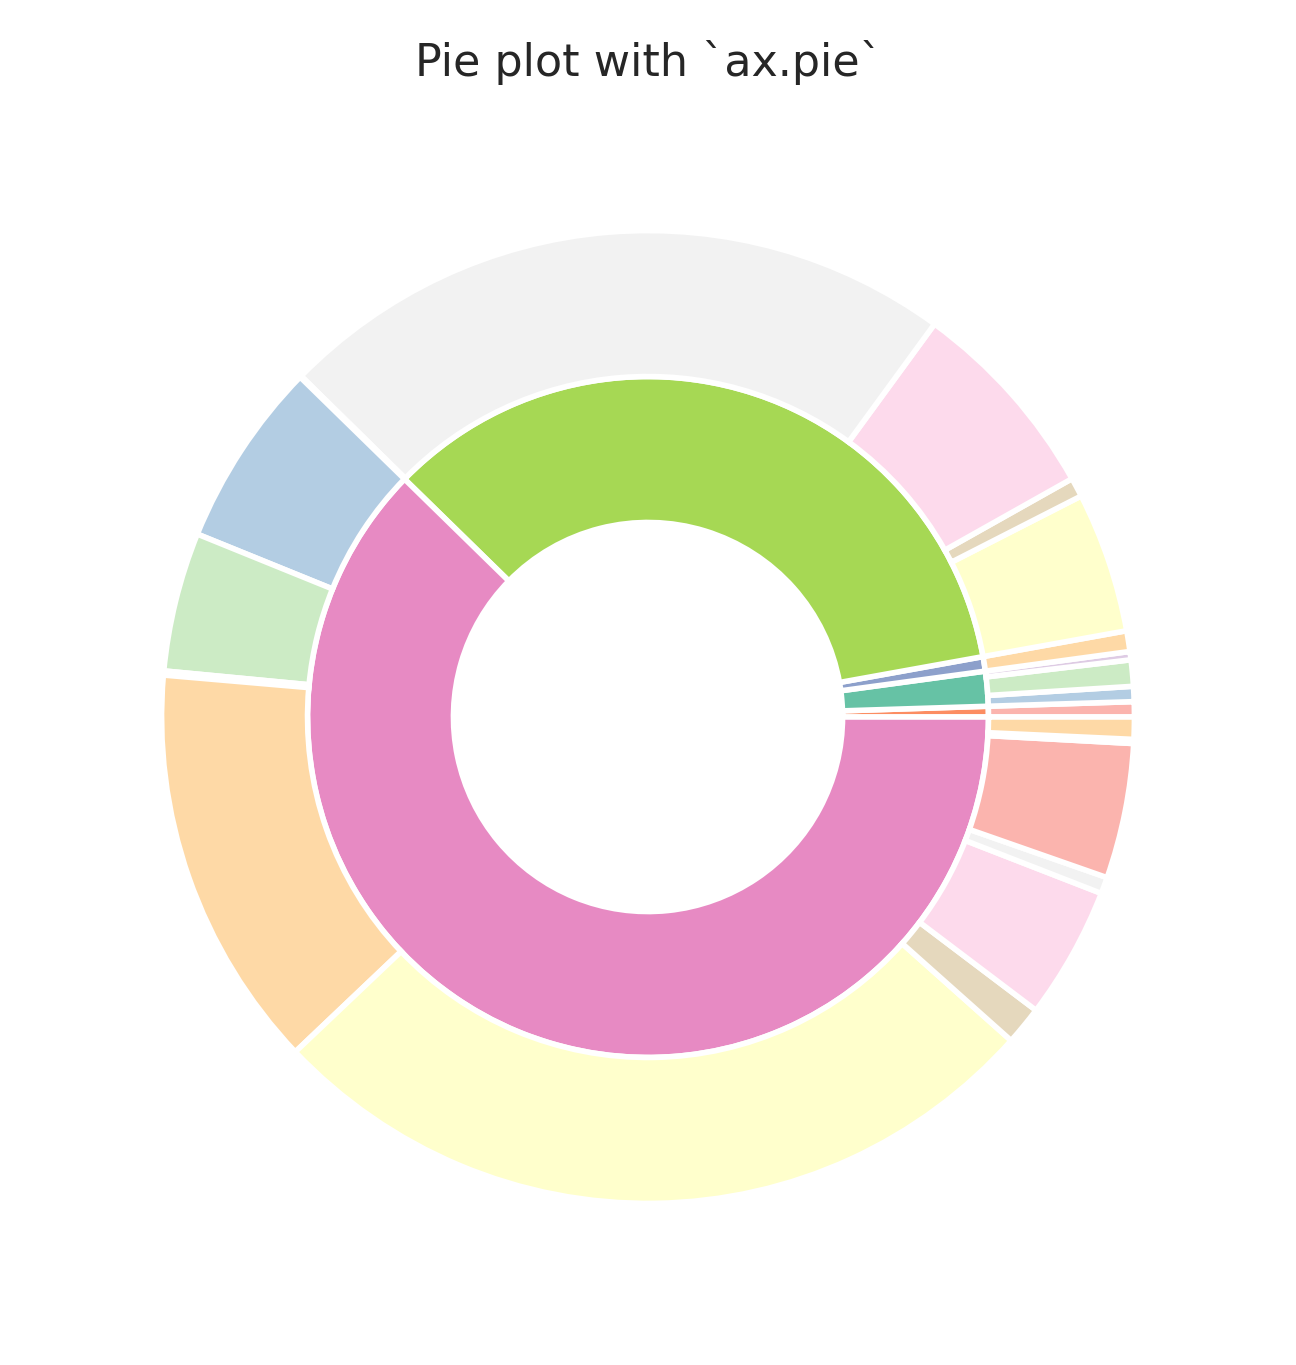

In [131]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1-size, colors=outer_colors,
       # labels=biotech_type_list,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1, 
       labeldistance=4,
       colors=inner_colors,
              # labels=biotech_name_list,


       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

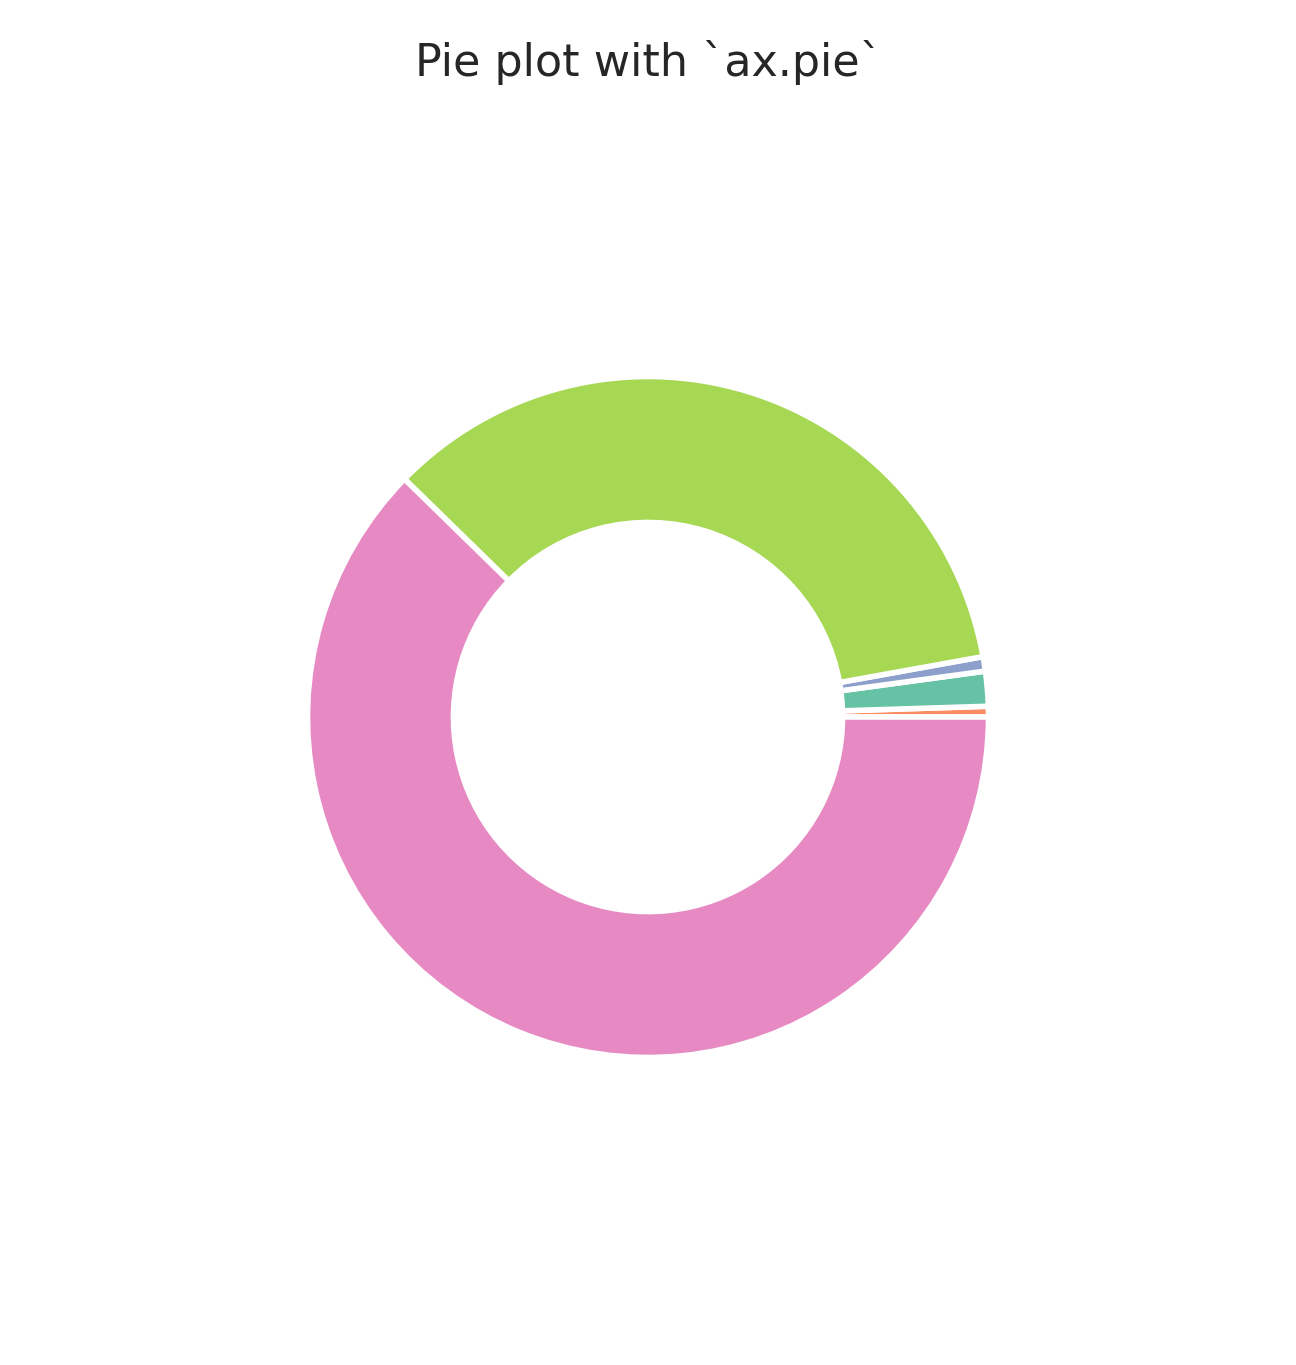

In [24]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1-size, colors=outer_colors,
       # labels=biotech_type_list,
       wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(biotech_name_vals, radius=1, 
#        labeldistance=4,
#        colors=inner_colors,
#               # labels=biotech_name_list,


#        wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

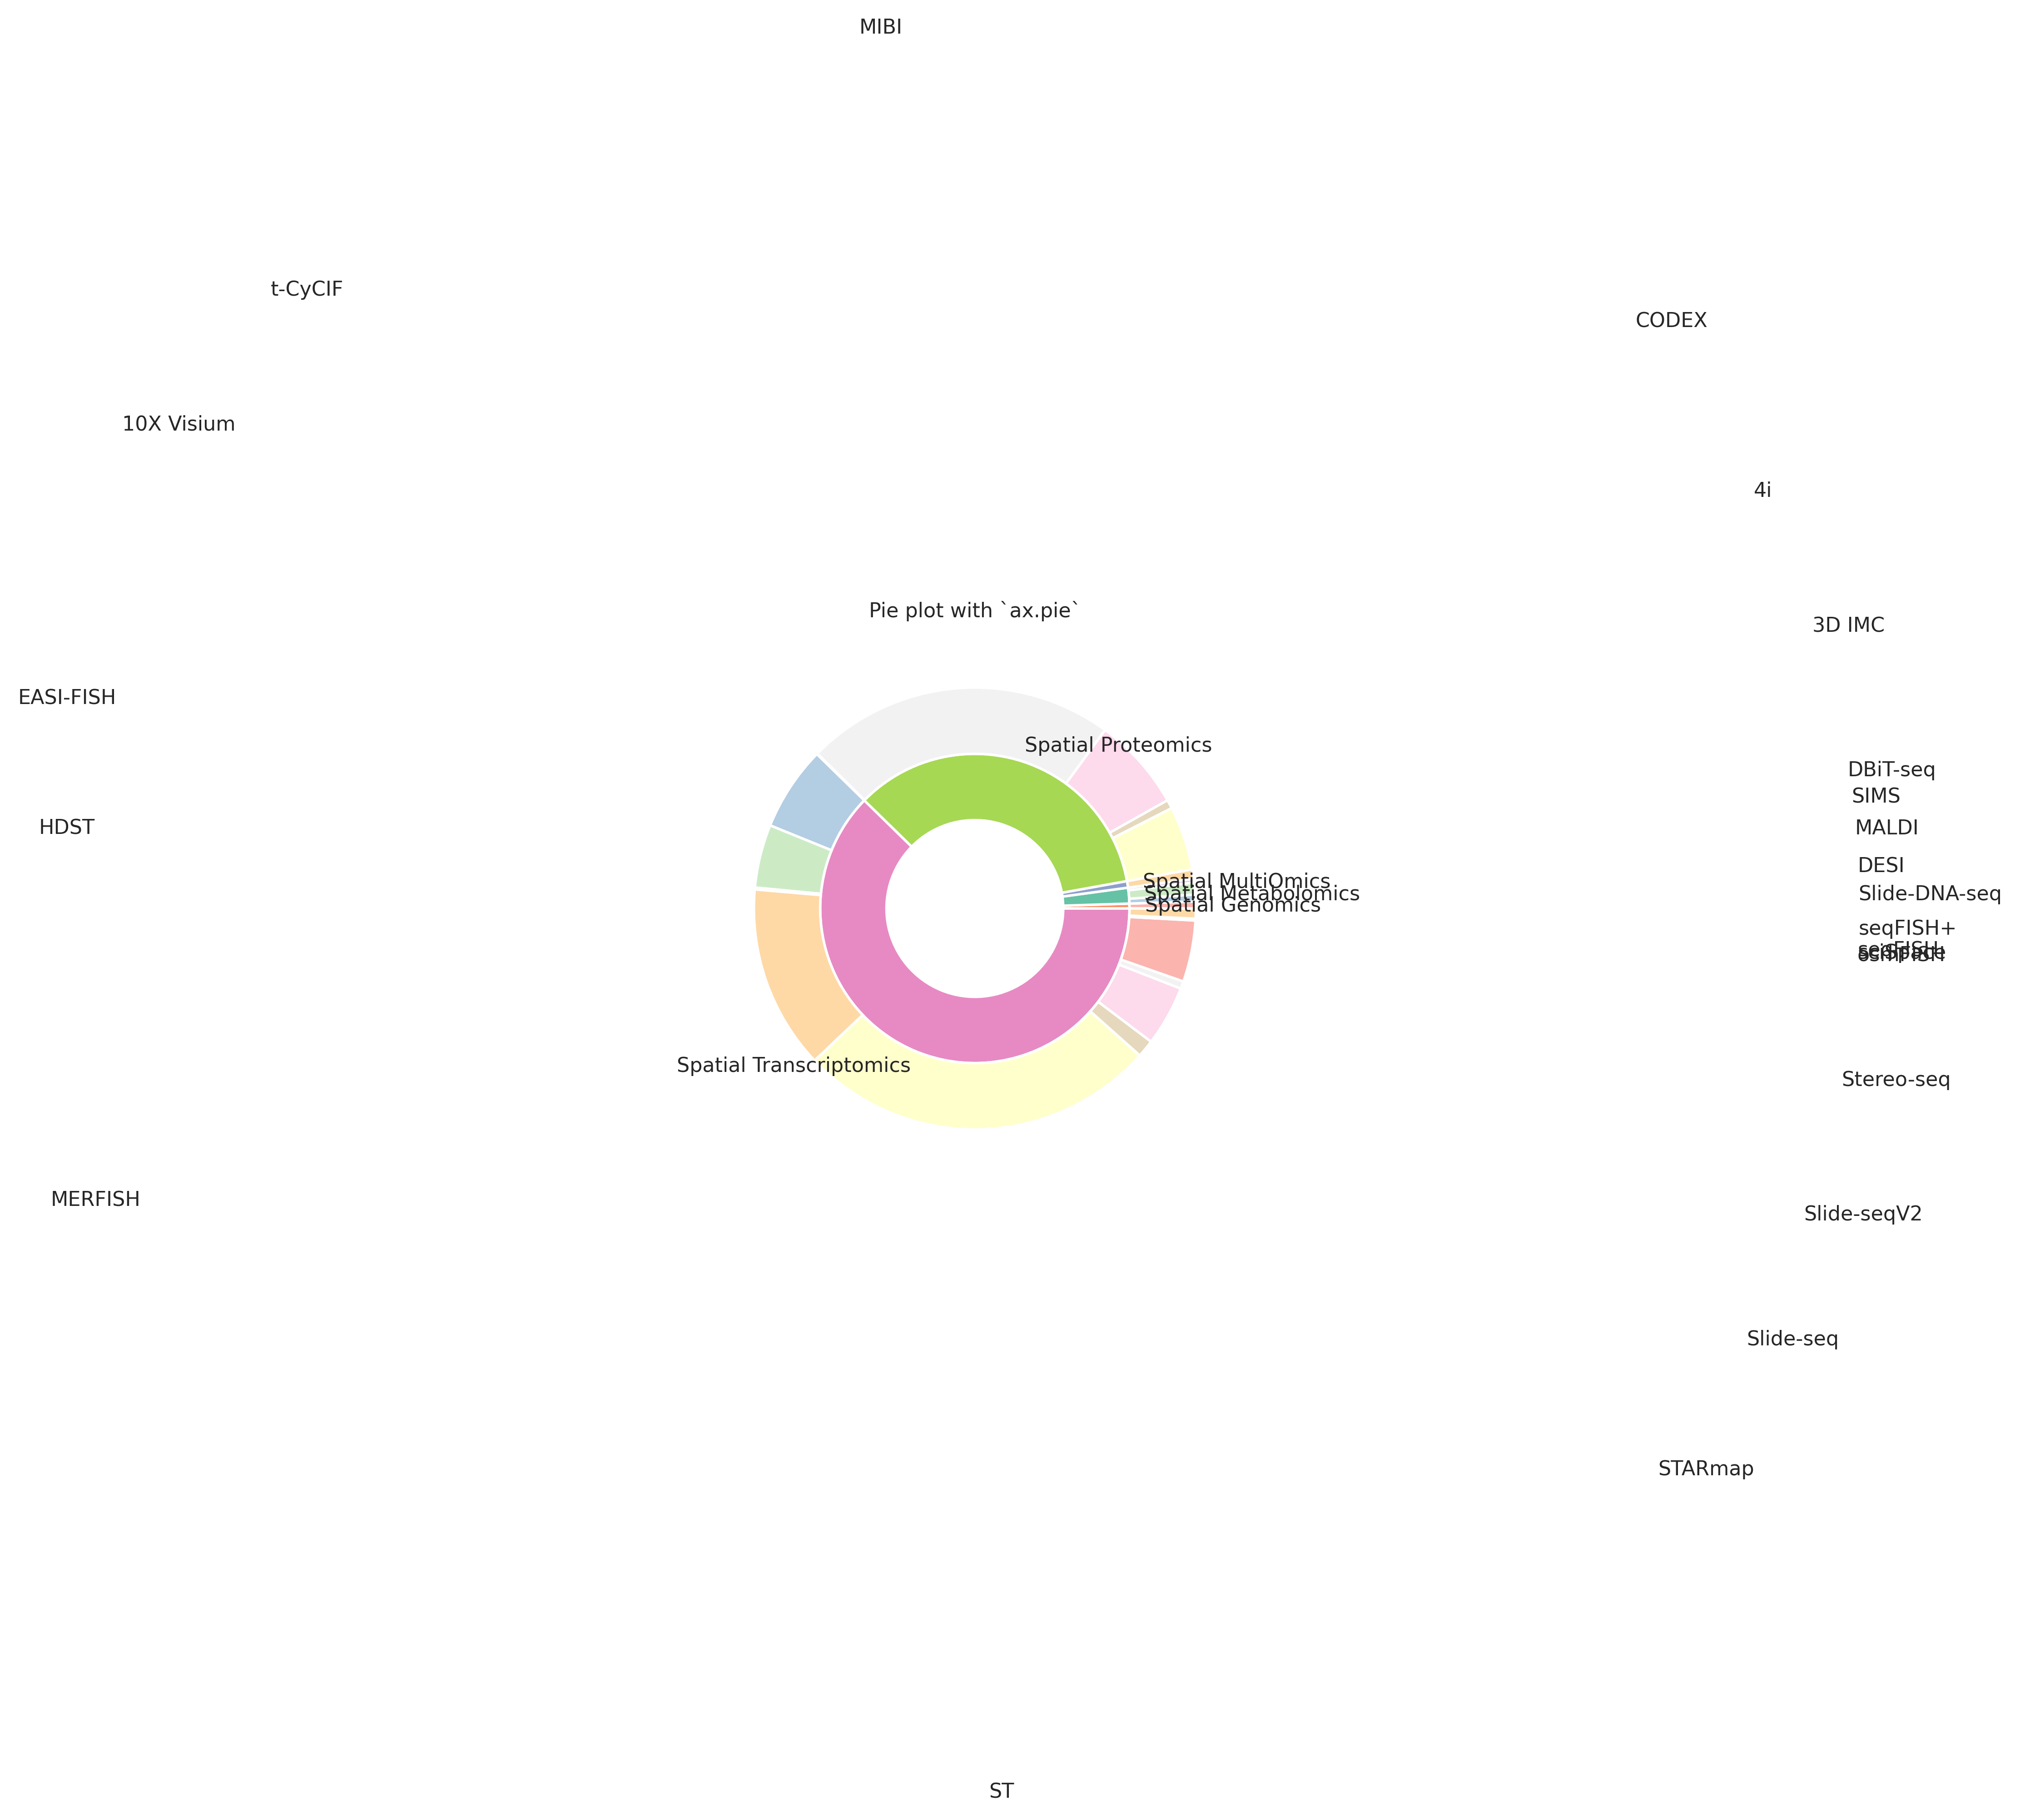

In [130]:
fig, ax = plt.subplots()

size = 0.3
# vals_out = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
outer_colors = pie_omics_color
inner_colors = cmp_biotech

ax.pie(biotech_type_vals, radius=1-size, colors=outer_colors,
       labels=biotech_type_list,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(biotech_name_vals, radius=1, 
       labeldistance=4,
       colors=inner_colors,
              labels=biotech_name_list,


       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [139]:
df[['N_Unit']] = df[['N_Unit']].astype('int')
df[['N_Unit_log']] = np.log10(df[['N_Unit']])

df[['N_Gene']] = df[['N_Gene']].astype('int')
df[['N_Gene_log']] = np.log10(df[['N_Gene']])




In [140]:
df

ID                              Name Biotech_ID Dataset_ID  \
0        0         GSM4202309_0719aL_protein         22         76   
1        1      GSM4202310_0725e10aL_protein         22         76   
2        2                    E11_lower_body         22         76   
3        3               E10_whole_gene_best         22         76   
4        4                E10_eye_and_nearby         22         76   
...    ...                               ...        ...        ...   
2179  2179  H20.30.001.STG.250.unexpand.rep1          3         92   
2180  2180   H22.26.401.MTG.4000.expand.rep2          3         92   
2181  2181  H22.26.401.MTG.250.unexpand.rep1          3         92   
2182  2182   mouse1.AUD_TEA_VIS.242.unexpand          3         92   
2183  2183   H20.30.001.STG.4000.expand.rep3          3         92   

                                              H5ad_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
...                                                 ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   

                                          GeneList_Path Histology_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
...                                                 ...            ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   

     Species  Tissue  N_Unit  ...  Zip_Path with_control with_replicate  \
0      MOUSE  EMBRYO    2500  ...      None            0              1   
1      MOUSE  EMBRYO     936  ...      None            0              1   
2      MOUSE  EMBRYO    1662  ...      None            0              1   
3      MOUSE  EMBRYO     936  ...      None            0              1   
4      MOUSE  EMBRYO    2500  ...      None            0              1   
...      ...     ...     ...  ...       ...          ...            ...   
2179   HUMAN  CORTEX   14174  ...      None            1              1   
2180   HUMAN  CORTEX    3512  ...      None            1              1   
2181   HUMAN  CORTEX    5891  ...      None            1              1   
2182   MOUSE  CORTEX   13222  ...      None            1              1   
2183   HUMAN  CORTEX    3918  ...      None            1              1   

     with_annotation with_publication biotech_name             biotech_type  \
0                  0                1     DBiT-seq       Spatial MultiOmics   
1                  0                1     DBiT-seq       Spatial MultiOmics   
2                  0                1     DBiT-seq       Spatial MultiOmics   
3                  0                1     DBiT-seq       Spatial MultiOmics   
4                  0                1     DBiT-seq       Spatial MultiOmics   
...              ...              ...          ...                      ...   
2179               0                1      MERFISH  Spatial Transcriptomics   
2180               0                

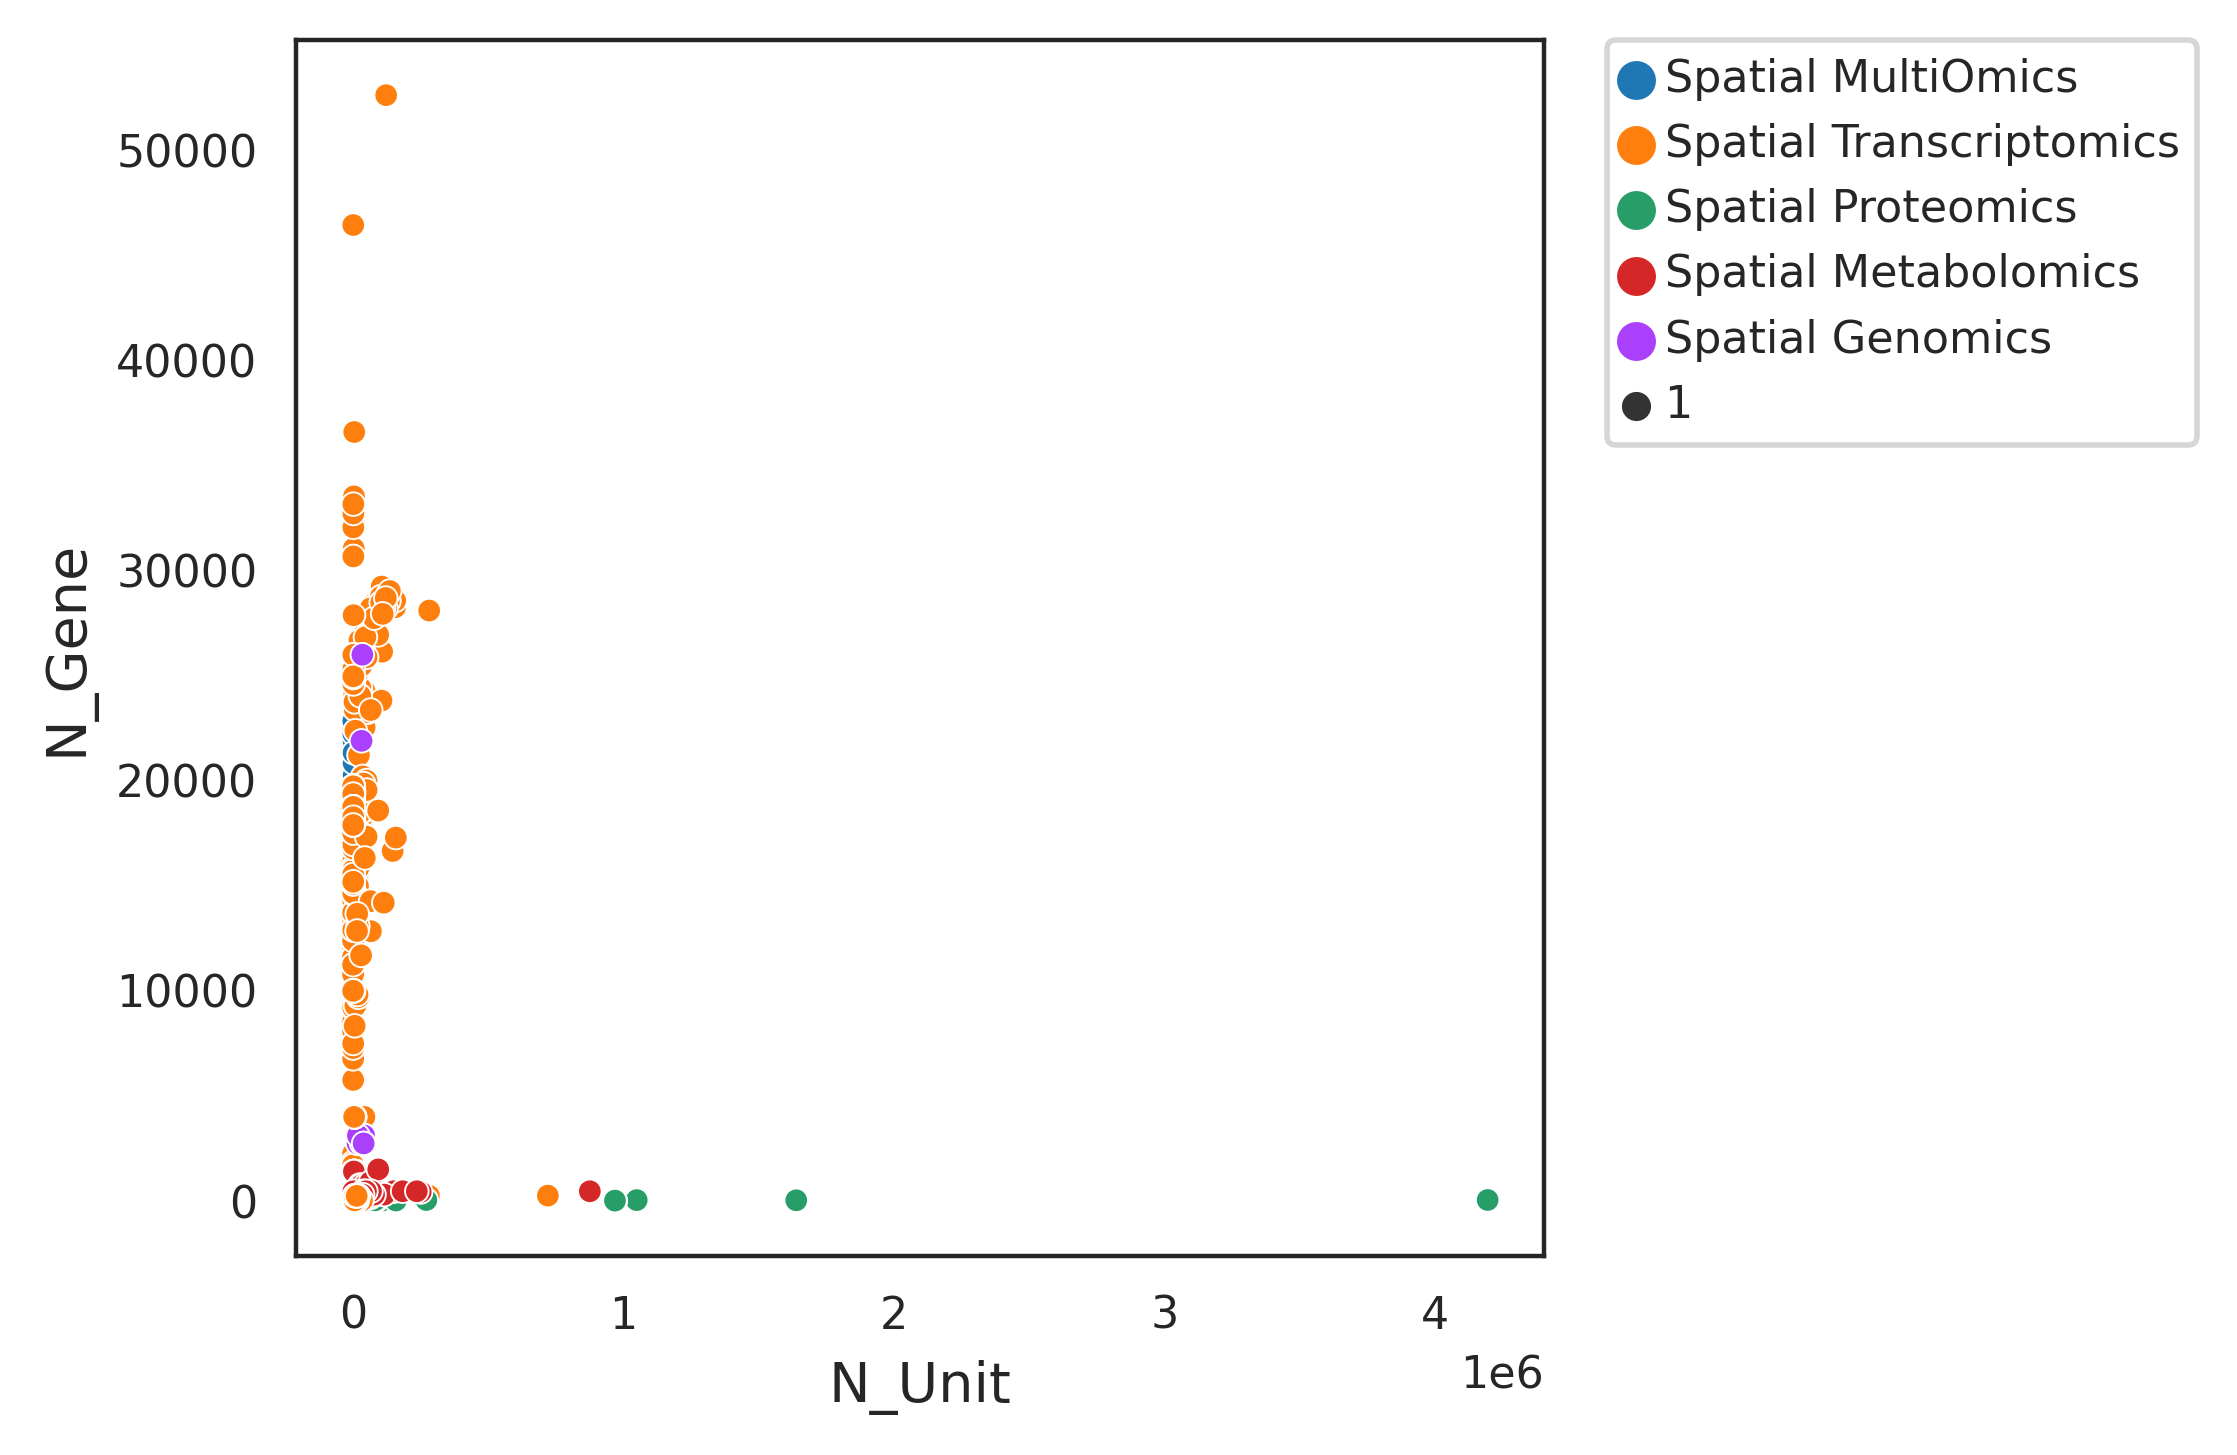

In [159]:
sns.scatterplot(x="N_Unit", y="N_Gene", hue="biotech_type", data=df,size=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

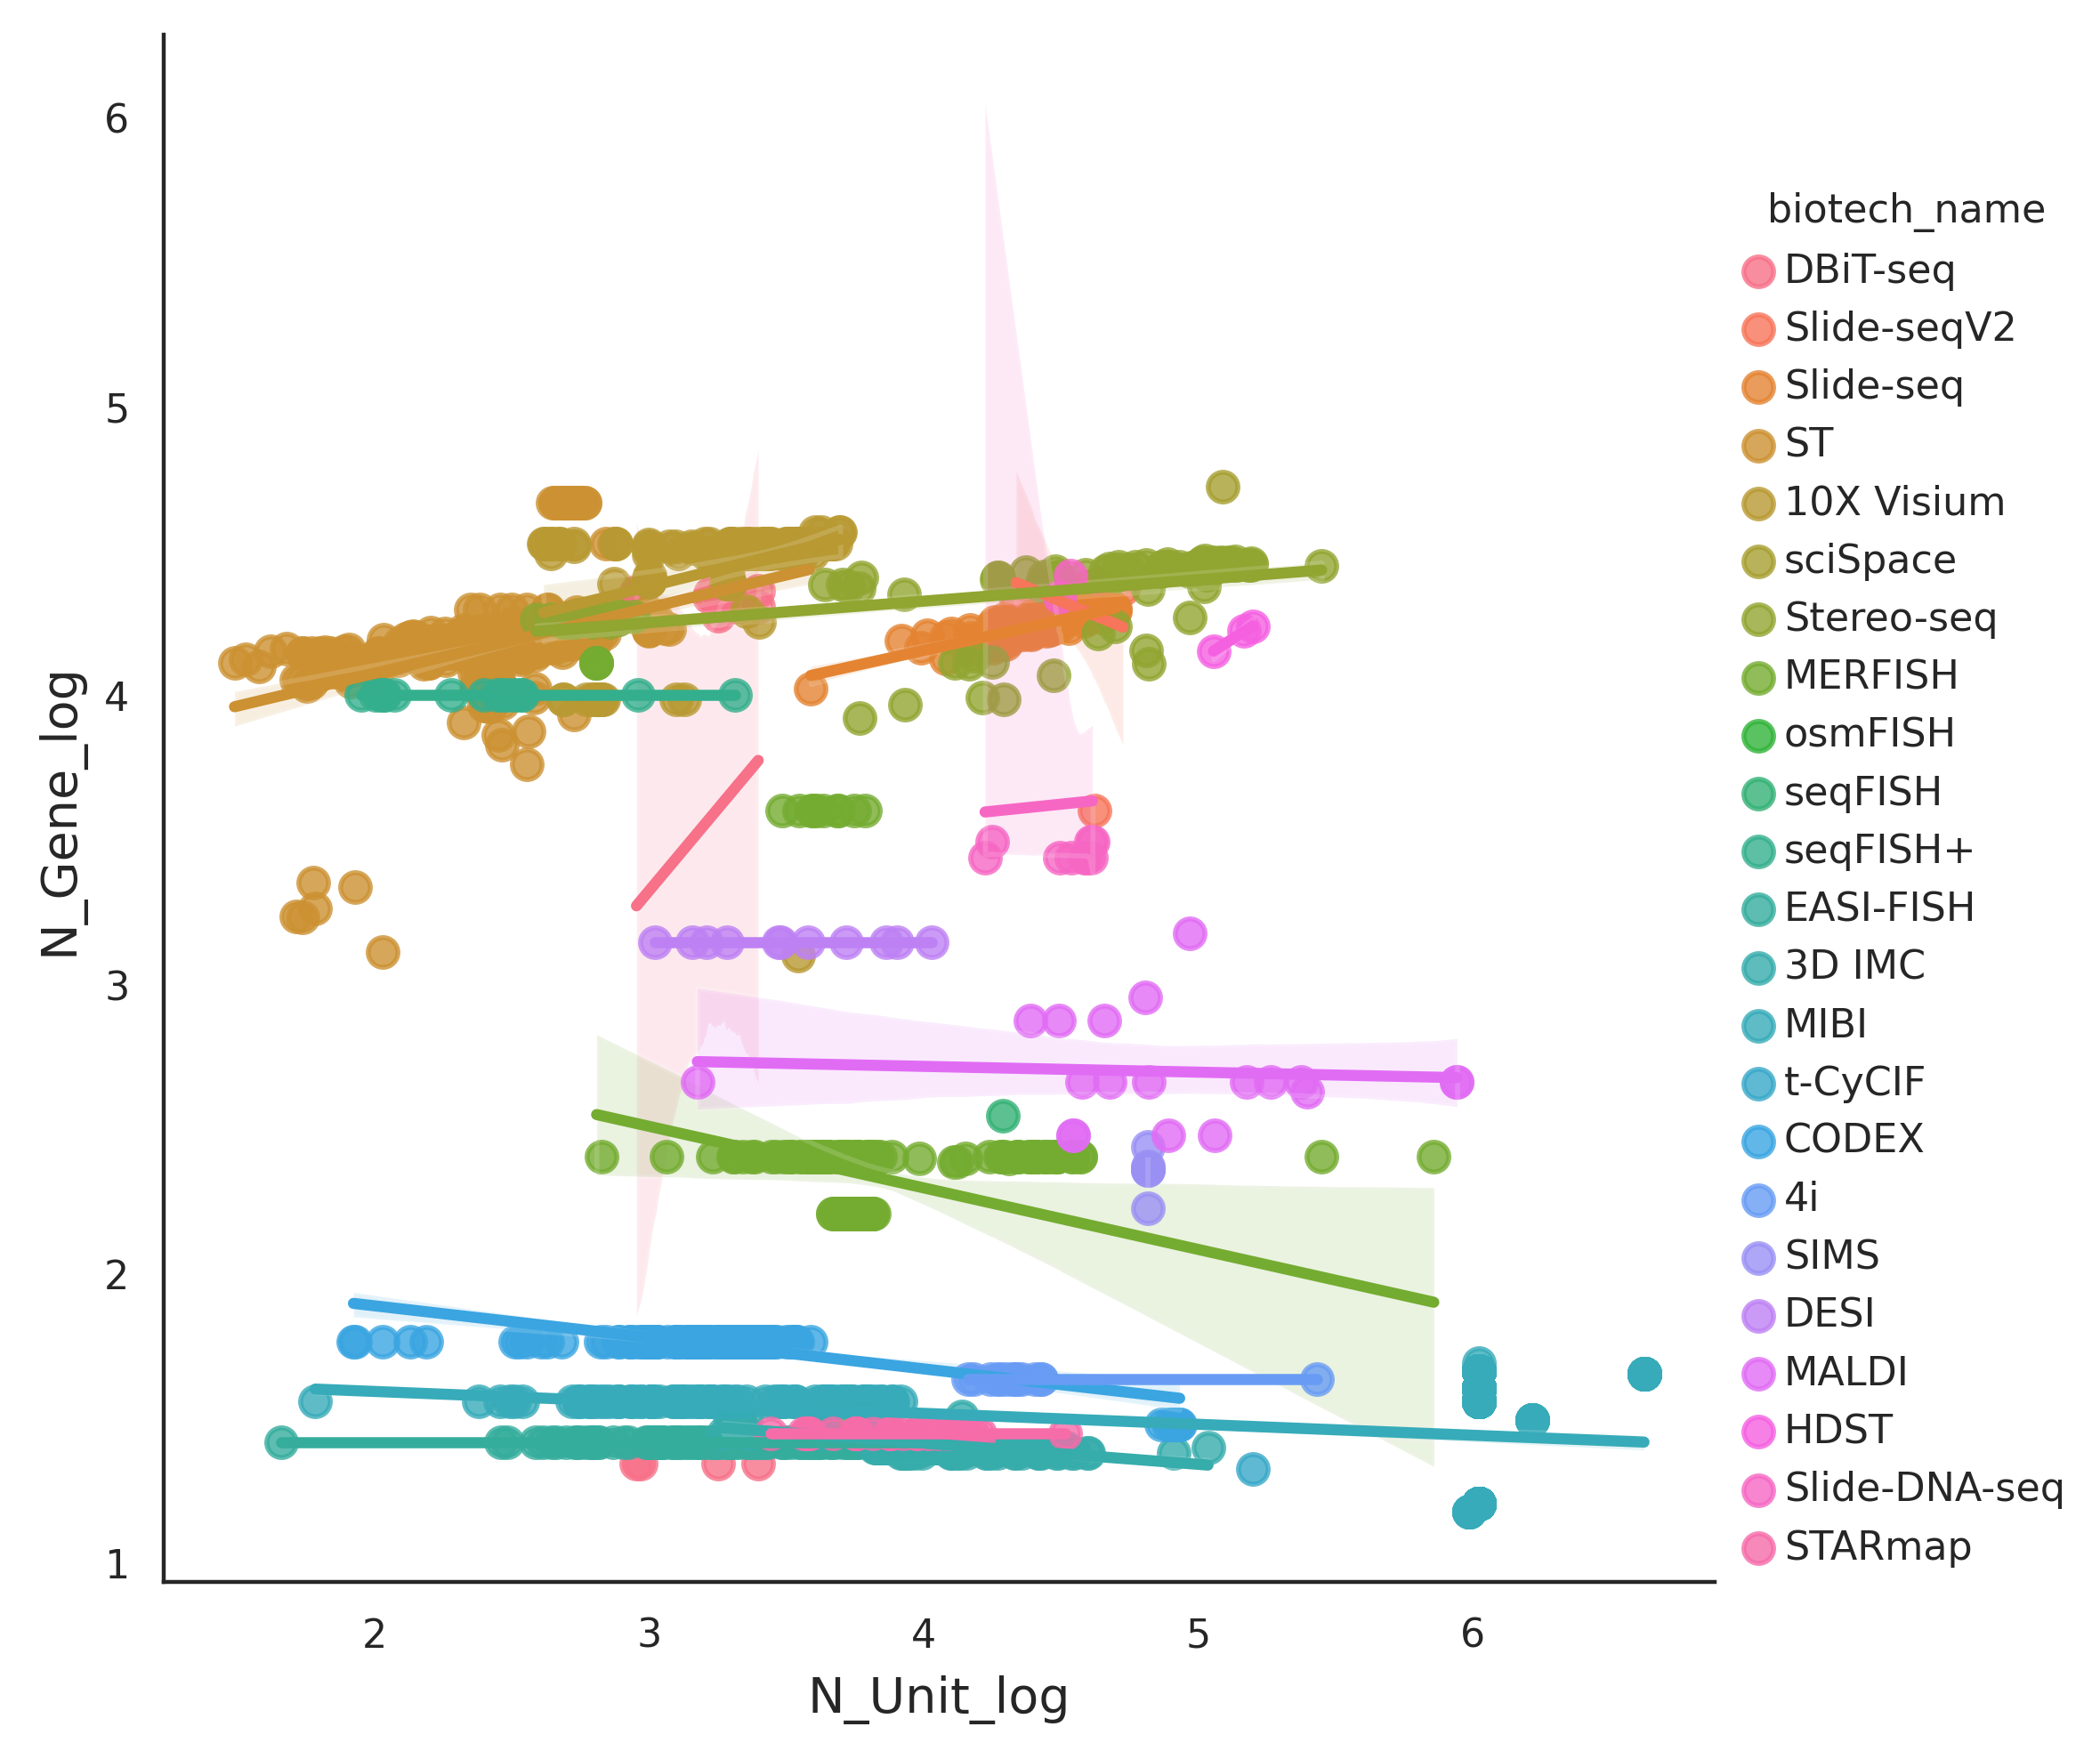

In [141]:
sns.lmplot(x="N_Unit_log", y="N_Gene_log", hue="biotech_name", data=df);

In [41]:
dataset = pd.read_feather('dataset.feather')

In [42]:
dataset.columns

Index(['index', 'Name_Short', 'Name_Long', 'Biotech_ID', 'doi', 'Date',
       'Country', 'Journal', 'Author', 'Access', 'Zip_Path', 'data_count',
       'N_Unit', 'N_Gene', 'Species', 'N_Unit_log', 'N_Gene_log',
       'biotech_name', 'biotech_type', 'data_count_trun_100'],
      dtype='object')

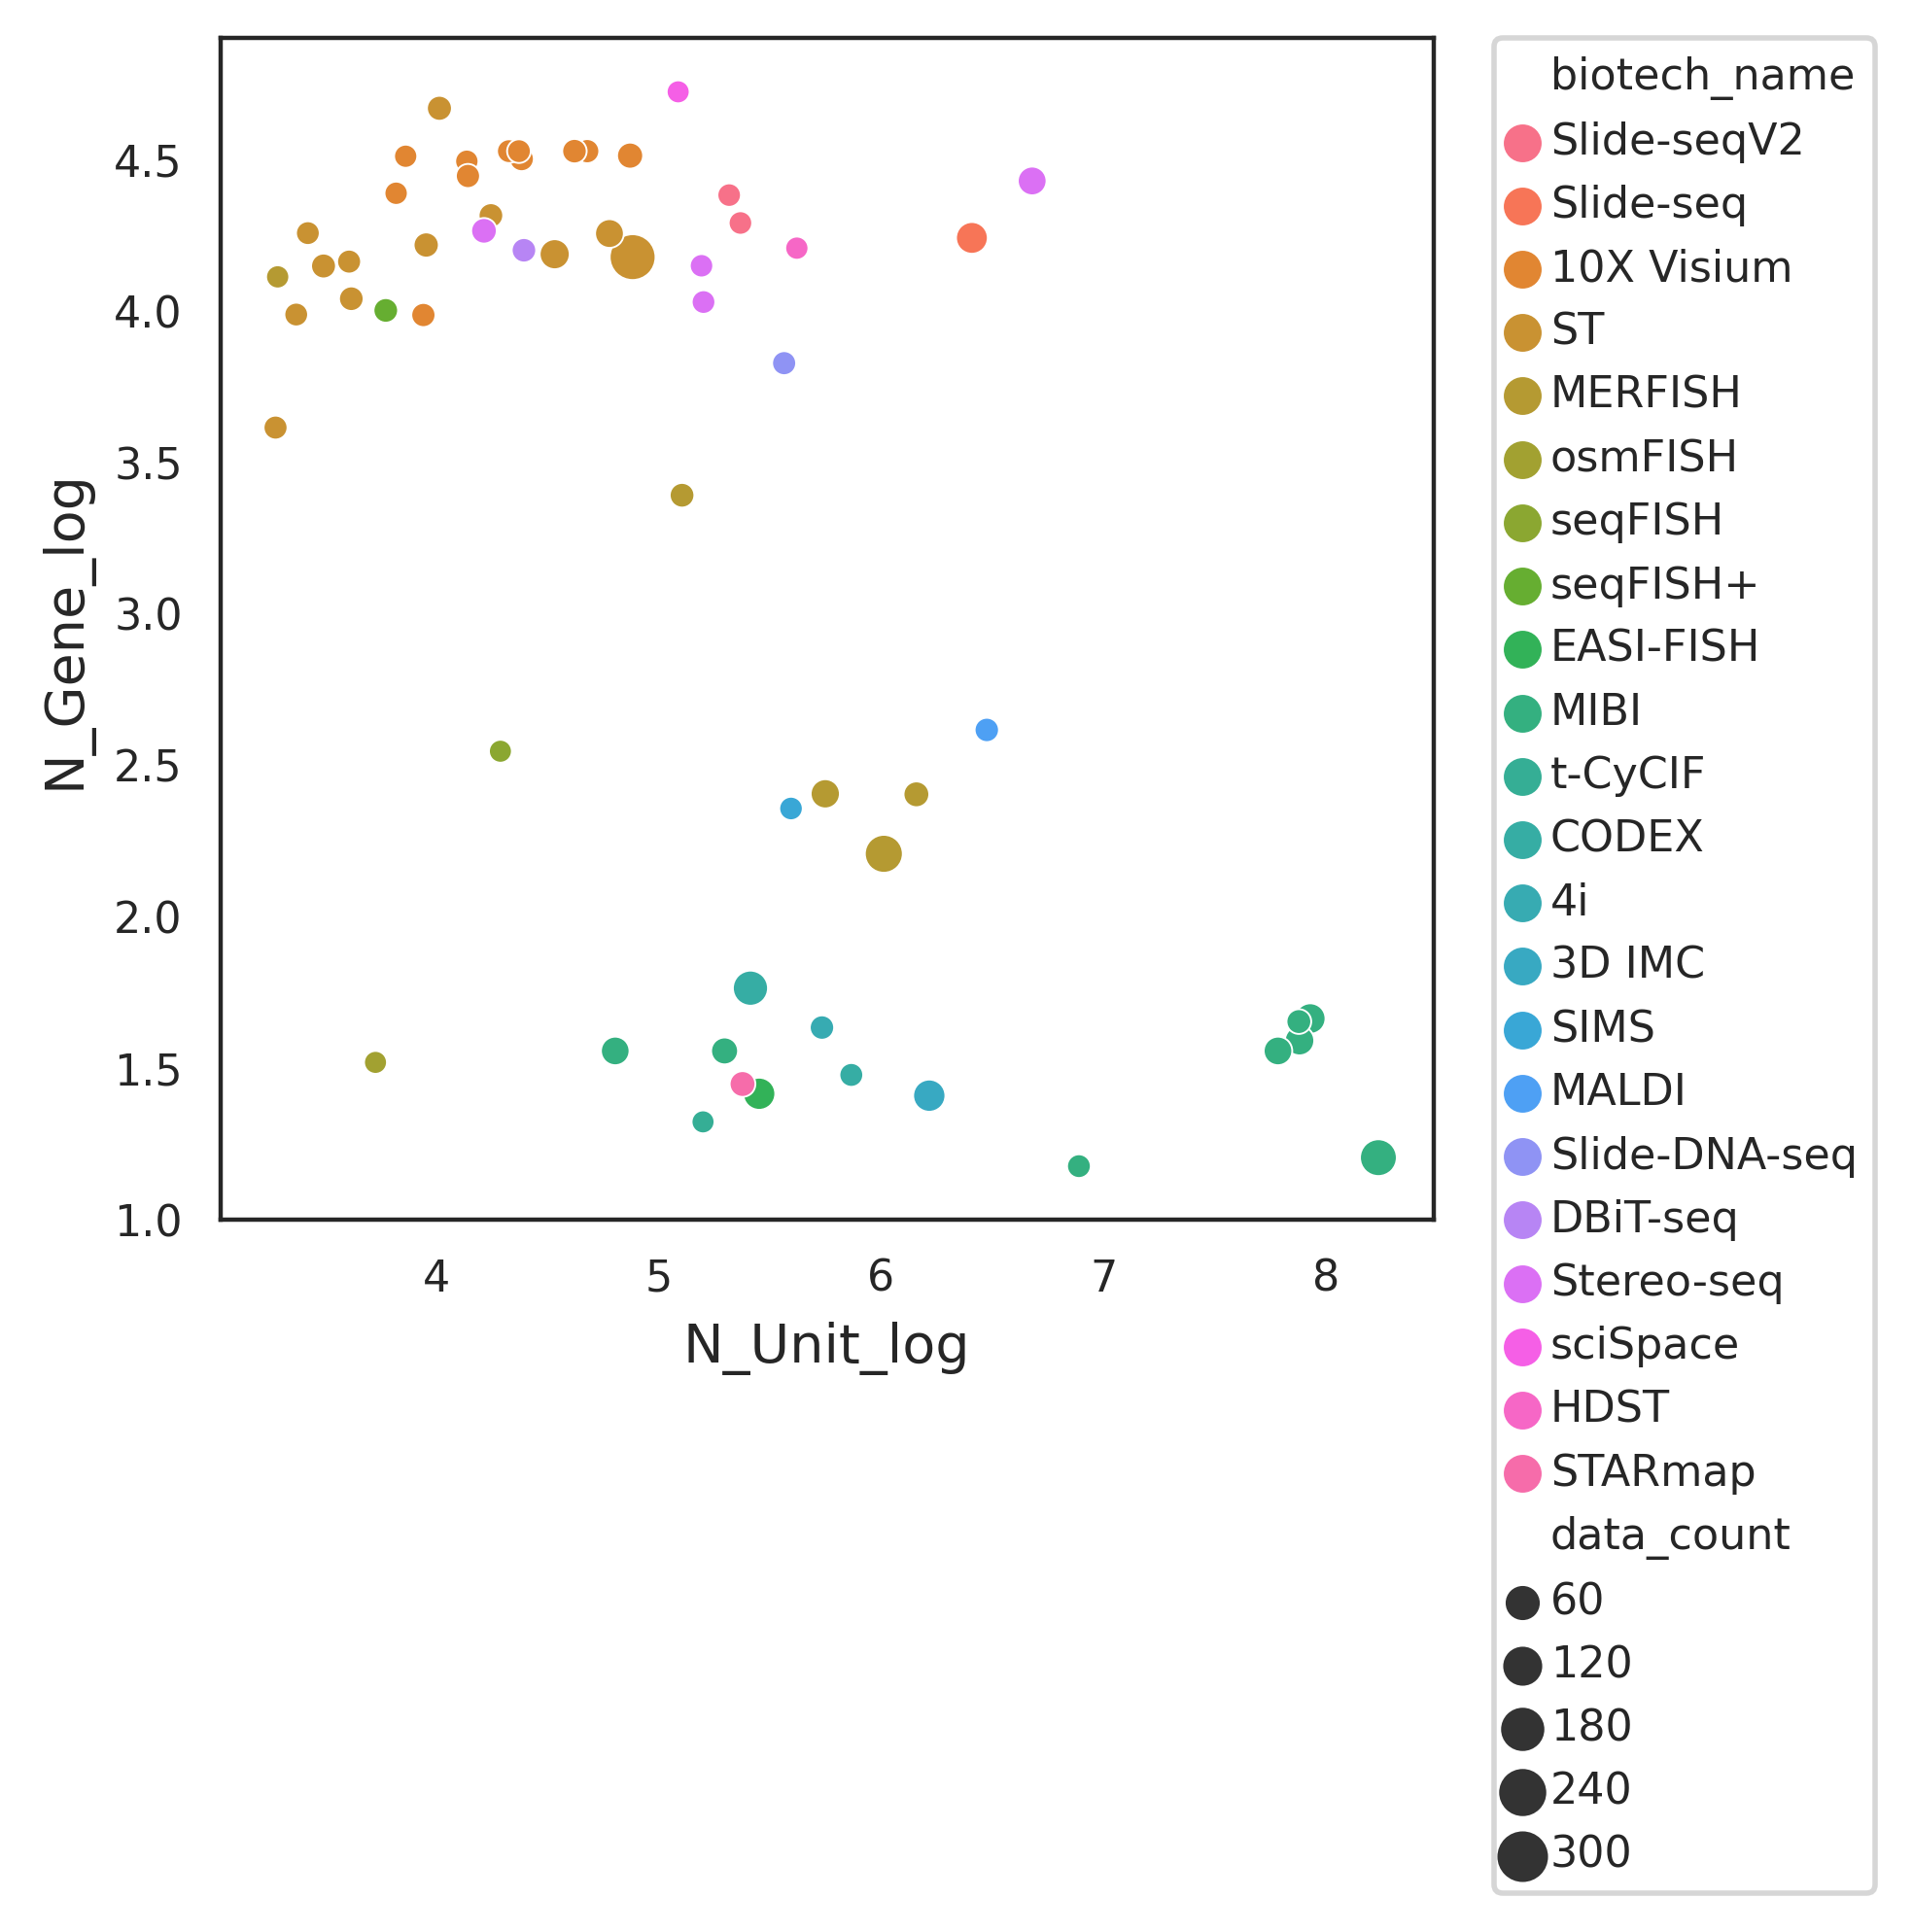

In [151]:
sns.scatterplot(x="N_Unit_log", y="N_Gene_log", hue="biotech_name", data=dataset,size='data_count')
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

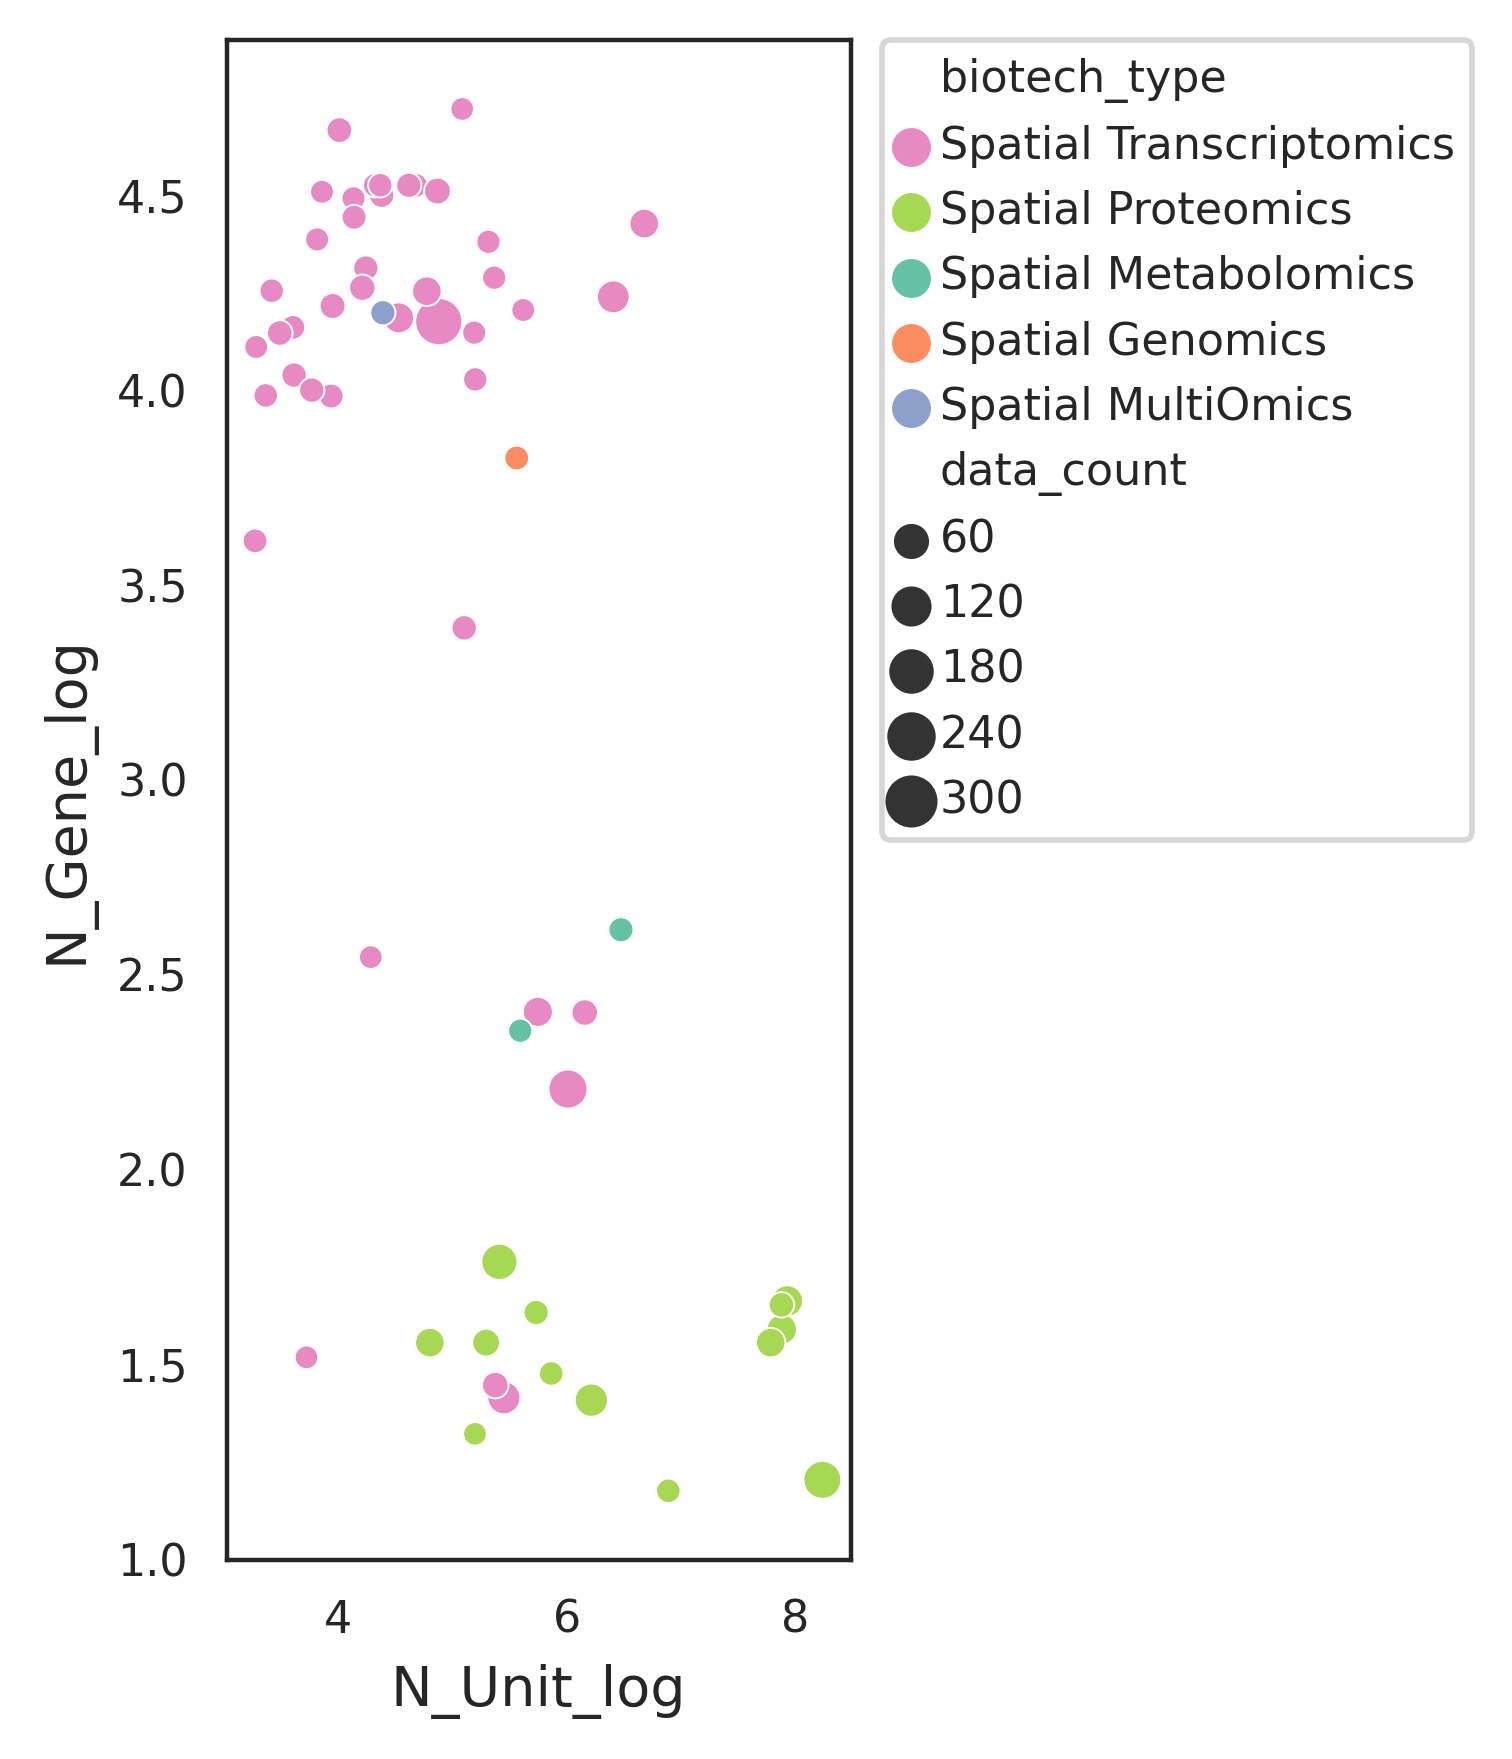

In [46]:
fig,ax = plt.subplots(1,1,figsize=(2,5))
sns.scatterplot(x="N_Unit_log", y="N_Gene_log", hue="biotech_type", data=dataset,size='data_count',palette=cmp_omics,ax=ax)
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [84]:
dataset['N_Unit_avg_log'] = np.log10(dataset['N_Unit']/dataset['data_count'])

In [88]:
dataset.columns

Index(['index', 'Name_Short', 'Name_Long', 'Biotech_ID', 'doi', 'Date',
       'Country', 'Journal', 'Author', 'Access', 'Zip_Path', 'data_count',
       'N_Unit', 'N_Gene', 'Species', 'N_Unit_log', 'N_Gene_log',
       'biotech_name', 'biotech_type', 'data_count_trun_100',
       'N_Unit_avg_log'],
      dtype='object')

In [90]:
dataset[dataset.biotech_type=='Spatial Proteomics']['N_Gene'].max()

58.0

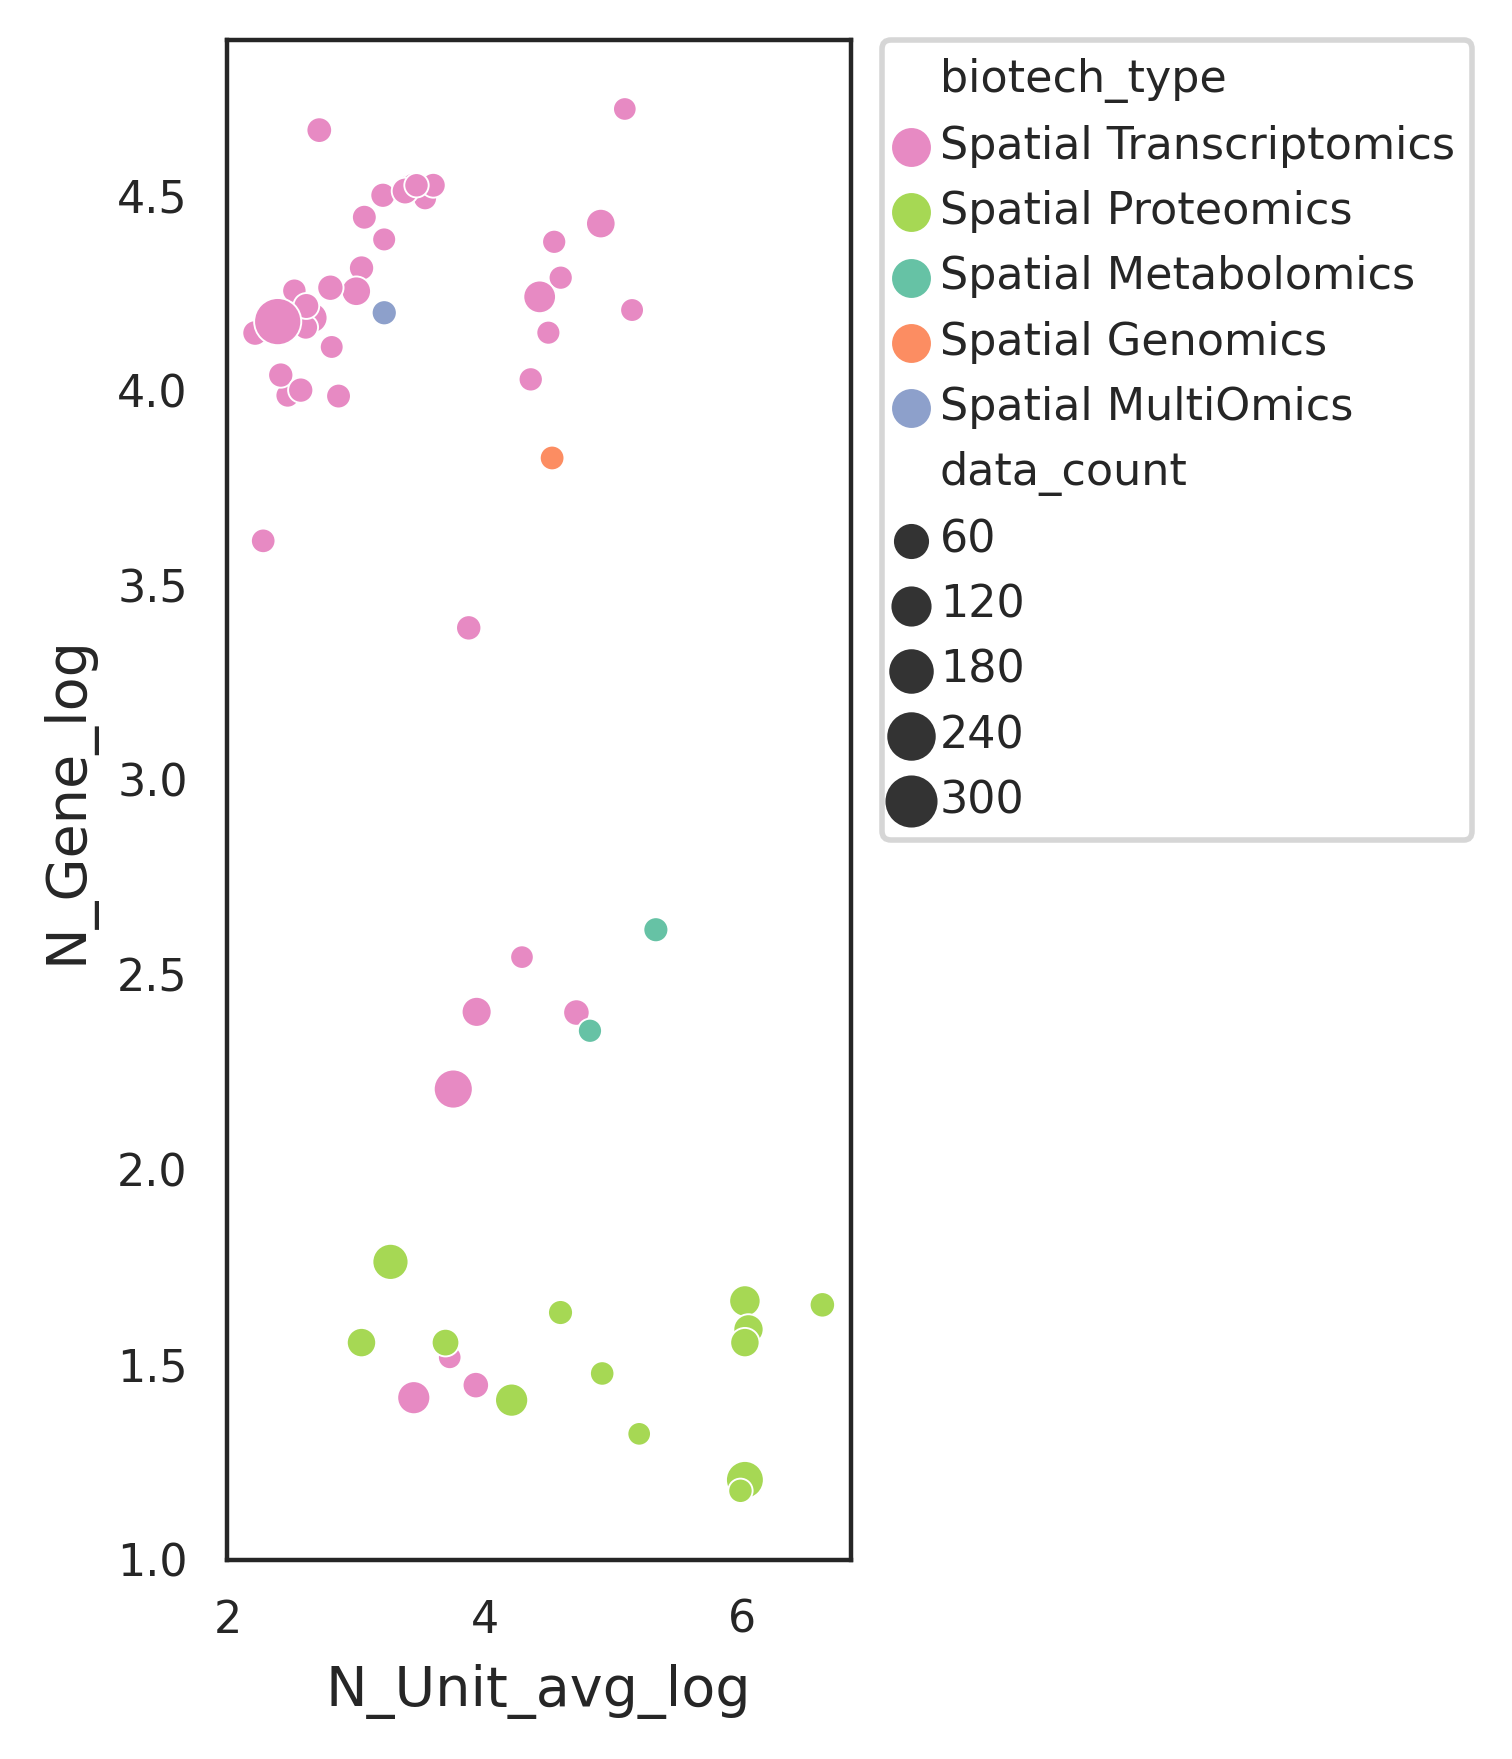

In [85]:
fig,ax = plt.subplots(1,1,figsize=(2,5))
sns.scatterplot(x="N_Unit_avg_log", y="N_Gene_log", hue="biotech_type", data=dataset,size='data_count',palette=cmp_omics,ax=ax)
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [92]:
dataset[dataset.Name_Short=='Fang2022Conservation']

index            Name_Short  \
58     92  Fang2022Conservation   

                                            Name_Long  Biotech_ID  \
58  Conservation and divergence of cortical cell o...           3   

                             doi       Date Country  Journal  \
58  DOI: 10.1126/science.abm1741 2022-06-30     USA  Science   

                                               Author  \
58  Fang, Rongxin\nXia, Chenglong\nClose, Jennie L...   

                                               Access  ... data_count  N_Unit  \
58  https://datadryad.org/stash/dataset/doi:10.506...  ...         17  127273   

         N_Gene  Species N_Unit_log  N_Gene_log  biotech_name  \
58  2454.941176    HUMAN   5.104736    3.390041       MERFISH   

               biotech_type data_count_trun_100  N_Unit_avg_log  
58  Spatial Transcriptomics                  17        3.874287  

[1 rows x 21 columns]

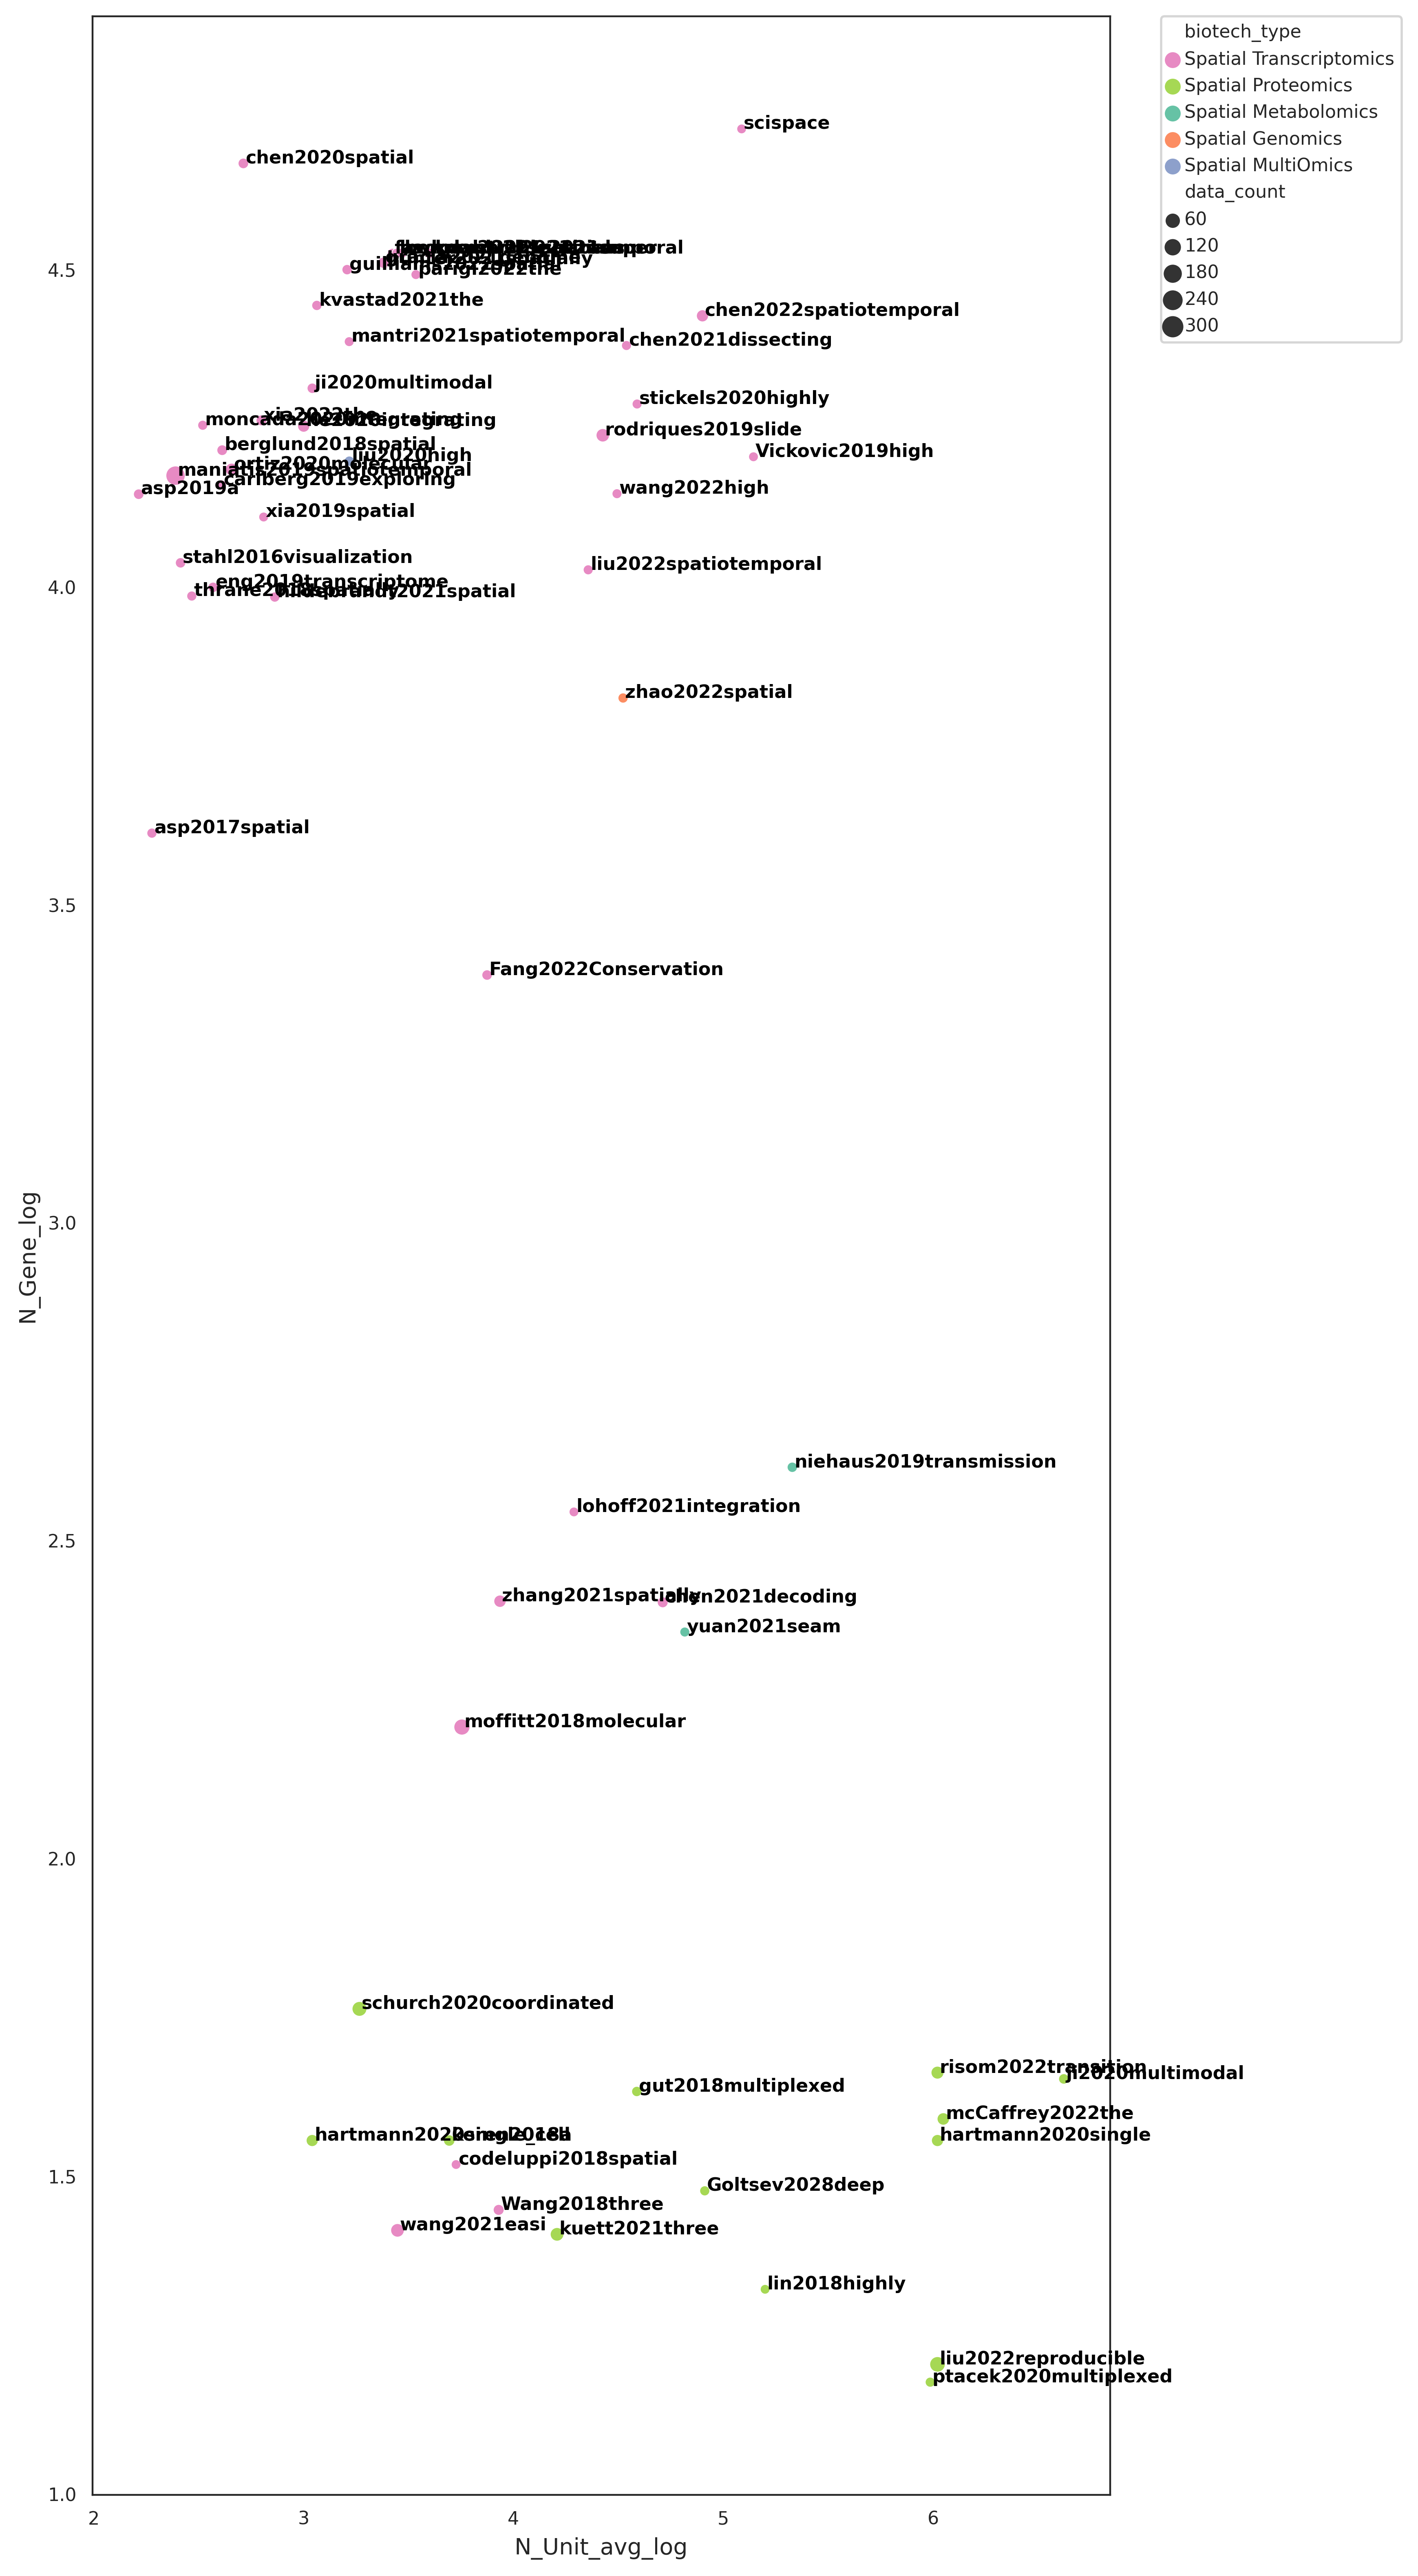

In [87]:
fig,ax = plt.subplots(1,1,figsize=(8,20))
sns.scatterplot(x="N_Unit_avg_log", y="N_Gene_log", hue="biotech_type", data=dataset,size='data_count',palette=cmp_omics,ax=ax)
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

for line in range(0,dataset.shape[0]):
     ax.text(dataset.N_Unit_avg_log[line]+0.01, dataset.N_Gene_log[line], 
     dataset.Name_Short[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [ ]:
dataset

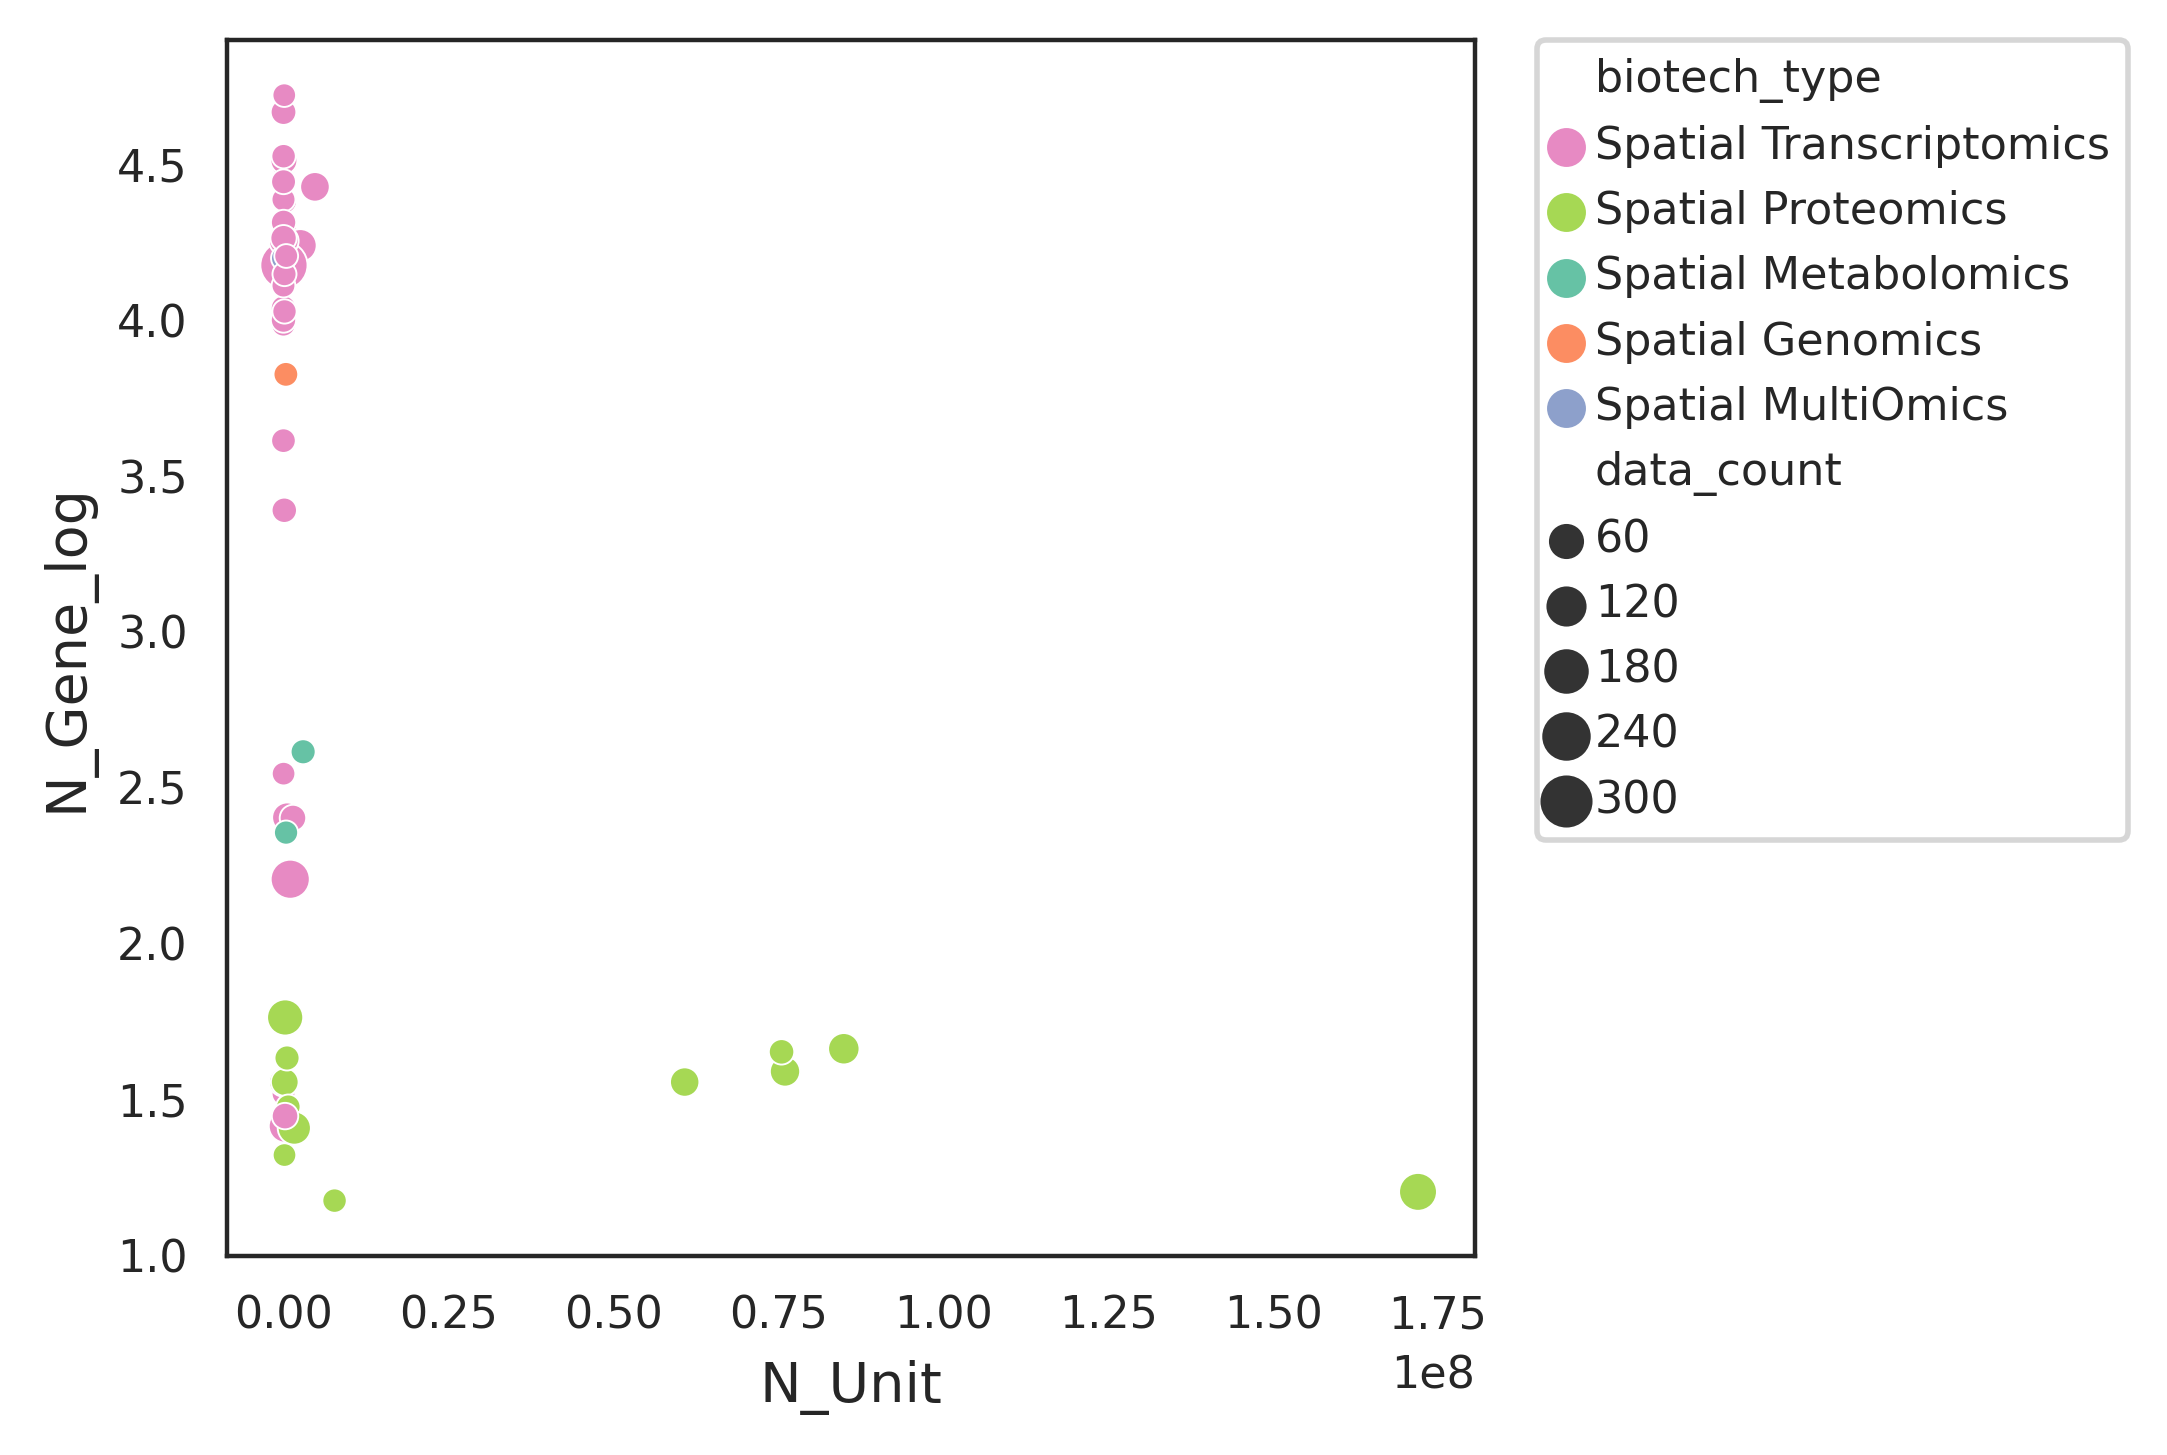

In [157]:
sns.scatterplot(x="N_Unit", y="N_Gene_log", hue="biotech_type", data=dataset,size='data_count',palette=cmp_omics)
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

ID                              Name Biotech_ID Dataset_ID  \
0        0         GSM4202309_0719aL_protein         22         76   
1        1      GSM4202310_0725e10aL_protein         22         76   
2        2                    E11_lower_body         22         76   
3        3               E10_whole_gene_best         22         76   
4        4                E10_eye_and_nearby         22         76   
...    ...                               ...        ...        ...   
2179  2179  H20.30.001.STG.250.unexpand.rep1          3         92   
2180  2180   H22.26.401.MTG.4000.expand.rep2          3         92   
2181  2181  H22.26.401.MTG.250.unexpand.rep1          3         92   
2182  2182   mouse1.AUD_TEA_VIS.242.unexpand          3         92   
2183  2183   H20.30.001.STG.4000.expand.rep3          3         92   

                                              H5ad_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...   
...                                                 ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...   

                                          GeneList_Path Histology_Path  \
0     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
1     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
2     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
3     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
4     demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...           None   
...                                                 ...            ...   
2179  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2180  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2181  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2182  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   
2183  demo_data/Spatial_Transcriptomics/MERFISH/Fang...           None   

     Species  Tissue N_Unit N_Gene Zip_Path with_control with_replicate  \
0      MOUSE  EMBRYO   2500     22     None            0              1   
1      MOUSE  EMBRYO    936     22     None            0              1   
2      MOUSE  EMBRYO   1662  21890     None            0              1   
3      MOUSE  EMBRYO    936  22802     None            0              1   
4      MOUSE  EMBRYO   2500  22969     None            0              1   
...      ...     ...    ...    ...      ...          ...            ...   
2179   HUMAN  CORTEX  14174    250     None            1              1   
2180   HUMAN  CORTEX   3512   4000     None            1              1   
2181   HUMAN  CORTEX   5891    250     None            1              1   
2182   MOUSE  CORTEX  13222    242     None            1              1   
2183   HUMAN  CORTEX   3918   4000     None            1              1   

     with_annotation with_publication biotech_name             biotech_type  \
0                  0                1     DBiT-seq       Spatial MultiOmics   
1                  0                1     DBiT-seq       Spatial MultiOmics   
2                  0                1     DBiT-seq       Spatial MultiOmics   
3                  0                1     DBiT-seq       Spatial MultiOmics   
4                  0                1     DBiT-seq       Spatial MultiOmics   
...              ...              ...          ...                      ...   
2179               0                1      MERFISH  Spatial Transcriptomics   
2180               0                

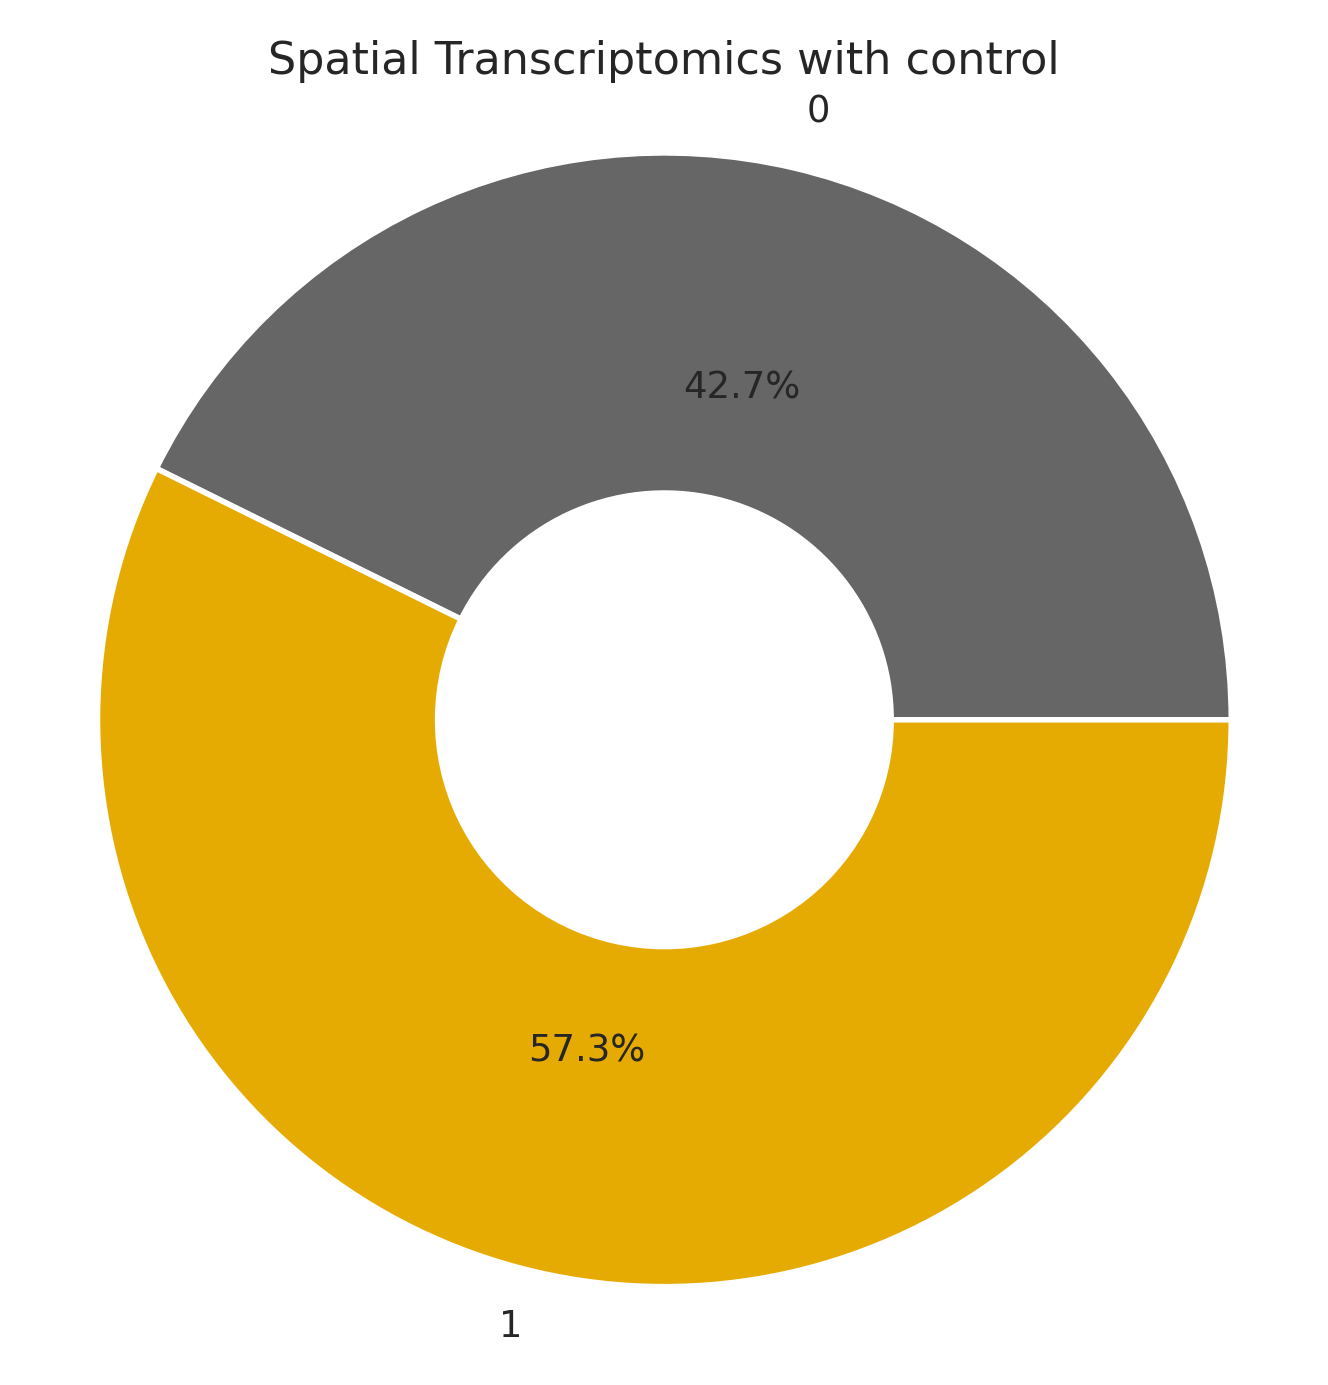

In [106]:
df_feature = 'with_control'
labels,sizes = np.unique(df[df.biotech_type=='Spatial Transcriptomics'][df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[5],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spatial Transcriptomics with control')
plt.show()

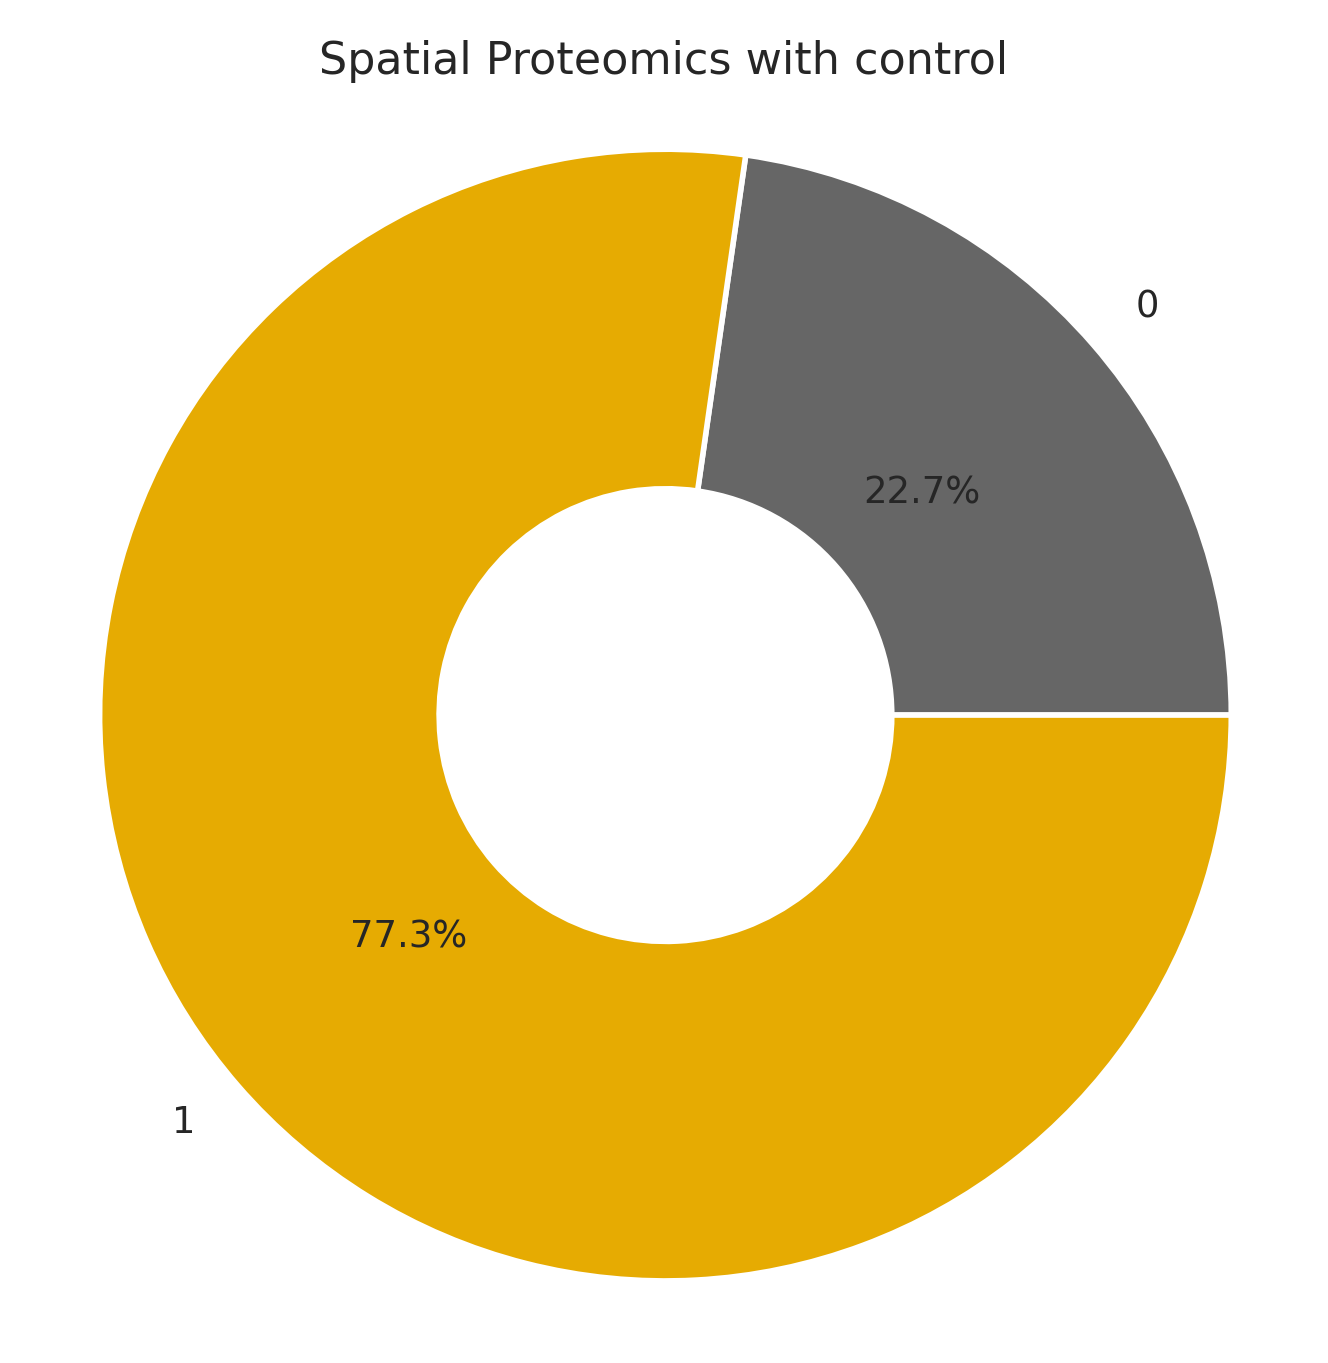

In [103]:
df_feature = 'with_control'
labels,sizes = np.unique(df[df.biotech_type=='Spatial Proteomics'][df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[5],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spatial Proteomics with control')


plt.show()

In [1]:
1+1

2

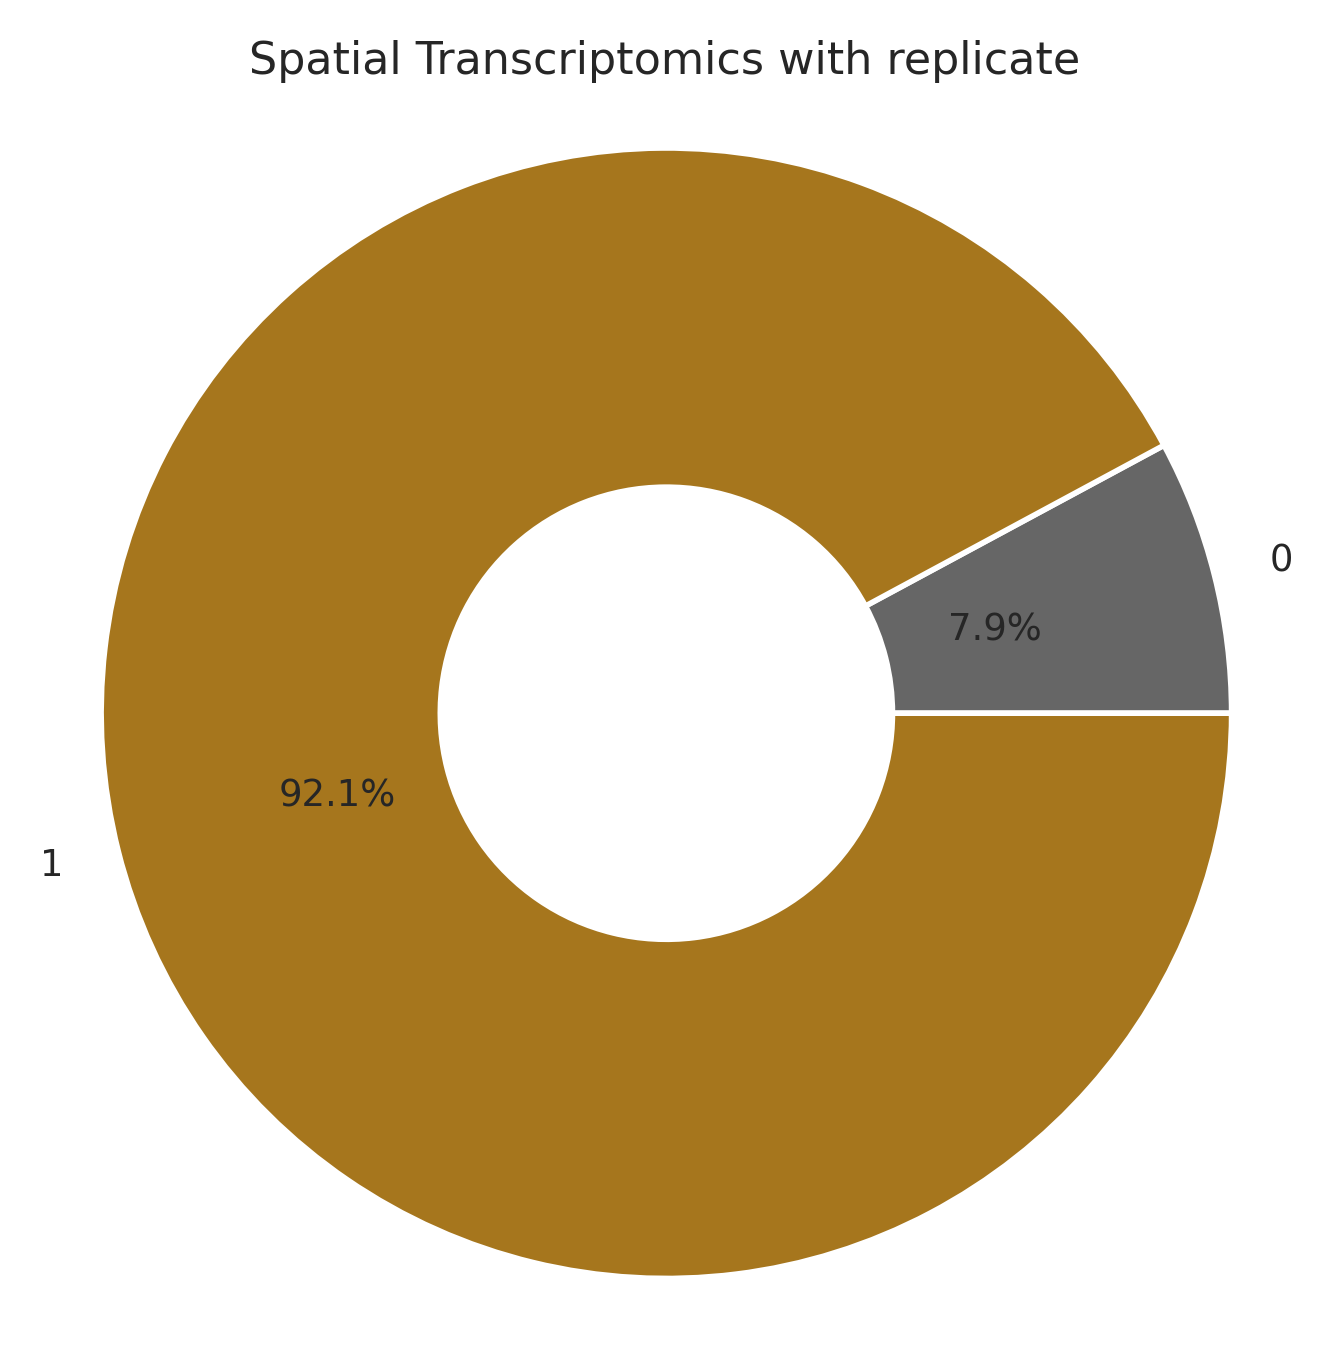

In [104]:
df_feature = 'with_replicate'
labels,sizes = np.unique(df[df.biotech_type=='Spatial Transcriptomics'][df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[6],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spatial Transcriptomics with replicate')


plt.show()

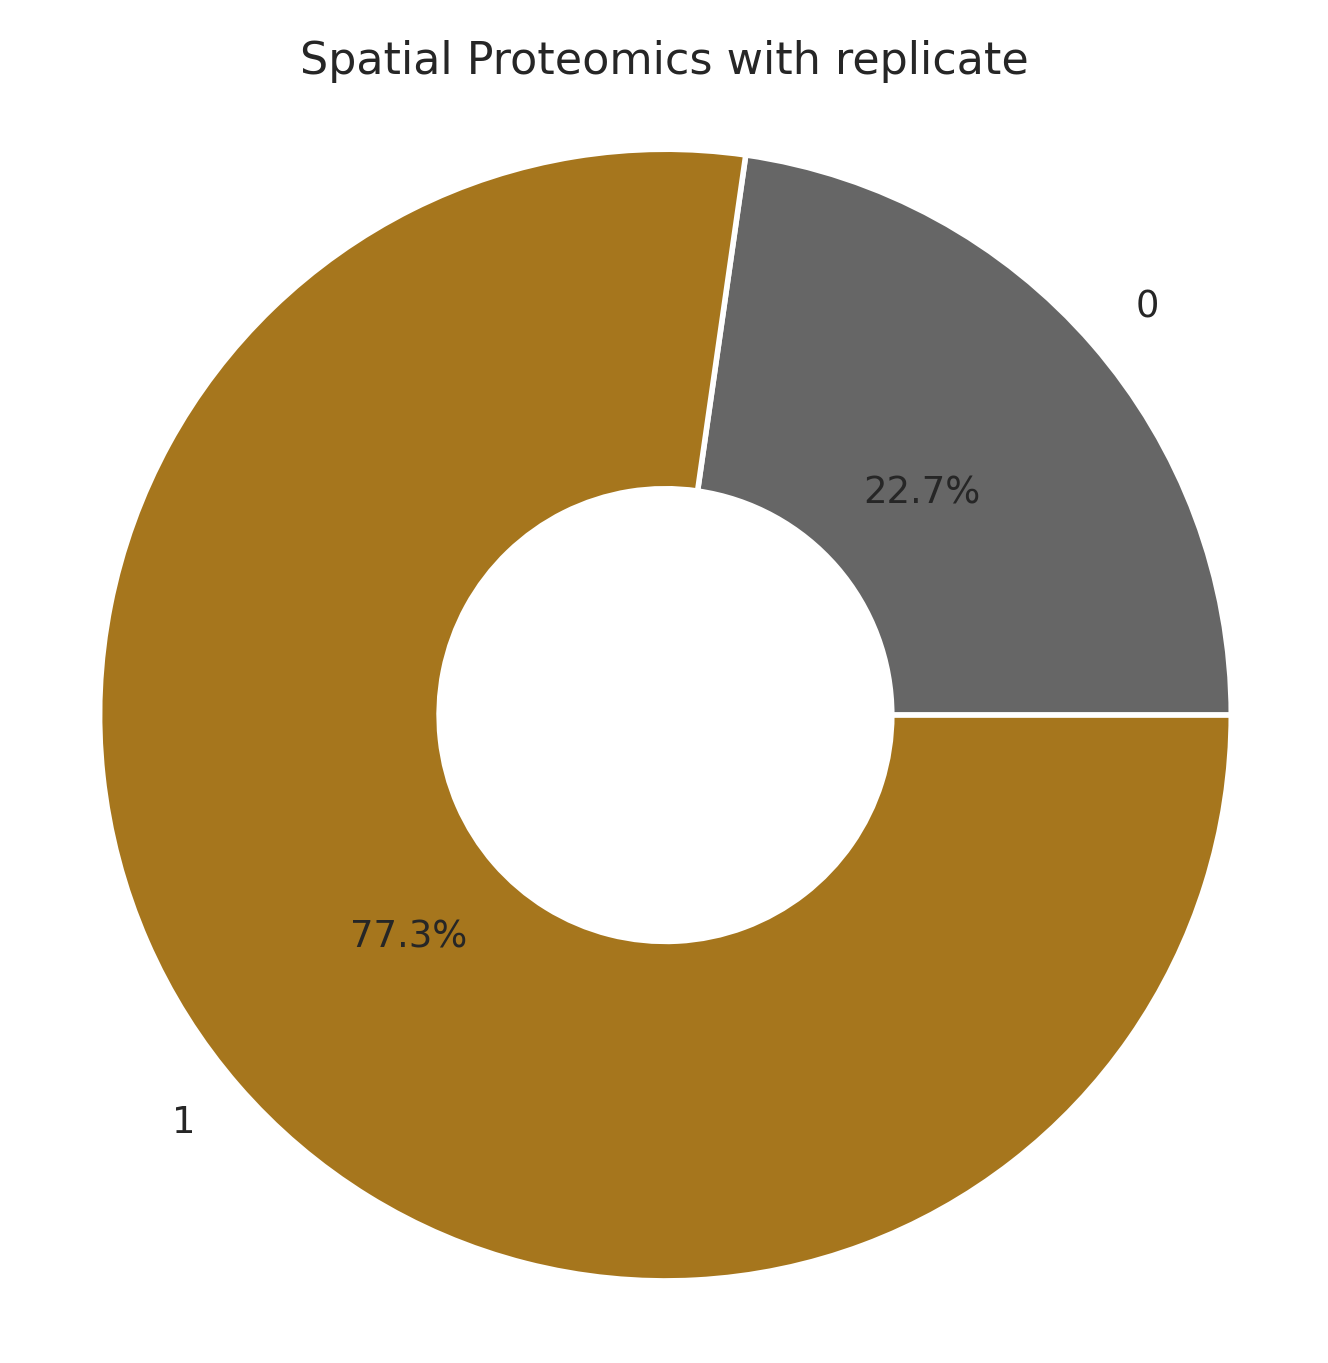

In [105]:
df_feature = 'with_replicate'
labels,sizes = np.unique(df[df.biotech_type=='Spatial Proteomics'][df_feature],return_counts=1)
cmp = [cmp_tf[-1],cmp_tf[6],]
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
                                          autopct='%.1f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=cmp
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spatial Proteomics with replicate')


plt.show()

In [63]:
dataset = pd.read_feather('dataset.feather')

In [67]:
dataset_trans = dataset[dataset.biotech_type=='Spatial Transcriptomics']

In [68]:
dataset_prot = dataset[dataset.biotech_type=='Spatial Proteomics']

In [72]:
np.unique(dataset_trans['Country'],return_counts=1)

(array(['Belgium', 'China', 'Sweden', 'UK', 'USA'], dtype=object),
 array([ 1,  4, 13,  3, 21]))

In [71]:
np.unique(dataset_prot['Country'],return_counts=1)

(array(['Switzerland', 'USA'], dtype=object), array([ 2, 11]))

In [57]:
labels,sizes = np.unique(df[df.Species=='HUMAN'][df_feature],return_counts=1)

In [59]:
sizes

array([184, 823])

In [108]:
tmp = """
cpne7
nrgn
crym
hpcal4
camkv
snca
basp1
nptxr
mmd
ly6h
"""

In [110]:
for i in tmp.split('\n'):
    print(i.upper())


CPNE7
NRGN
CRYM
HPCAL4
CAMKV
SNCA
BASP1
NPTXR
MMD
LY6H


